In [3]:
import pandas as pd
import numpy as np
import os
import typing
import matplotlib.pyplot as plt
import time
from datetime import datetime
from datetime import timedelta


from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [4]:
#Smooth curve
def smooth(y, box_pts,mode="valid"):
    box = np.ones(box_pts)/box_pts
 
    
    
    y_smooth=np.convolve(y, box, 
                           mode=mode
                          )
   
    return y_smooth

In [5]:
def train_test_split(dataset, ratio):
    scaler = MinMaxScaler()

    
    train_size = int(len(dataset) * ratio)
    test_size = len(dataset) - train_size

    train  = dataset[0:train_size]
    test   = dataset[train_size:]
    return train,test

In [6]:
def graph_predictions_sarima_append_dontfit(dataset,ratio,step=1,ordd=(5,1,0),Sorder=(5,1,0,45),smooth_flag=0):
    
    #try using SARIMA, change modelling options method conv and low memory 
    
# datetime object containing current date and time
    now = datetime.now()
 
    print("started =", now)

    print("parameters:", ordd)
    print("seasonal parameters:", Sorder)
    
    plt.figure(figsize=(30,15))
    start = time.time()
    train,test = train_test_split(dataset,ratio)
    history = [x for x in train]
    predictions = list()
    # predictions=[x for x in train] #the prediction starts of lagged from history..
    # walk-forward validation
#     print("starting loop")
    model = ARIMA(history, order=ordd,seasonal_order=Sorder)
#         print("itareation #",t/step, "pre model.fit")
    print("start training")
    
#     model_fit = model.fit()#(method='innovations_mle', low_memory=True, cov_type='none')
    model_fit = model.fit(method='statespace', low_memory=True, cov_type='none')
#     model_fit = model.fit(cov_type='robust_approx')
    print("start predicting")
    output = model_fit.forecast(len(test))



    predictions.extend(output)


    plt.plot(test)
    # plt.plot(train)
    # plt.plot(dataset)
    # print(len(dataset))
    print("test: ", len(test))
    print("predictions: ", len(predictions))
    if smooth_flag:
        predictions_ma=[]
        predictions_ma.append(smooth(predictions,30))
        plt.plot(predictions_ma[0], color='red')
    
    else: 
        plt.plot(predictions, color='red')
    # plt.plot(, color='blu')
    plt.grid()
    plt.ylim([20,65])
    
    try:
        MSE = mean_squared_error(test,predictions)
        RMSE = sqrt(MSE)
        print("mean squared error= ",MSE)
    
        print("RMSE= " ,RMSE)
    except:
        print("error calculating, mismatch in dimentions")
        ...
    
    end = time.time()
    print("time taken: ",timedelta(seconds=(end - start)))
#     plt.rcParams['figure.figsize'] = [1000/2.54, 800/2.54]
    plt.show()
    # print(len(predictions))

    
    # print(predictions_ma)

    # return predictions
    return predictions, test, RMSE,ordd,Sorder,model_fit;


In [7]:
def plot_acf_pacf(data_set,lags):
    
    plt.figure(figsize=(30,15))

    plot_acf(data_set, lags =lags)
    plt.show()

    
    plot_pacf(data_set, lags =lags)
    plt.show()

In [47]:
def plot_data_predictions(data,predictions,data_color='b',prediction_color='r'):

    time = range(len(data))
    time_hr = [x*16/60 for x in time ]
#     time*(16)/60
    print(time_hr)
    plt.figure(figsize=(30,15))

    plt.plot(time_hr,data,c=data_color)

    plt.plot(time_hr[-len(predictions):],predictions,c=prediction_color)
    plt.xticks()
    plt.grid()
    plt.show()



In [9]:
ds = pd.DataFrame()
PTR=[]
"""
"""
number_of_days = 0
number_of_hours=0
for file_name in os.listdir():

    try:
#         print(file_name)
        temp = pd.read_csv( file_name, index_col='dateandtime',parse_dates=True)
        ds = ds.append(temp)
        number_of_hours+=1
    except:
        print("error parsing data")
number_of_days= number_of_hours/25

error parsing data
error parsing data
error parsing data
error parsing data


In [10]:
temp = pd.pivot_table(ds,index = 'dateandtime', values ='spdK/m' , columns ='edge')

temp = temp.groupby([
            pd.Grouper(level='dateandtime'
                       , freq = '16T'  
                      )]
          ).mean()


In [11]:
limitPer = len(temp) *0.20
temp = temp.dropna(thresh=limitPer, axis=1)
temp.count()

edge
-178543139#2                                              1014
-182371948#0                                               570
-182371948#1                                               355
-182371948#2                                               384
-182371955#0                                               659
                                                          ... 
:cluster_7937296083_8074011466_8074011468_2                416
:cluster_7937296083_8074011466_8074011468_6                514
:cluster_7937296083_8074011466_8074011468_7                329
:cluster_8279196058_8279196059_0                           431
:cluster_8574575726_8574575729_8574575735_8574575737_2     762
Length: 1788, dtype: int64

In [12]:
df = temp.fillna(temp.max())

In [13]:
df = df.loc[:, (temp != 0).any(axis=0)]

In [14]:
smoothed_df = []
raw_data_df=[]
for cntrDf in range(0, df.shape[-1]):
    
    raw_data_df.append((df.values[:,cntrDf]))
    smoothed_df.append(smooth(df.values[:,cntrDf],3,'same'))





In [15]:
len(smoothed_df[0])

1350

In [16]:
len(raw_data_df[0])

1350

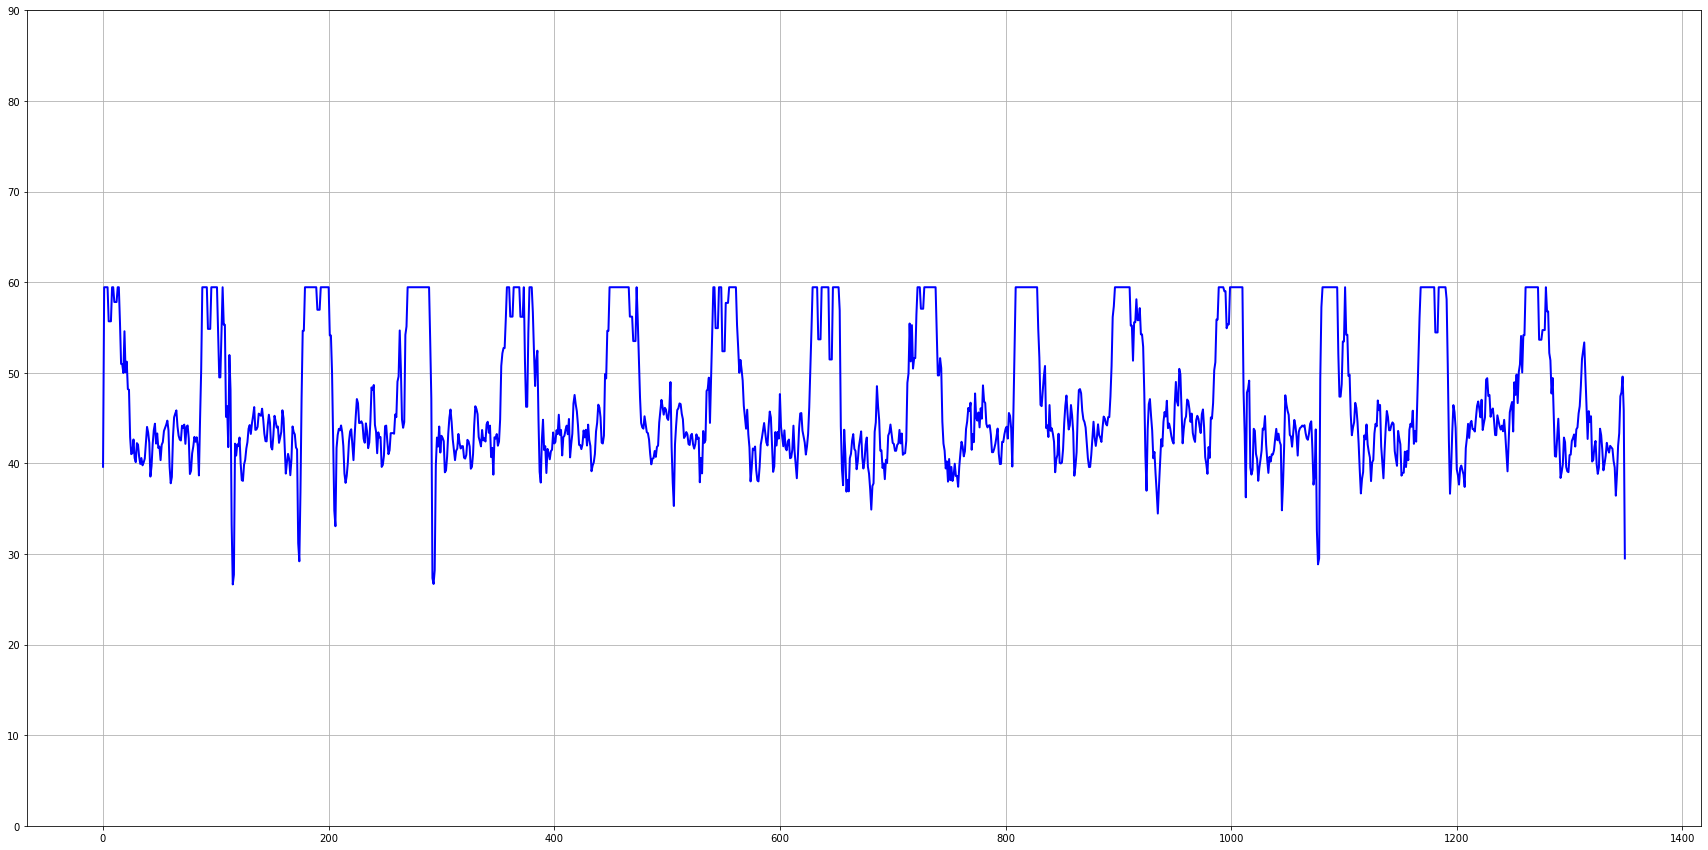

In [17]:
plt.rcParams["figure.figsize"] = (30,15)
# plt.plot(smooth(df.values[:,0],40), 'r-', lw=2)
plt.plot(smoothed_df[0], 'b-', lw=2)
plt.ylim([0 , 90])
plt.grid()


In [18]:
periodicity= int(len(smoothed_df[0])/int(number_of_days))

In [19]:
periodicity

90

parameters: (5, 0, 1)
seasonal parameters: (3, 0, 1, 90)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  406
predictions:  406
mean squared error=  36.55300351749387
RMSE=  6.045907997769555
time taken:  1651.8153932094574


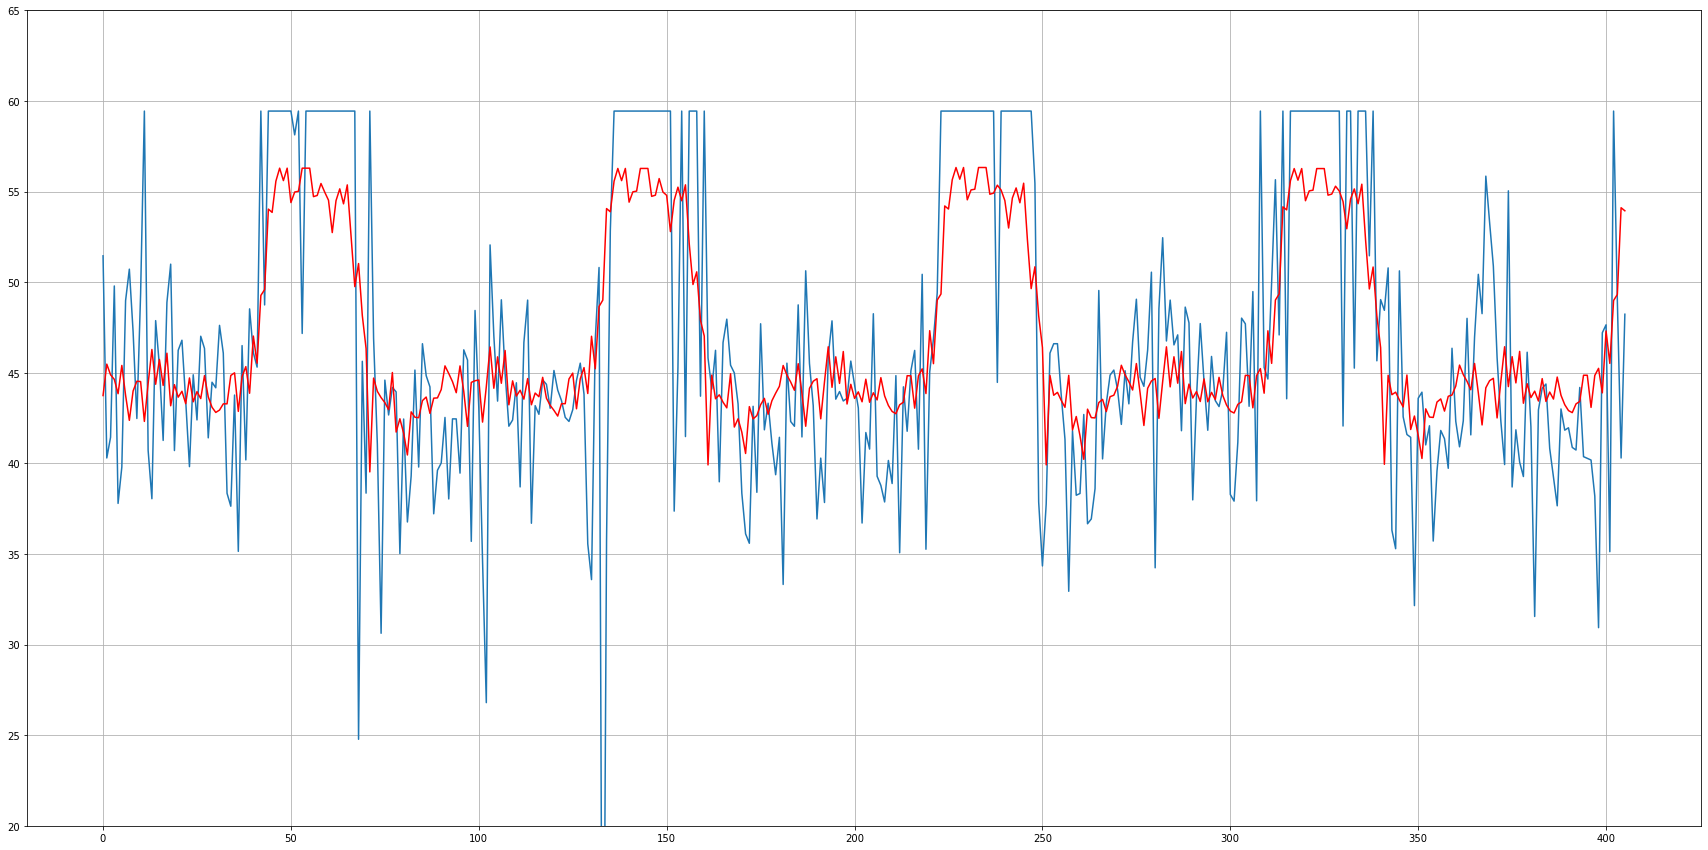

In [31]:
PTR.append(graph_predictions_sarima_append_dontfit(smoothed_df[0],0.7,3,(5, 0, 1) ,(3, 0, 1, periodicity), 0))#16T#remove optmization? 

parameters: (5, 0, 1)
seasonal parameters: (3, 0, 1, 90)
start training
start predicting
test:  406
predictions:  406
mean squared error=  33.03029956247943
RMSE=  5.7471992798648825
time taken:  1397.477665424347


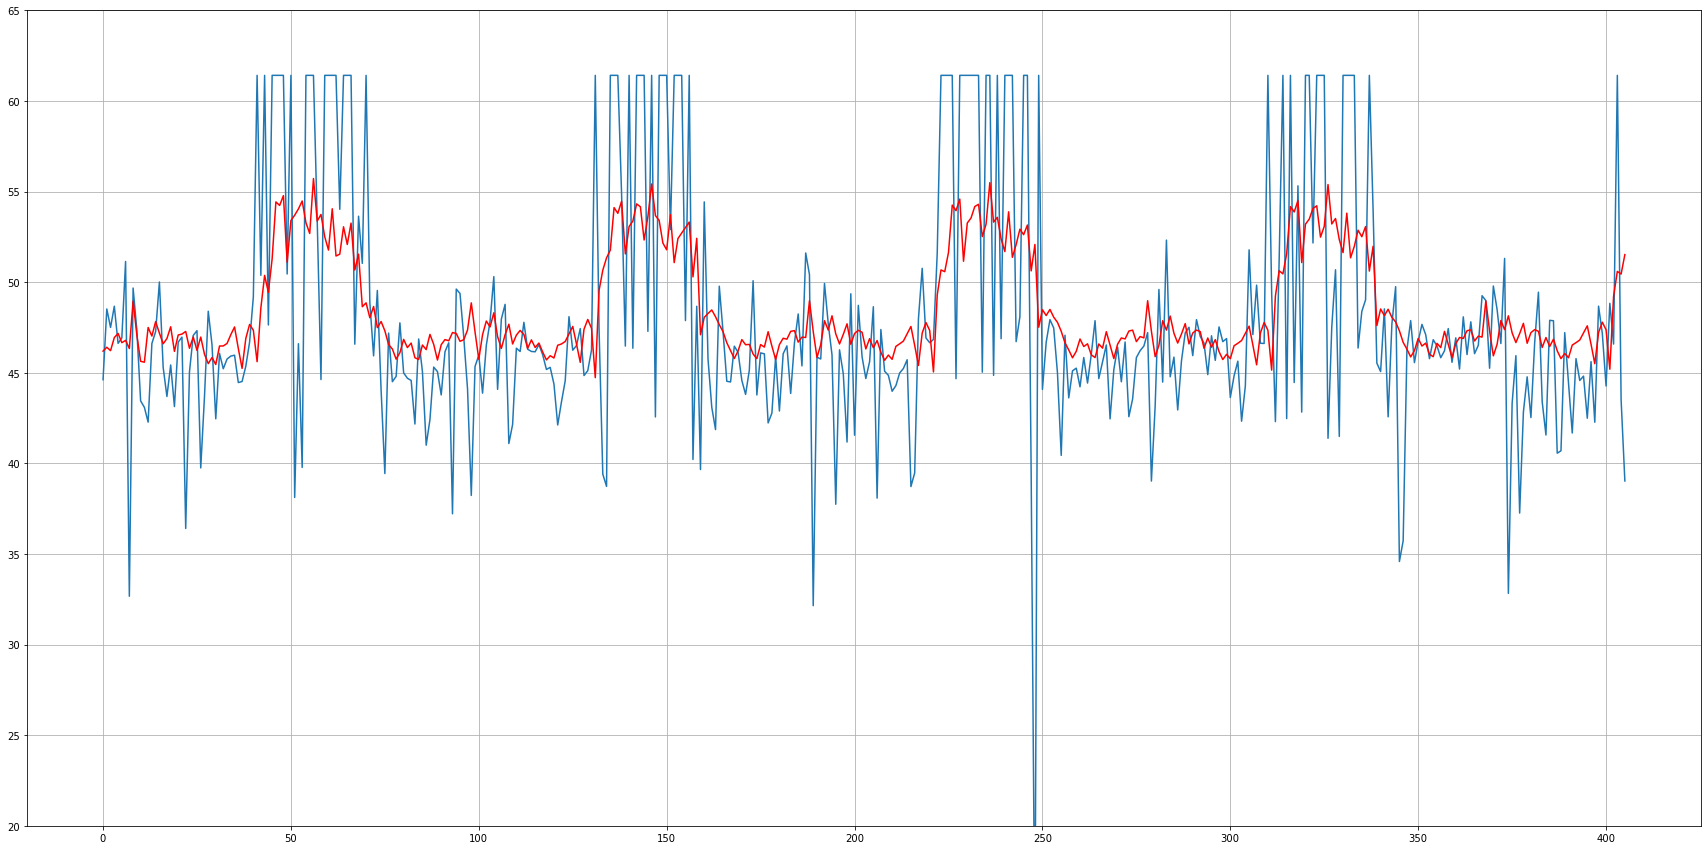

In [32]:
PTR.append(graph_predictions_sarima_append_dontfit(smoothed_df[1100],0.7,3,(5, 0, 1) ,(3, 0, 1, periodicity), 0))#16T#remove optmization? 

In [21]:
new_data,discard = train_test_split(smoothed_df[0],(3/15))

parameters: (5, 0, 1)
seasonal parameters: (3, 0, 1, 45.0)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  81
predictions:  81
mean squared error=  45.5583731611405
RMSE=  6.749694301310282
time taken:  57.26200008392334


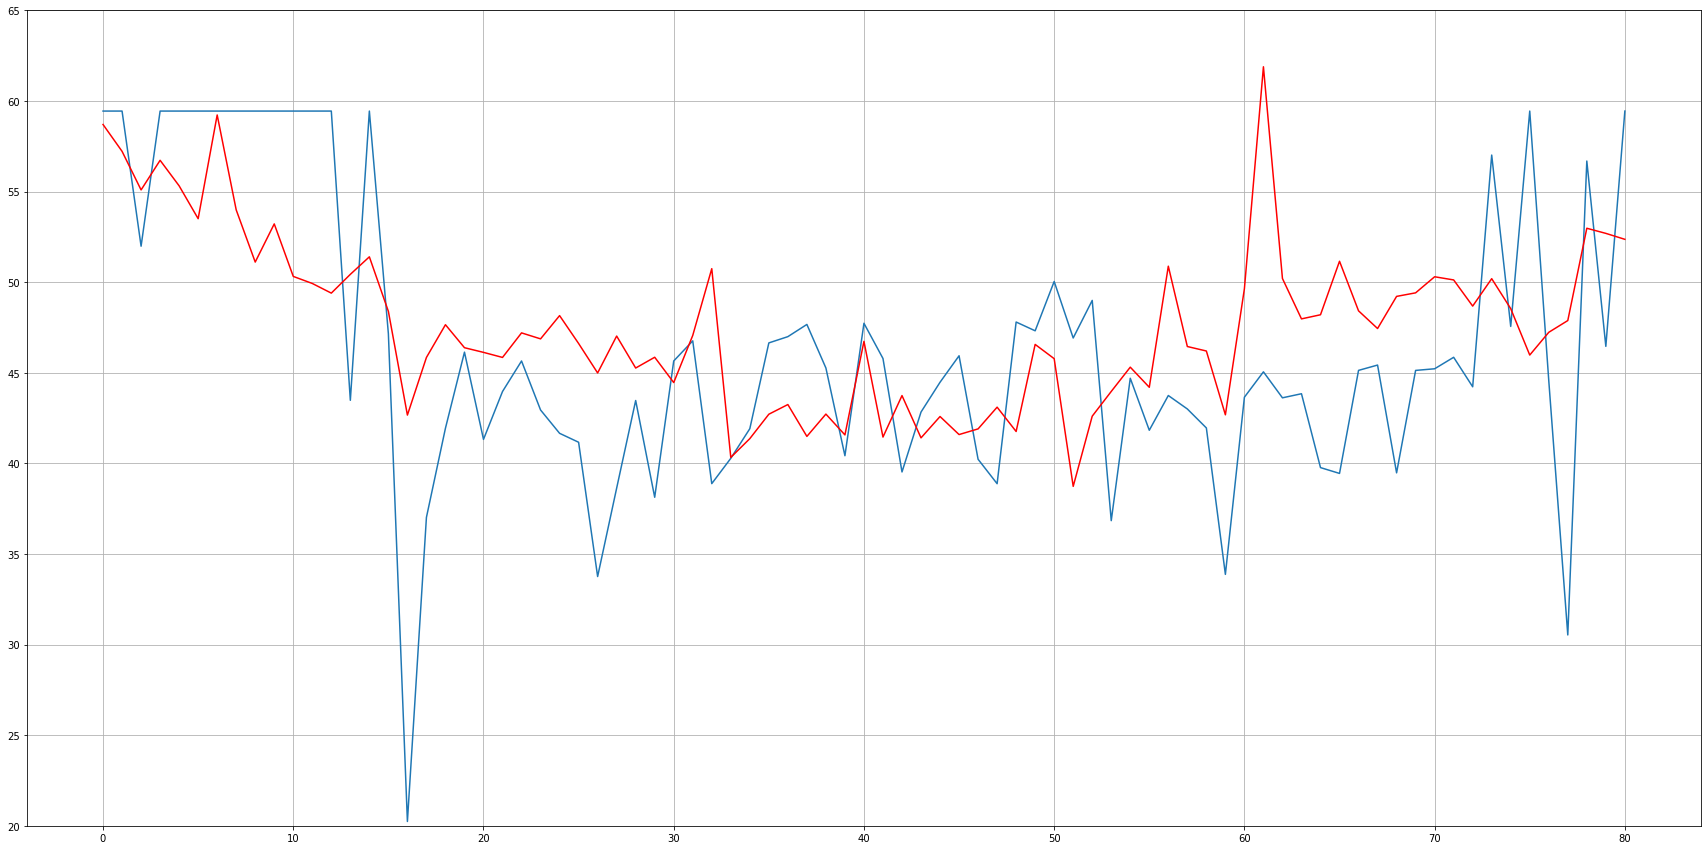

In [34]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(5, 0, 1) ,(3, 0, 1, periodicity/2), 0))#16T#remove optmization? 

In [24]:
new_data,discard = train_test_split(smoothed_df[0],(5/15))

parameters: (3, 0, 1)
seasonal parameters: (5, 0, 1, 45.0)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  135
predictions:  135
mean squared error=  41.88487973076197
RMSE=  6.471852882348452
time taken:  286.00278210639954


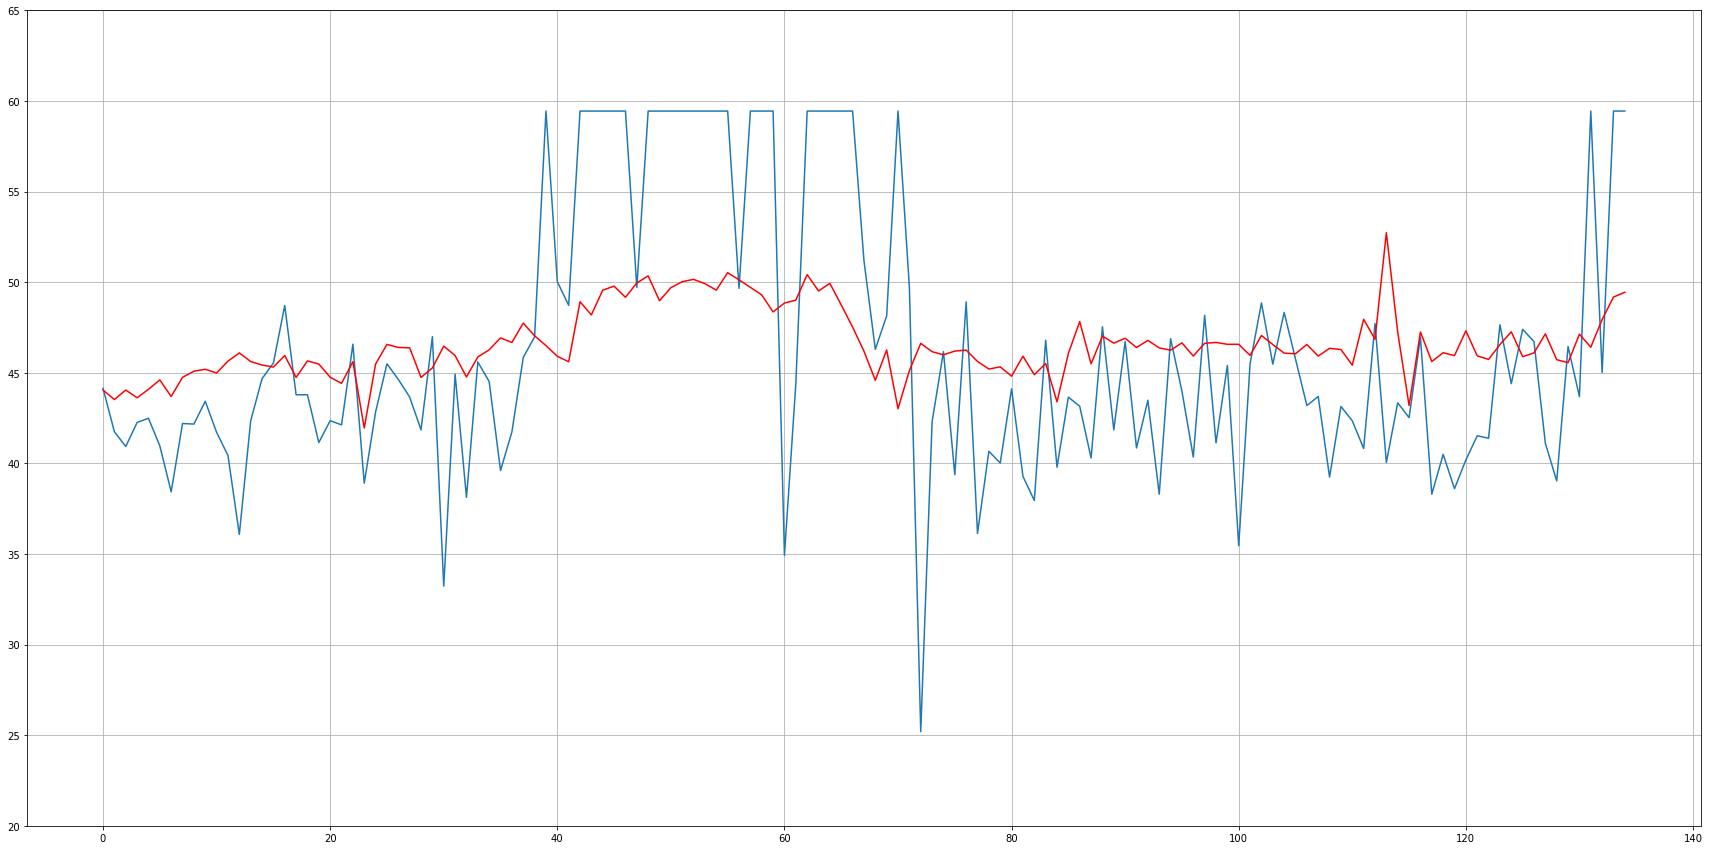

In [37]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(3, 0, 1) ,(5, 0, 1, periodicity/2), 0))#16T#remove optmization? 

parameters: (2, 0, 1)
seasonal parameters: (3, 0, 1, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  41.87796852484047
RMSE=  6.471318916947338
time taken:  70.015949010849


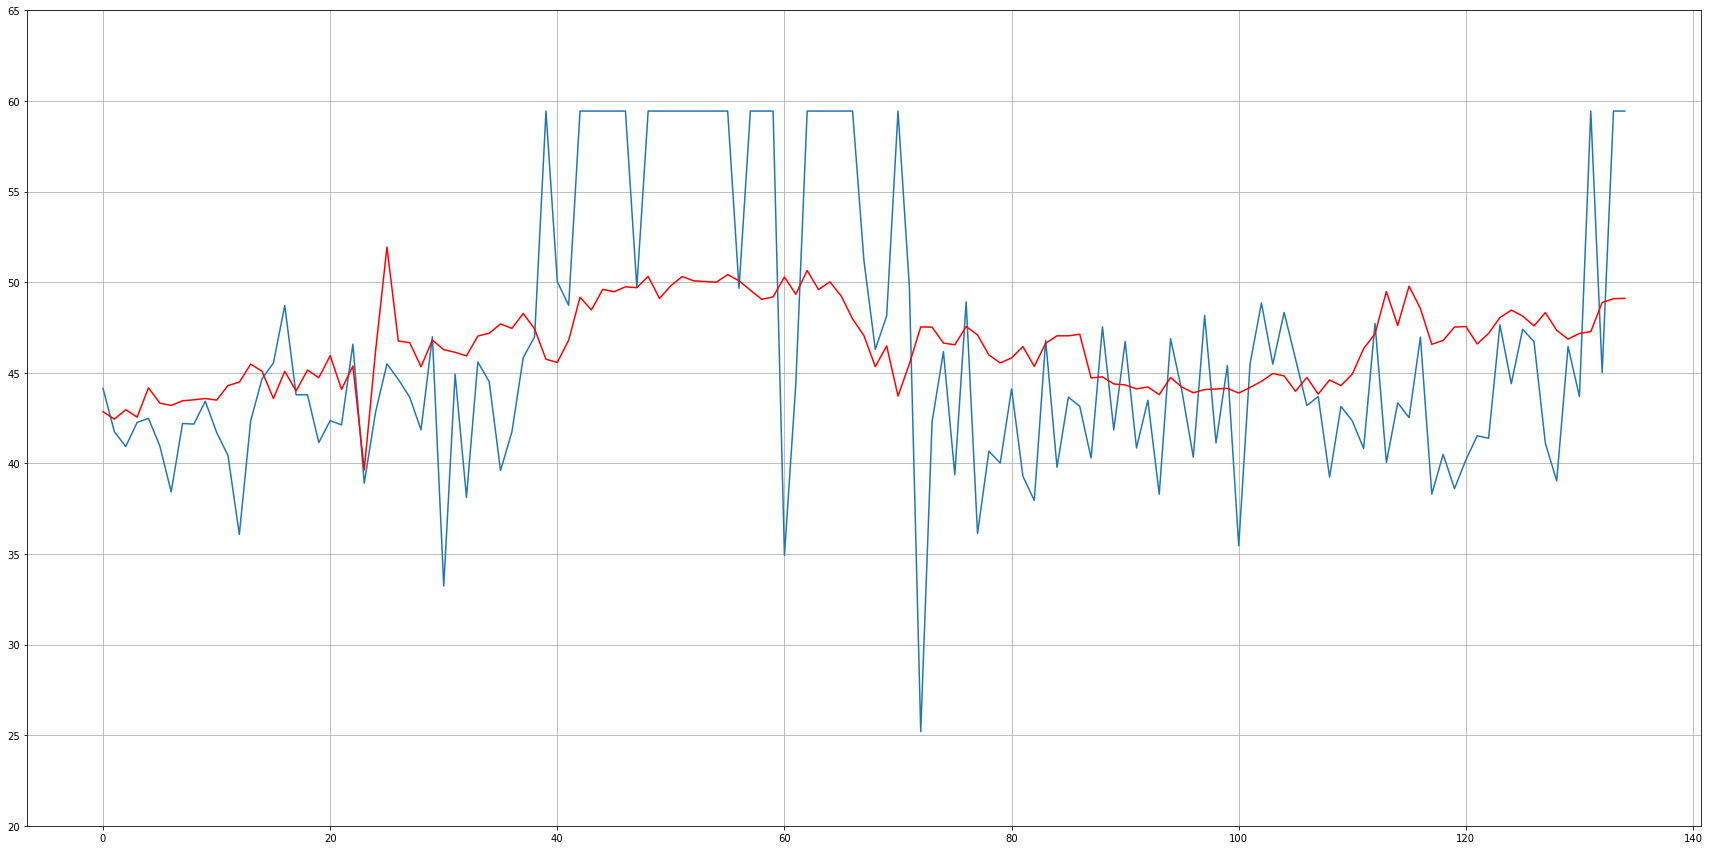

In [38]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(2, 0, 1) ,(3, 0, 1, periodicity/2), 0))#16T#remove optmization? 

parameters: (5, 1, 1)
seasonal parameters: (5, 0, 1, 45.0)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  135
predictions:  135
mean squared error=  68.81433825681896
RMSE=  8.295440811483074
time taken:  338.18779158592224


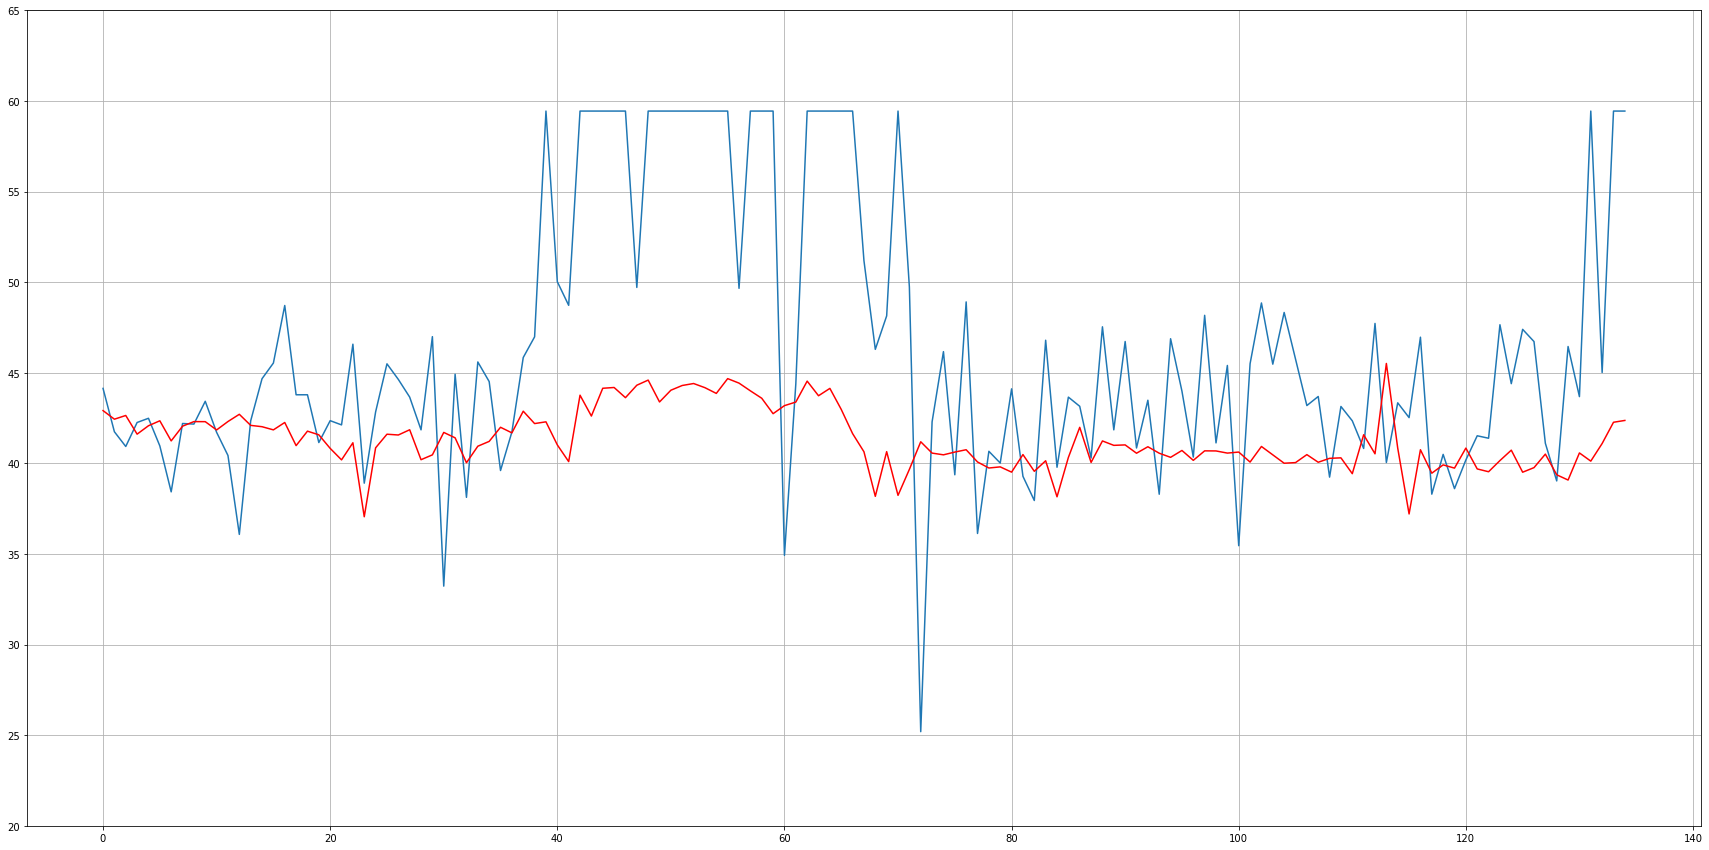

In [39]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(5, 1, 1) ,(5, 0, 1, periodicity/2), 0))#16T#remove optmization? 

parameters: (5, 1, 1)
seasonal parameters: (5, 0, 1, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  51.36427972354902
RMSE=  7.166887729241265
time taken:  185.68524837493896


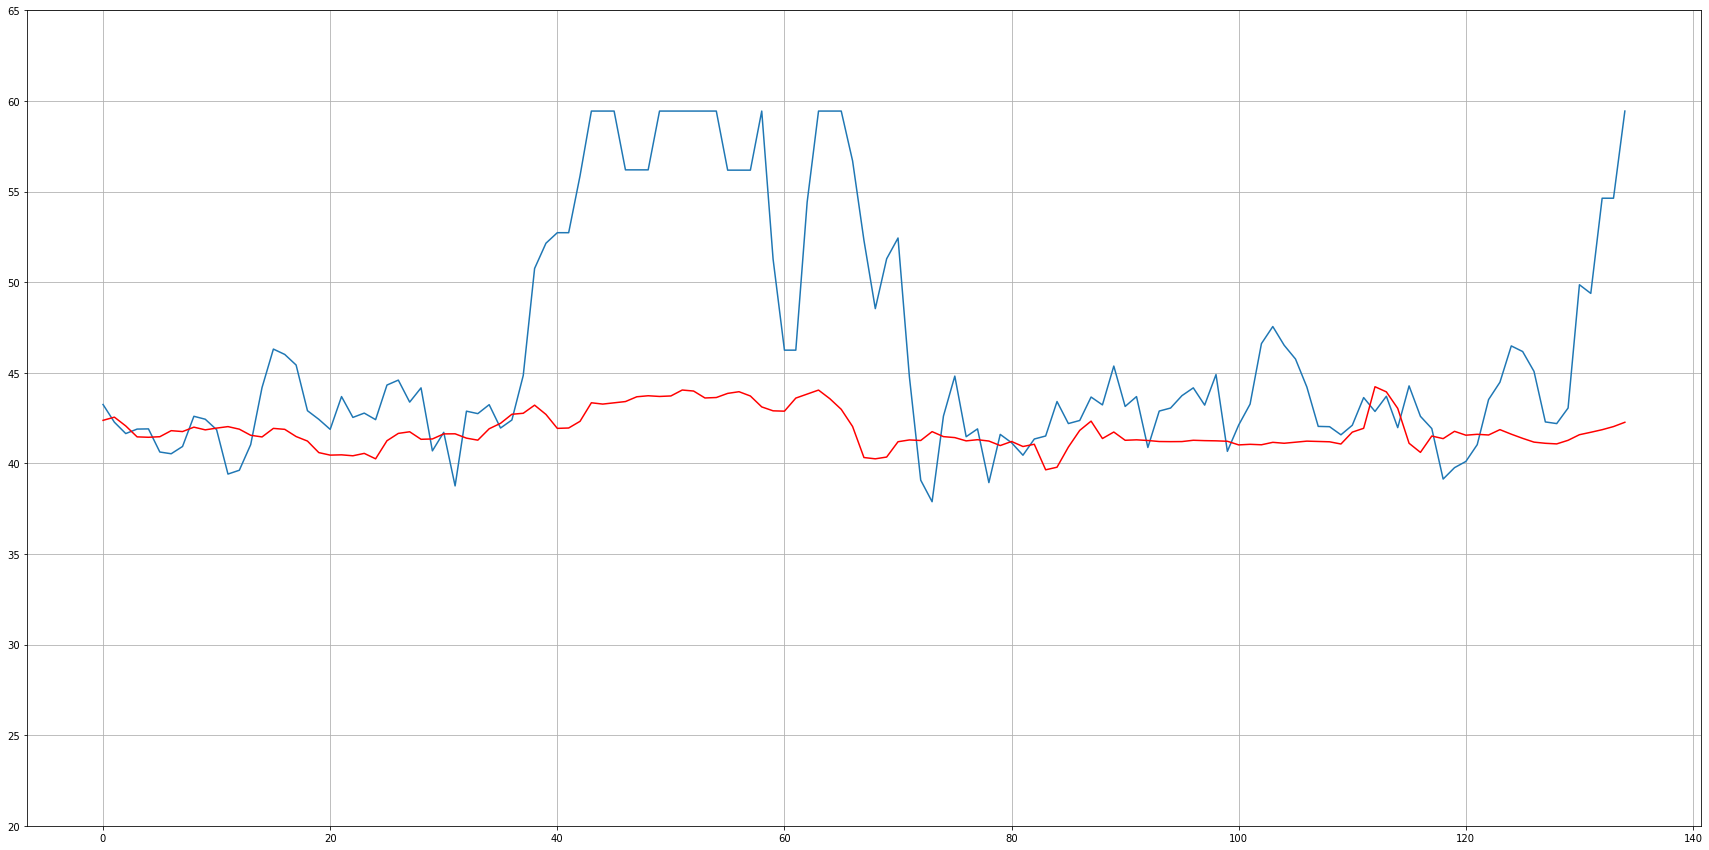

In [66]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(5, 1, 1) ,(5, 0, 1, periodicity/2), 0))#16T#remove optmization? 

parameters: (5, 1, 1)
seasonal parameters: (5, 0, 1, 90)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


start predicting
test:  135
predictions:  135
mean squared error=  52.50933816910203
RMSE=  7.246332739331119
time taken:  1050.2478694915771


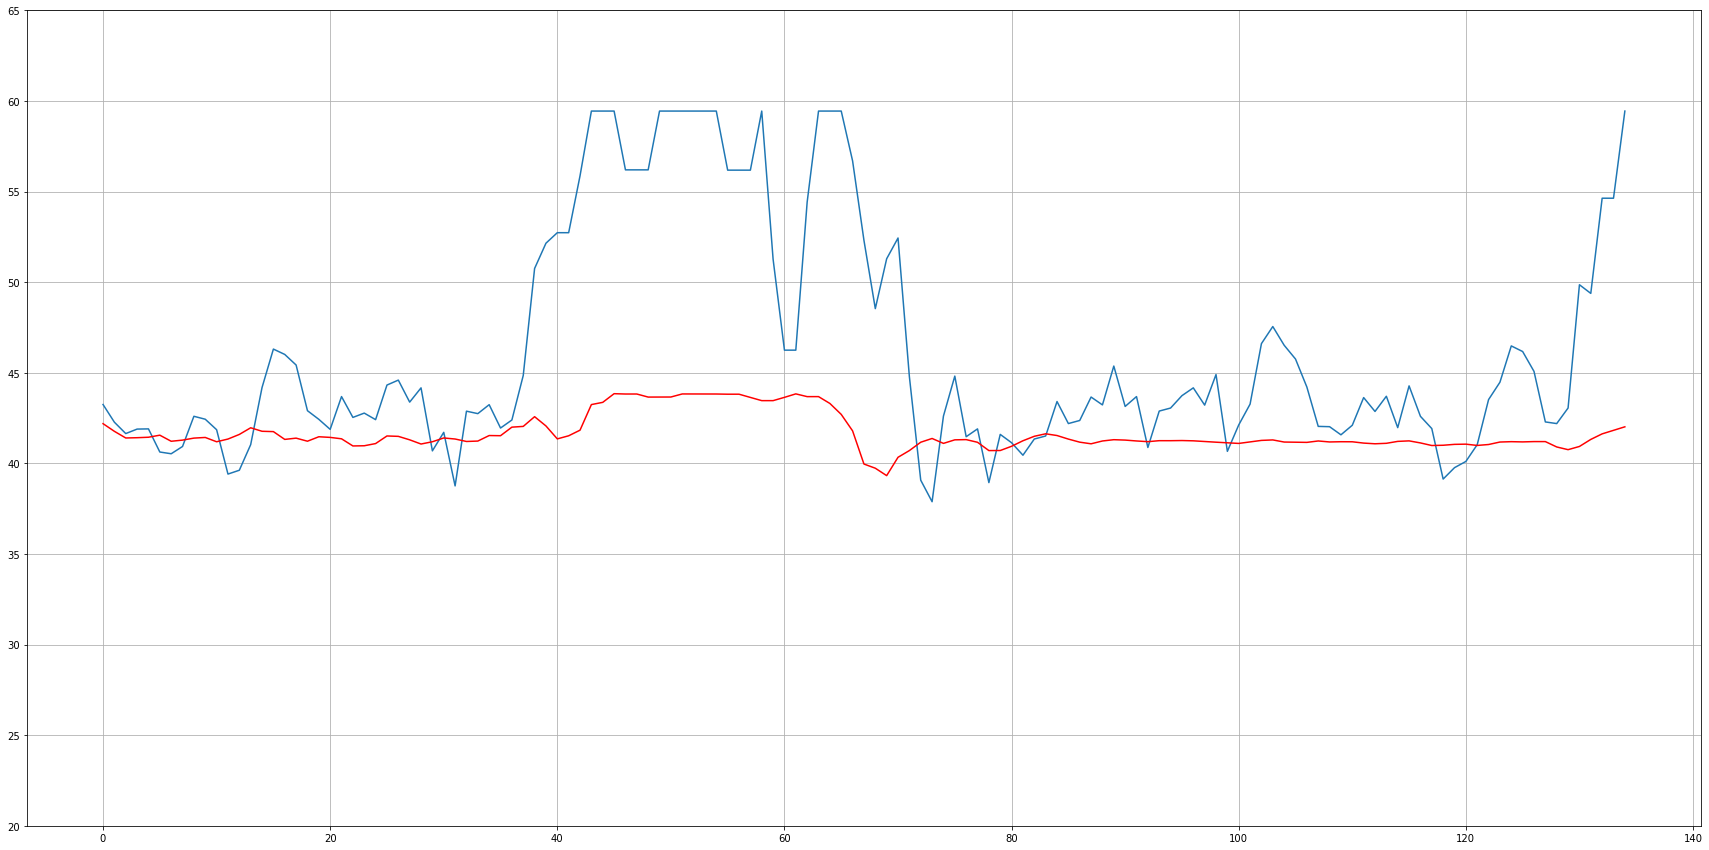

In [67]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(5, 1, 1) ,(5, 0, 1, periodicity), 0))#16T#remove optmization? 

parameters: (5, 0, 1)
seasonal parameters: (0, 0, 0, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  37.565371006438255
RMSE=  6.129059553180917
time taken:  0.5660228729248047


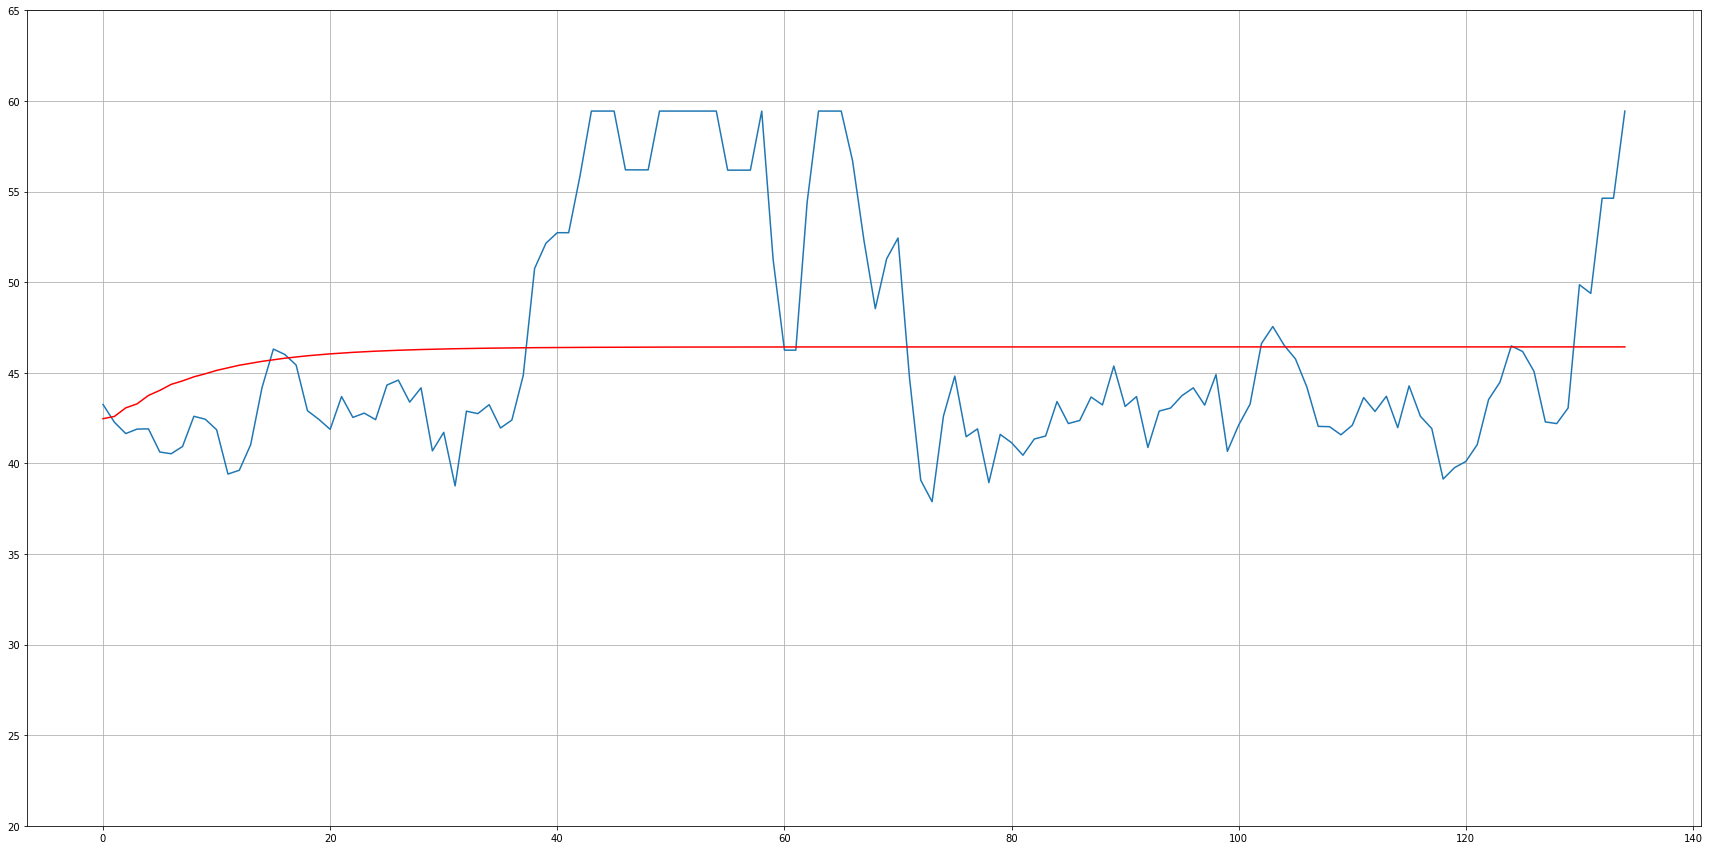

In [68]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(5,0, 1) ,(0, 0, 0, periodicity/2), 0))#16T#remove optmization? 

parameters: (5, 1, 1)
seasonal parameters: (1, 0, 0, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  62.7133195864183
RMSE=  7.919174173259375
time taken:  1.5320155620574951


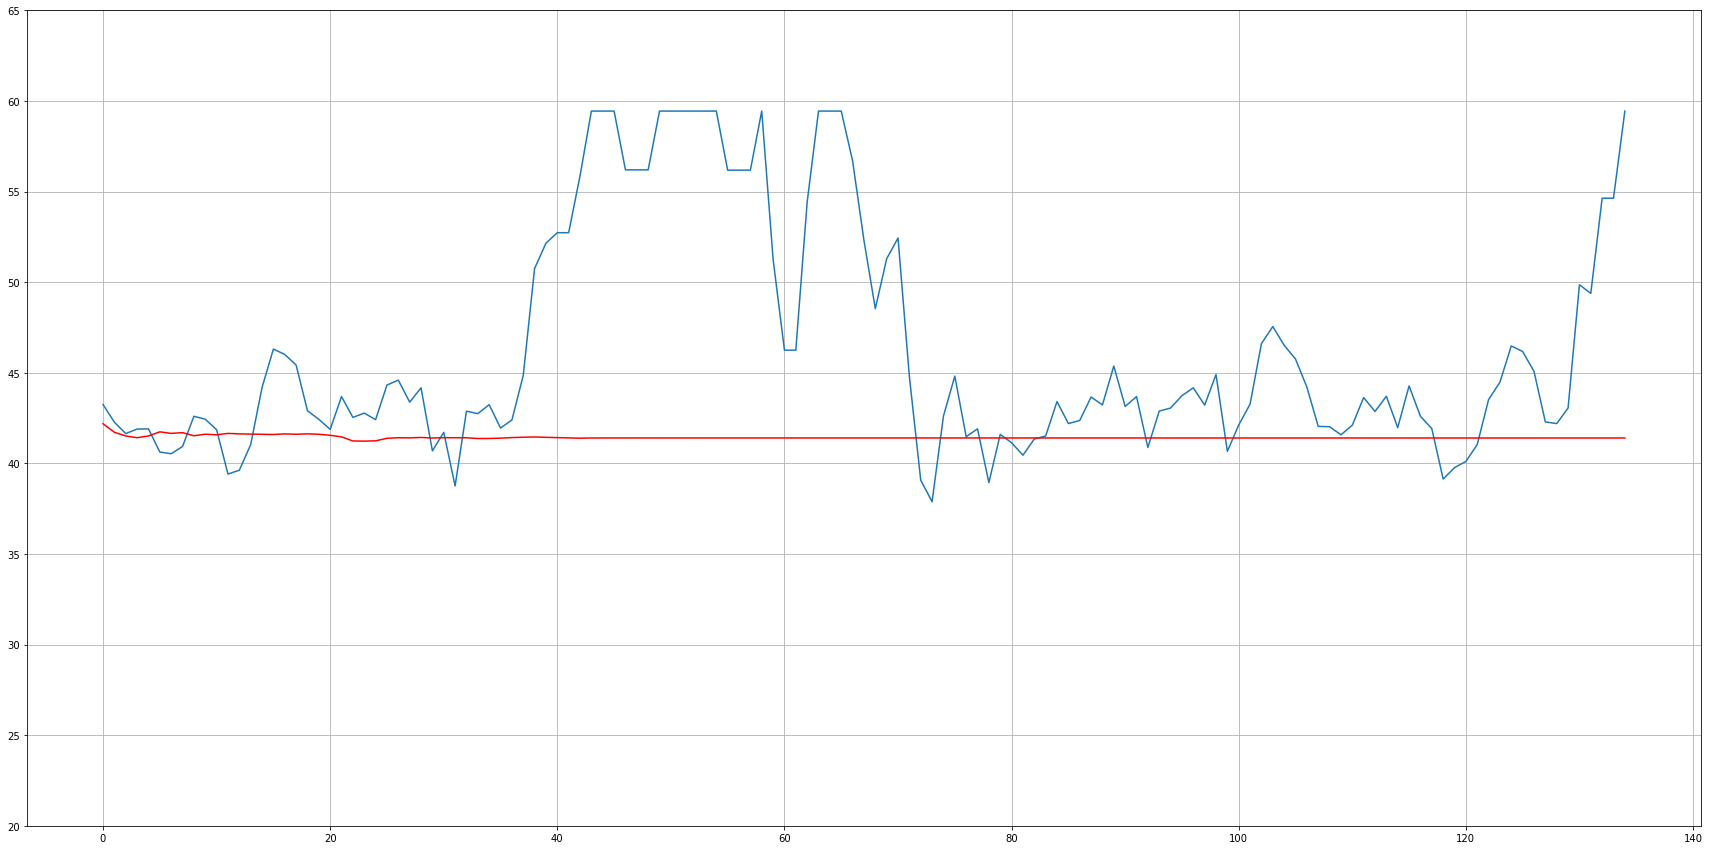

In [69]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(5, 1, 1) ,(1, 0, 0, periodicity/2), 0))#16T#remove optmization? 

parameters: (0, 0, 0)
seasonal parameters: (1, 0, 0, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  37.7458322068741
RMSE=  6.143763684165766
time taken:  0.4199976921081543


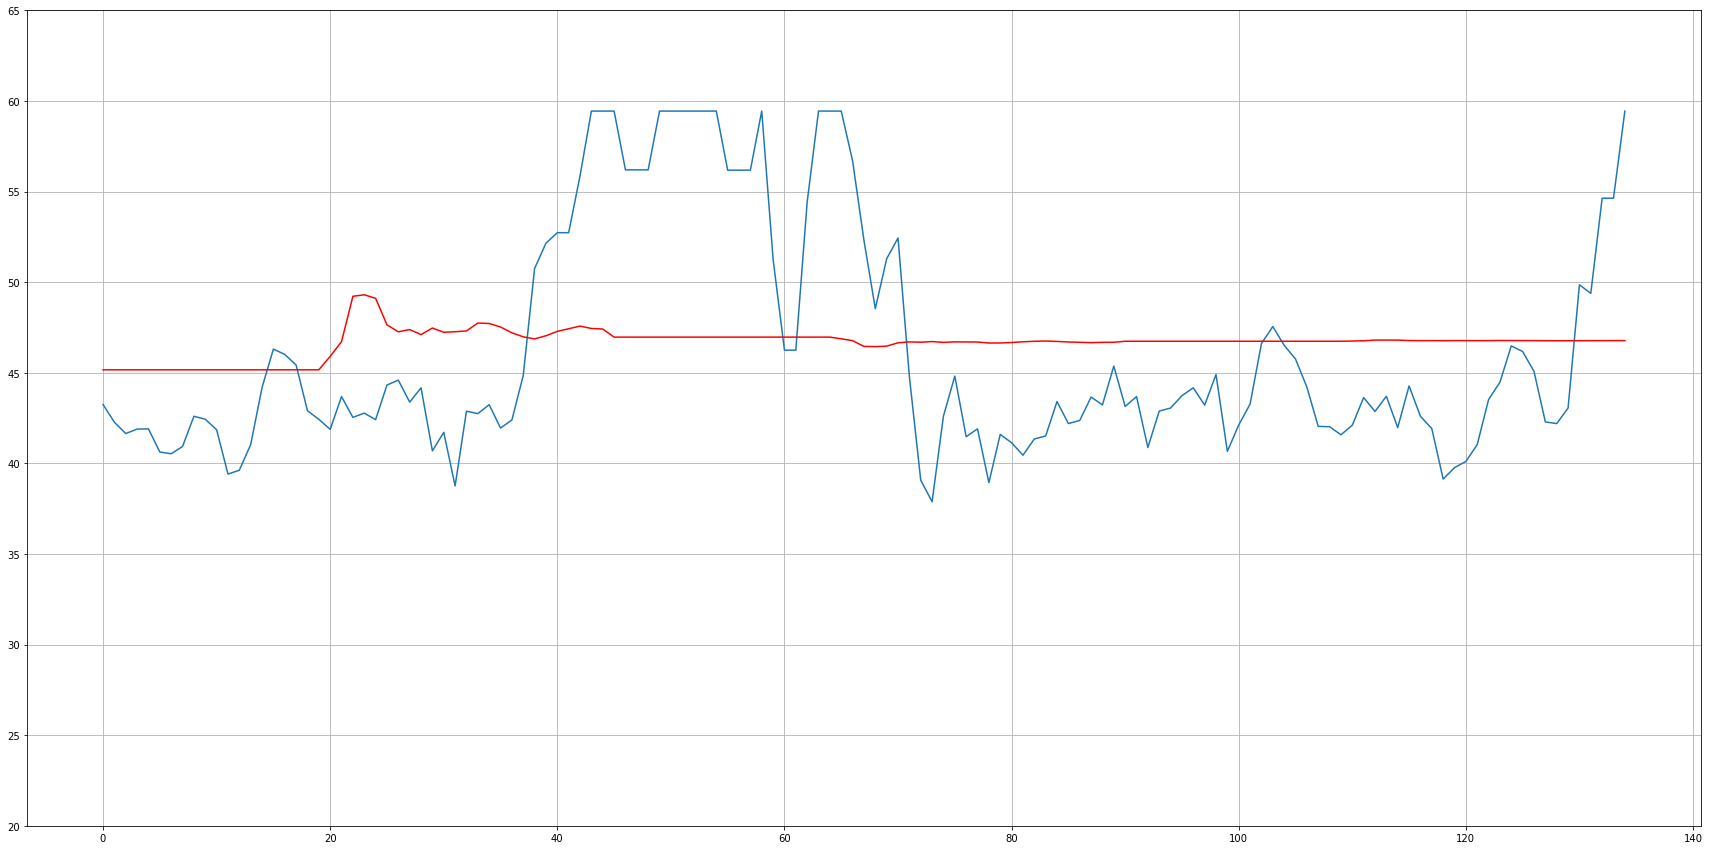

In [70]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(0, 0, 0) ,(1, 0, 0, periodicity/2), 0))#16T#remove optmization? 

parameters: (0, 0, 0)
seasonal parameters: (0, 0, 0, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  39.60013015473991
RMSE=  6.292863430485355
time taken:  0.200958251953125


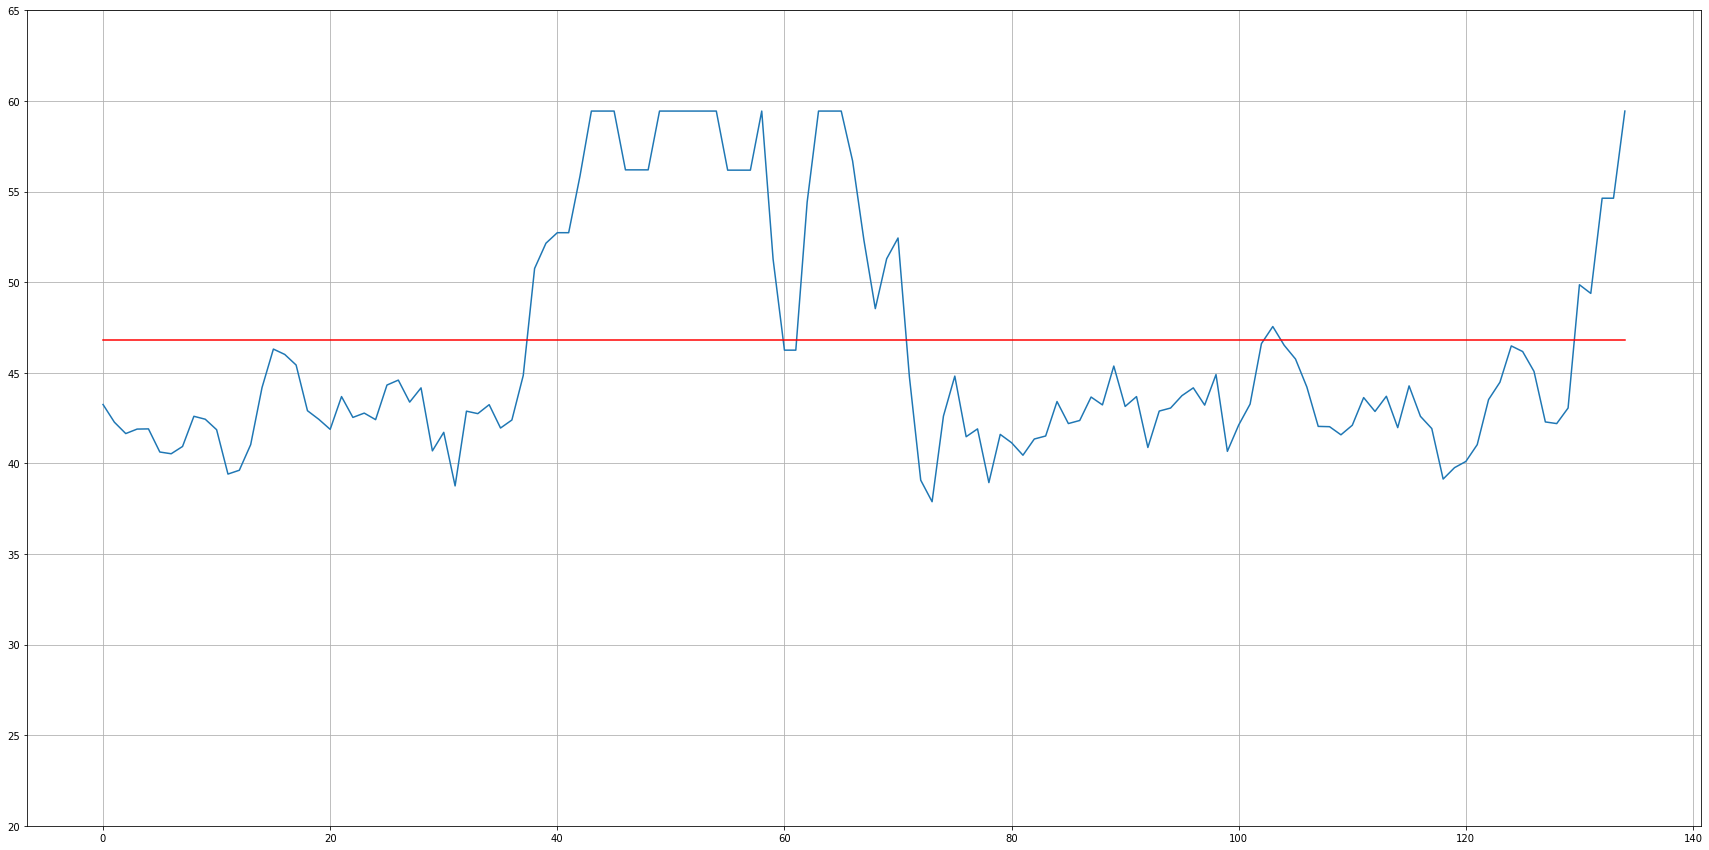

In [71]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(0, 0, 0) ,(0, 0, 0, periodicity/2), 0))#16T#remove optmization? 

parameters: (1, 0, 0)
seasonal parameters: (1, 0, 0, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  37.16638357173343
RMSE=  6.096423834653676
time taken:  0.849010705947876


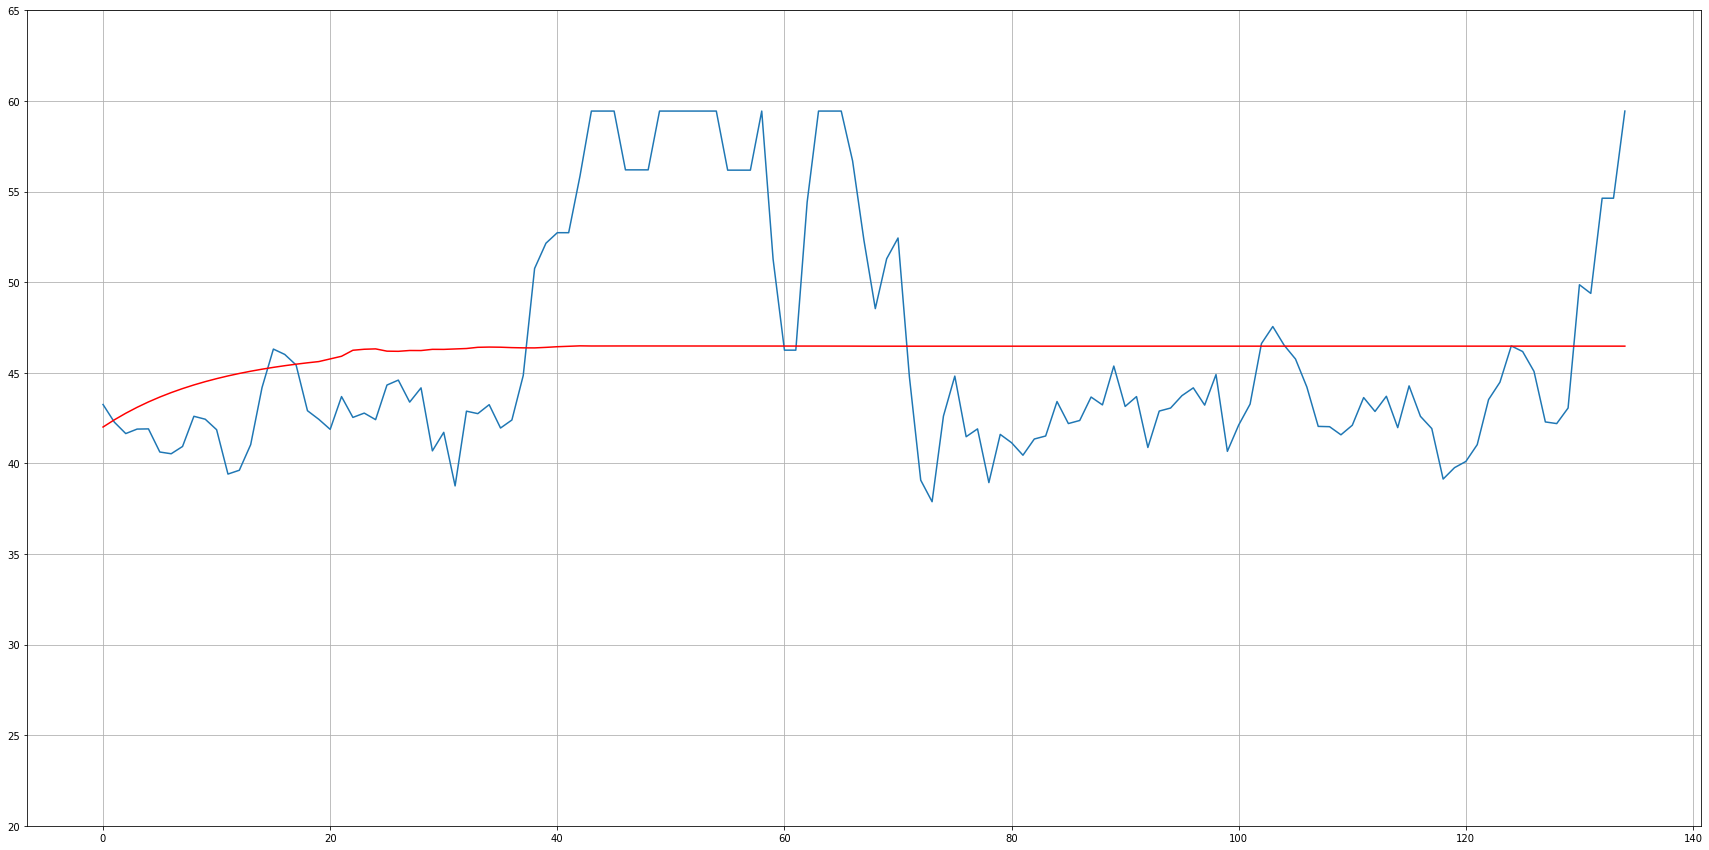

In [72]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(1, 0, 0) ,(1, 0, 0, periodicity/2), 0))#16T#remove optmization? 

parameters: (0, 0, 0)
seasonal parameters: (0, 0, 0, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  39.60013015473991
RMSE=  6.292863430485355
time taken:  0.1127166748046875


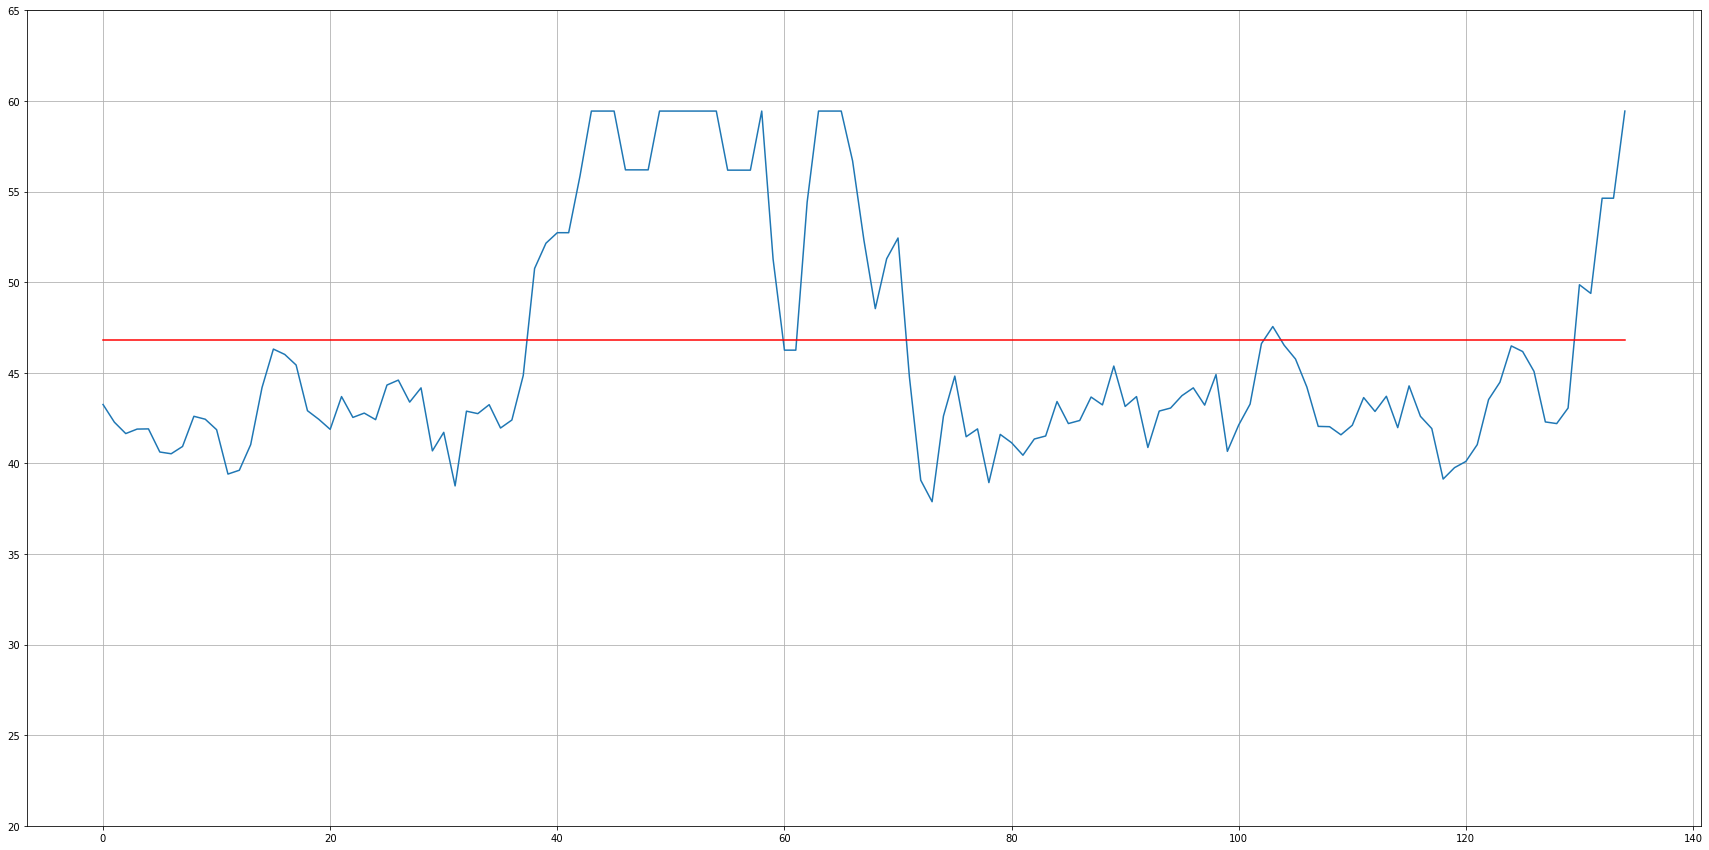

In [73]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(0, 0, 0) ,(0, 0, 0, periodicity/2), 0))#16T#remove optmization? 

parameters: (1, 0, 0)
seasonal parameters: (0, 0, 0, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  37.315533516454494
RMSE=  6.108644163515706
time taken:  0.12200427055358887


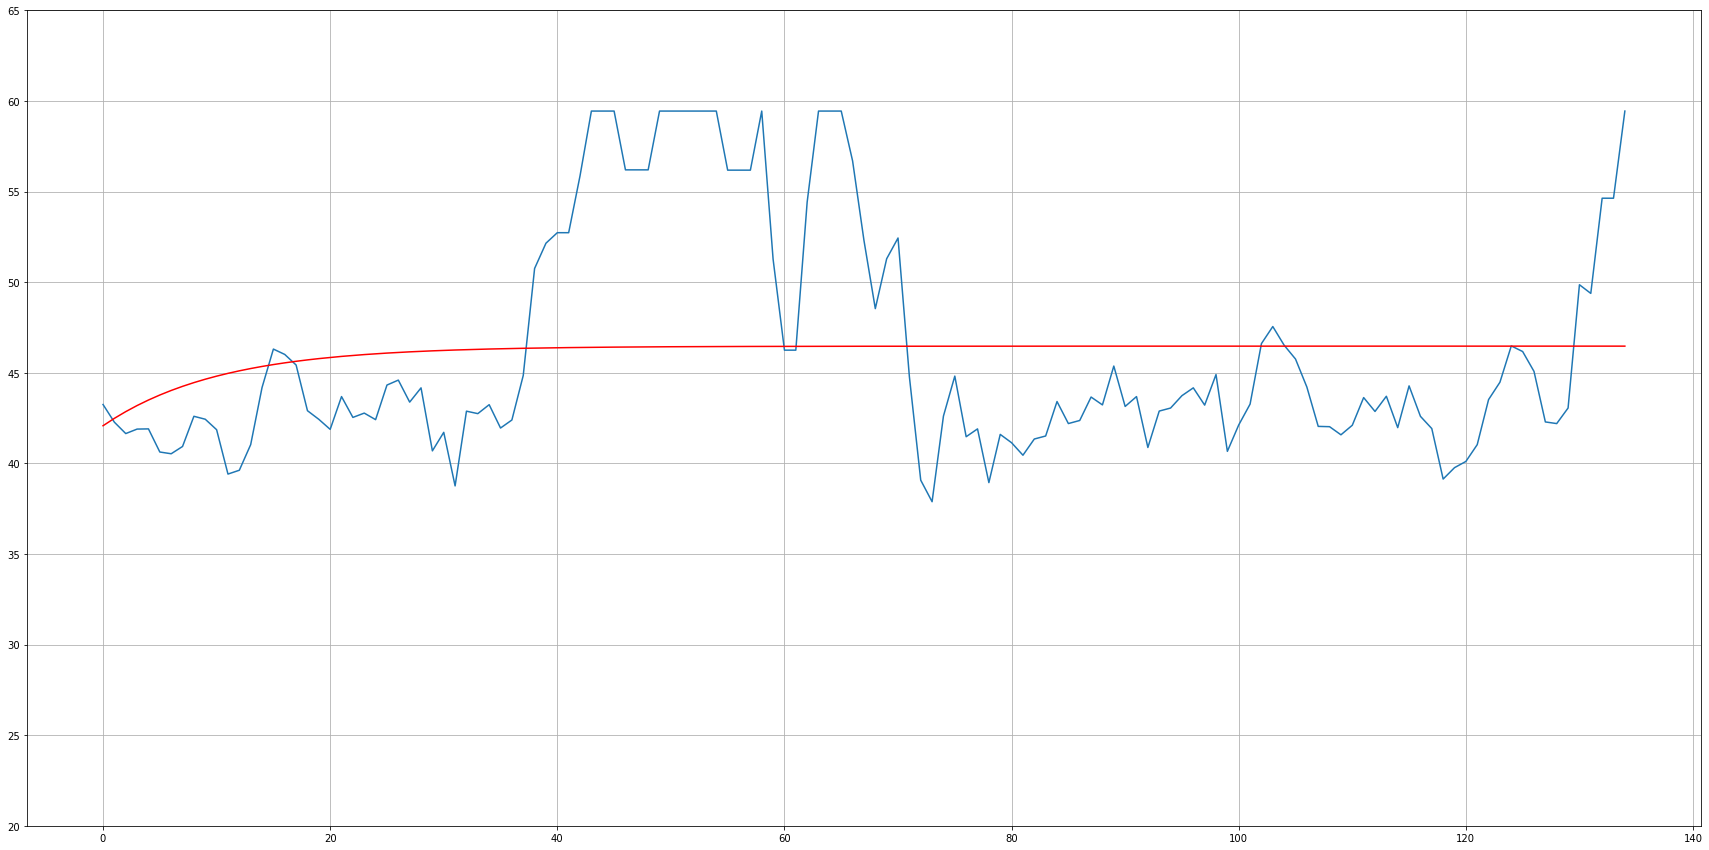

In [74]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(1, 0, 0) ,(0, 0, 0, periodicity/2), 0))#16T#remove optmization? 

parameters: (2, 0, 0)
seasonal parameters: (0, 0, 0, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  38.182458499250174
RMSE=  6.179195619111777
time taken:  0.18799877166748047


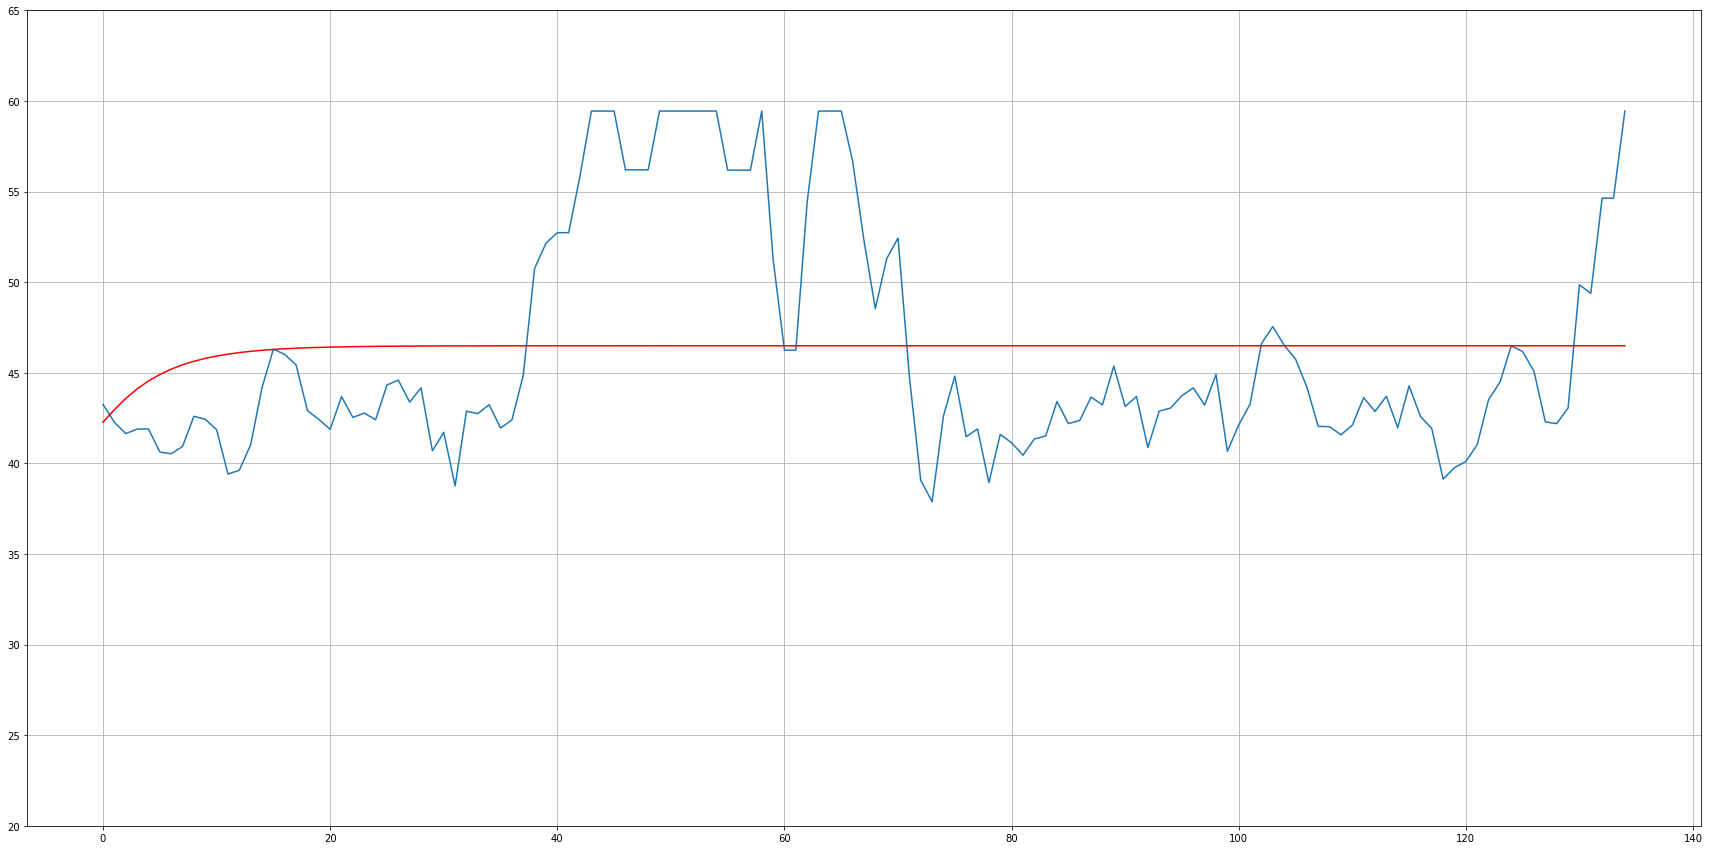

In [75]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(2, 0, 0) ,(0, 0, 0, periodicity/2), 0))#16T#remove optmization? 

parameters: (3, 0, 0)
seasonal parameters: (0, 0, 0, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  38.21293969278992
RMSE=  6.181661564077244
time taken:  0.26599884033203125


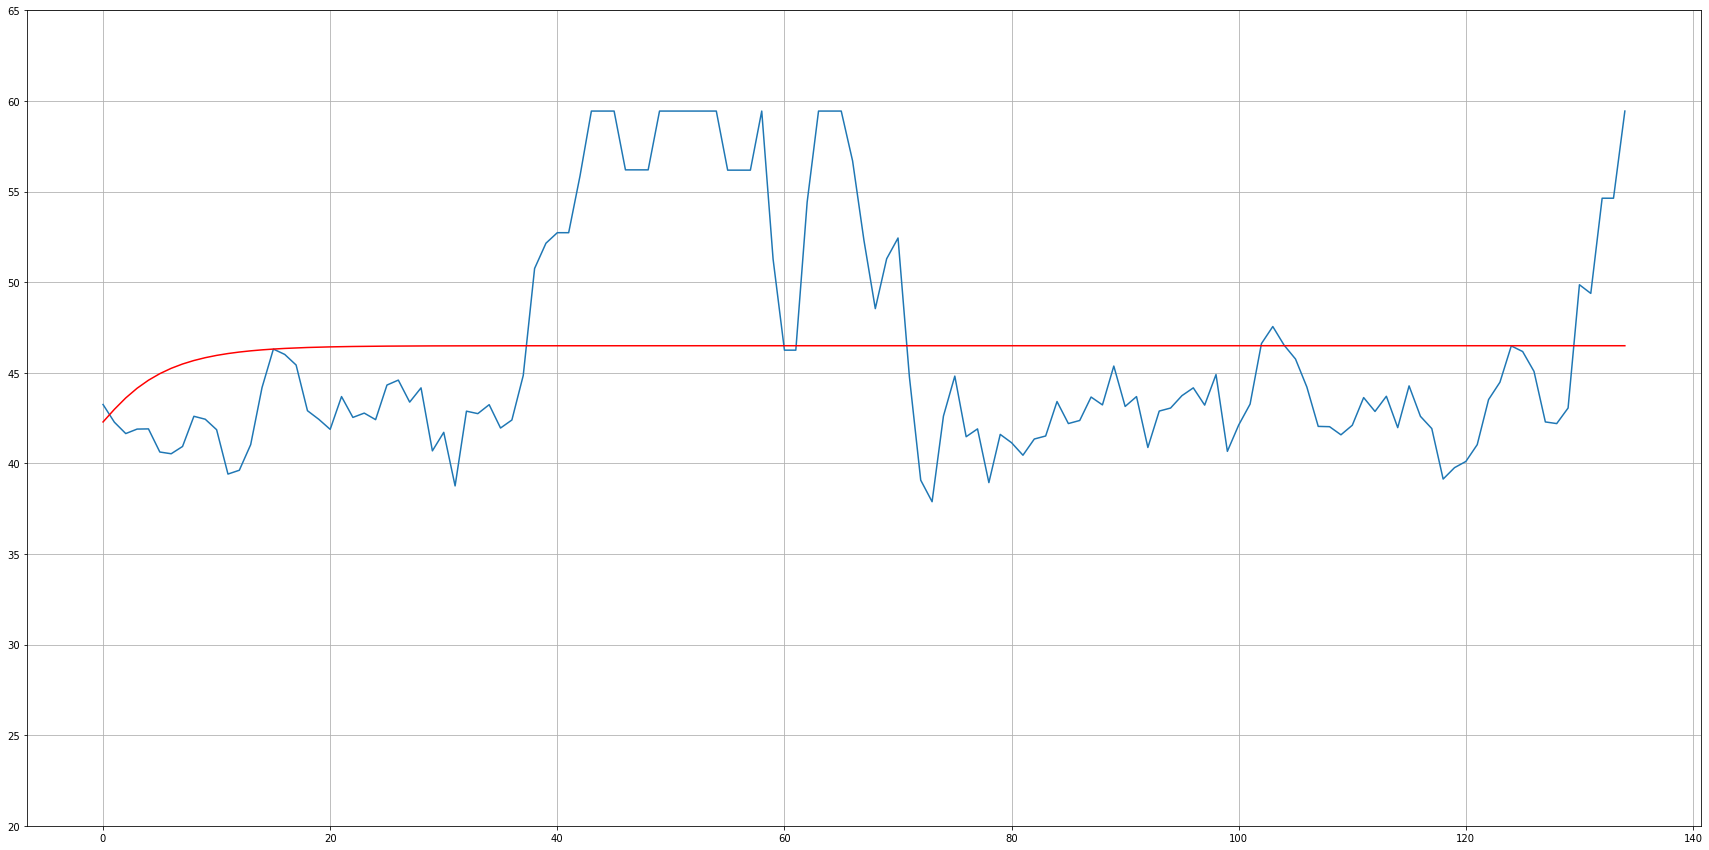

In [76]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(3, 0, 0) ,(0, 0, 0, periodicity/2), 0))#16T#remove optmization? 

parameters: (4, 0, 0)
seasonal parameters: (0, 0, 0, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  37.28029506018549
RMSE=  6.105759171486007
time taken:  0.2922356128692627


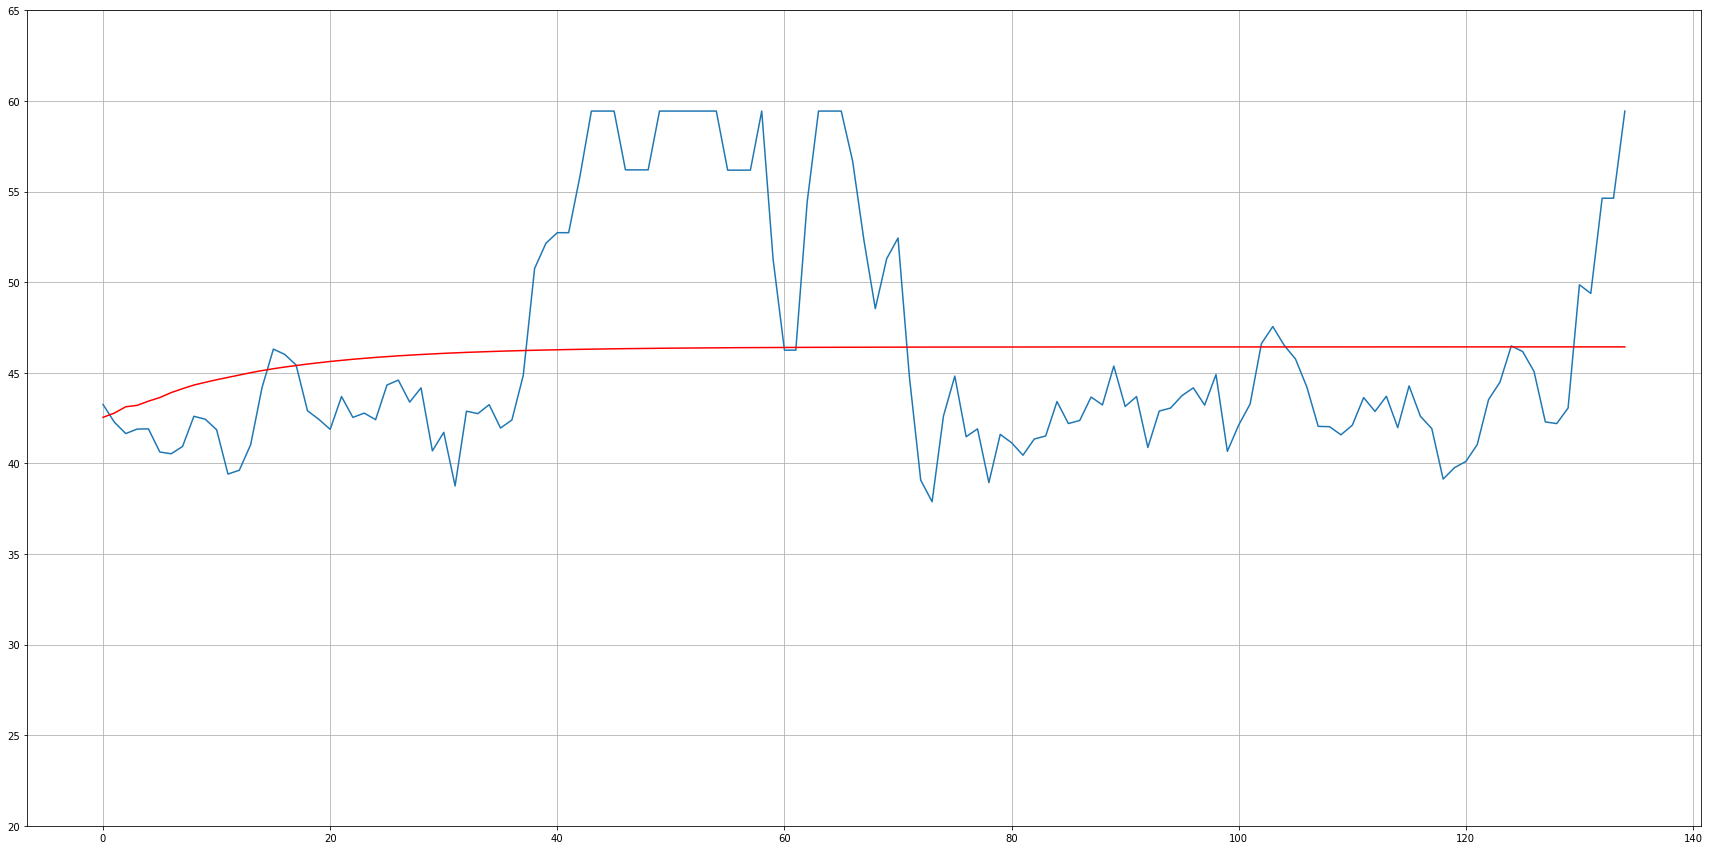

In [77]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(4, 0, 0) ,(0, 0, 0, periodicity/2), 0))#16T#remove optmization? 

parameters: (0, 1, 0)
seasonal parameters: (0, 0, 0, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  60.64229788920241
RMSE=  7.787316475474873
time taken:  0.04600334167480469


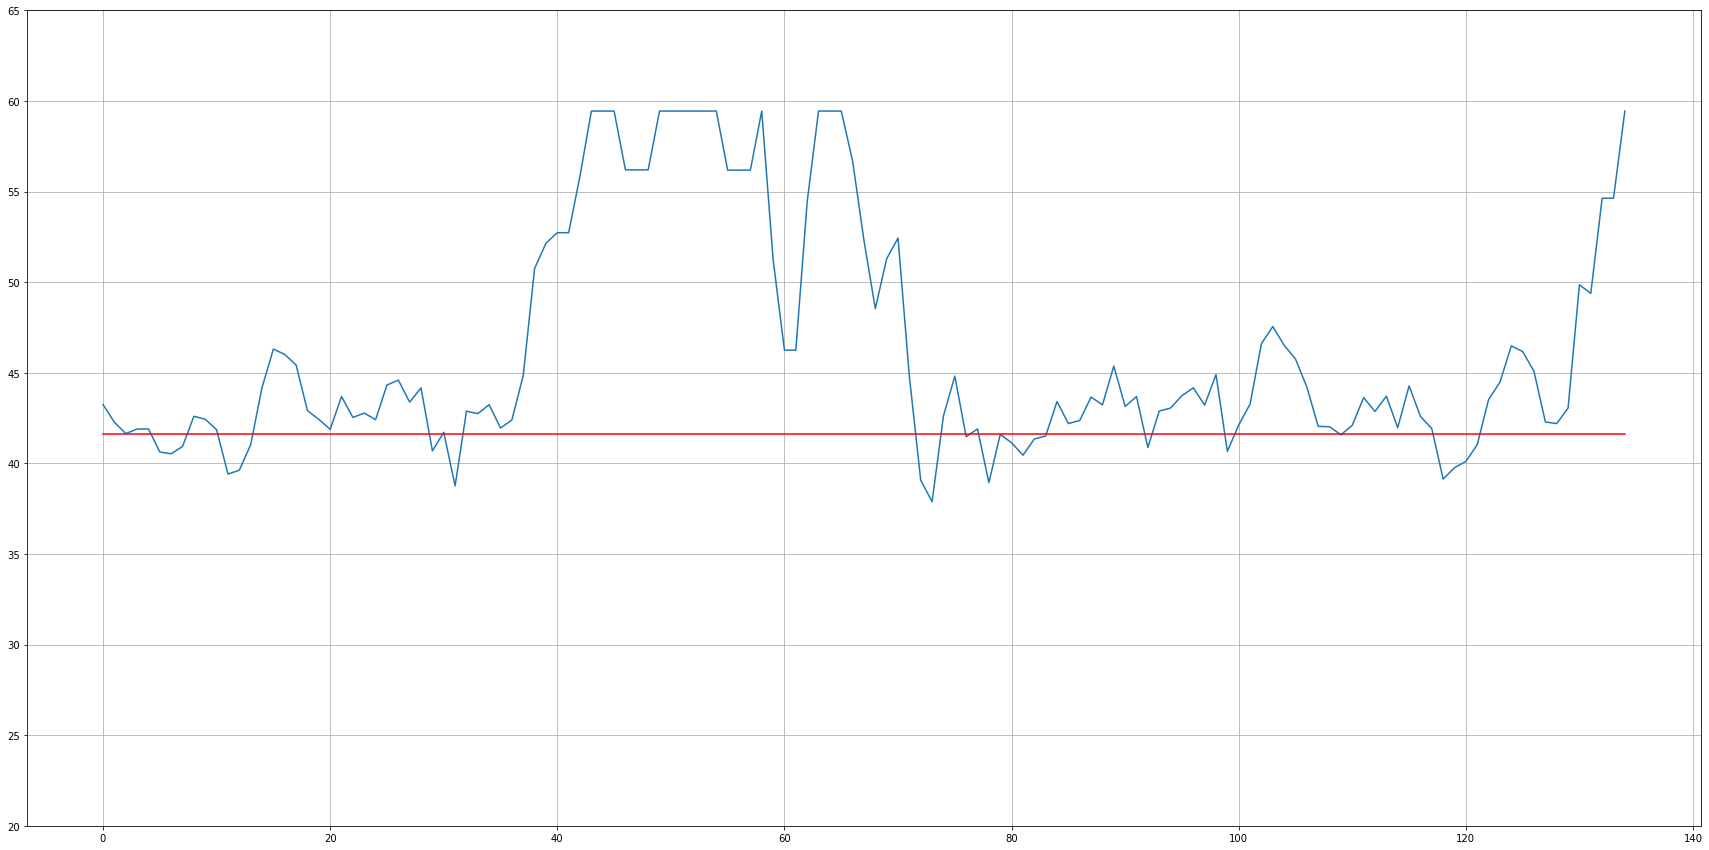

In [78]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(0,1, 0) ,(0, 0, 0, periodicity/2), 0))#16T#remove optmization? 

parameters: (0, 0, 1)
seasonal parameters: (0, 0, 0, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  39.47225936590749
RMSE=  6.282695231022072
time taken:  0.1589963436126709


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


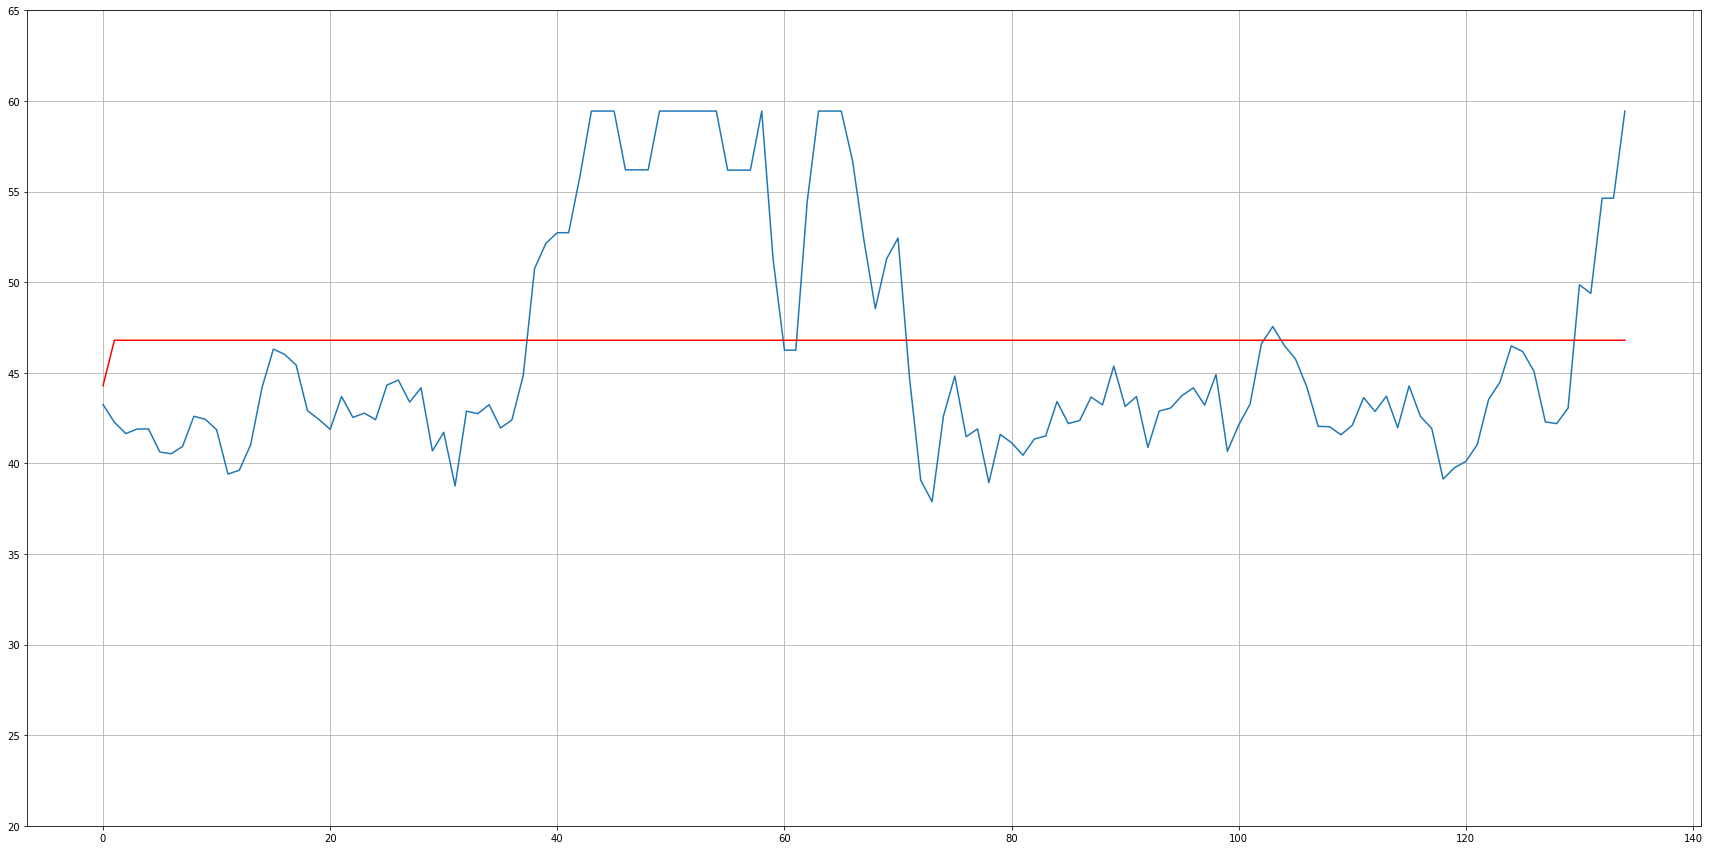

In [79]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(0, 0, 1) ,(0, 0, 0, periodicity/2), 0))#16T#remove optmization? 

parameters: (1, 1, 0)
seasonal parameters: (0, 0, 0, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  59.95692486706463
RMSE=  7.743185705319525
time taken:  0.0799720287322998


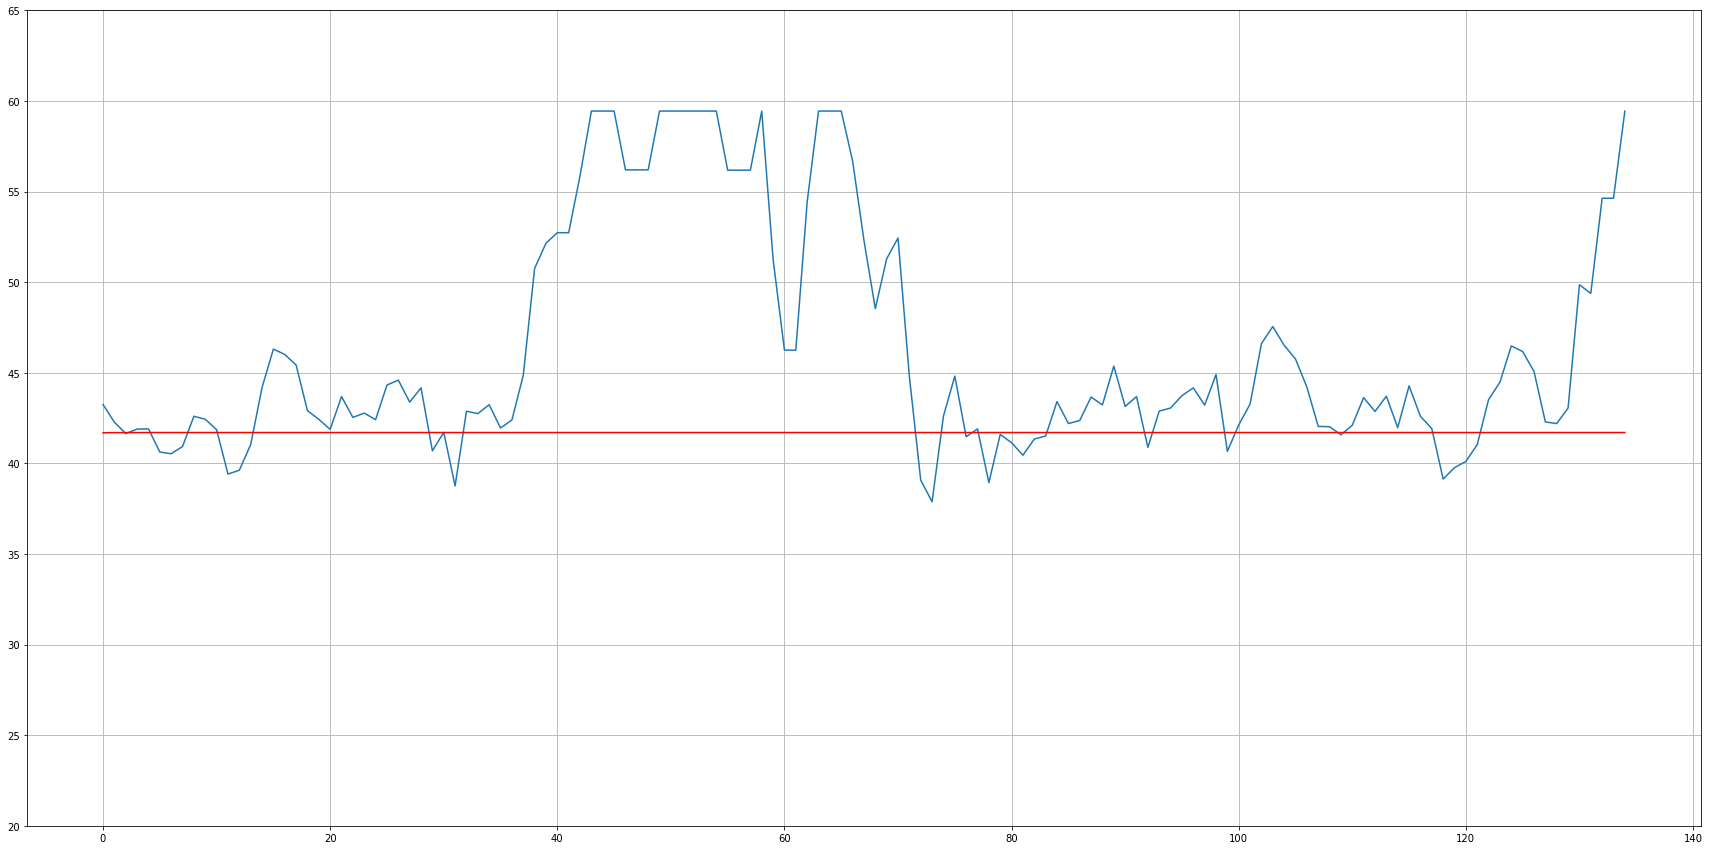

In [80]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(1, 1, 0) ,(0, 0, 0, periodicity/2), 0))#16T#remove optmization? 

parameters: (1, 1, 1)
seasonal parameters: (0, 0, 0, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  60.19795023094803
RMSE=  7.7587338033308
time taken:  0.12399578094482422


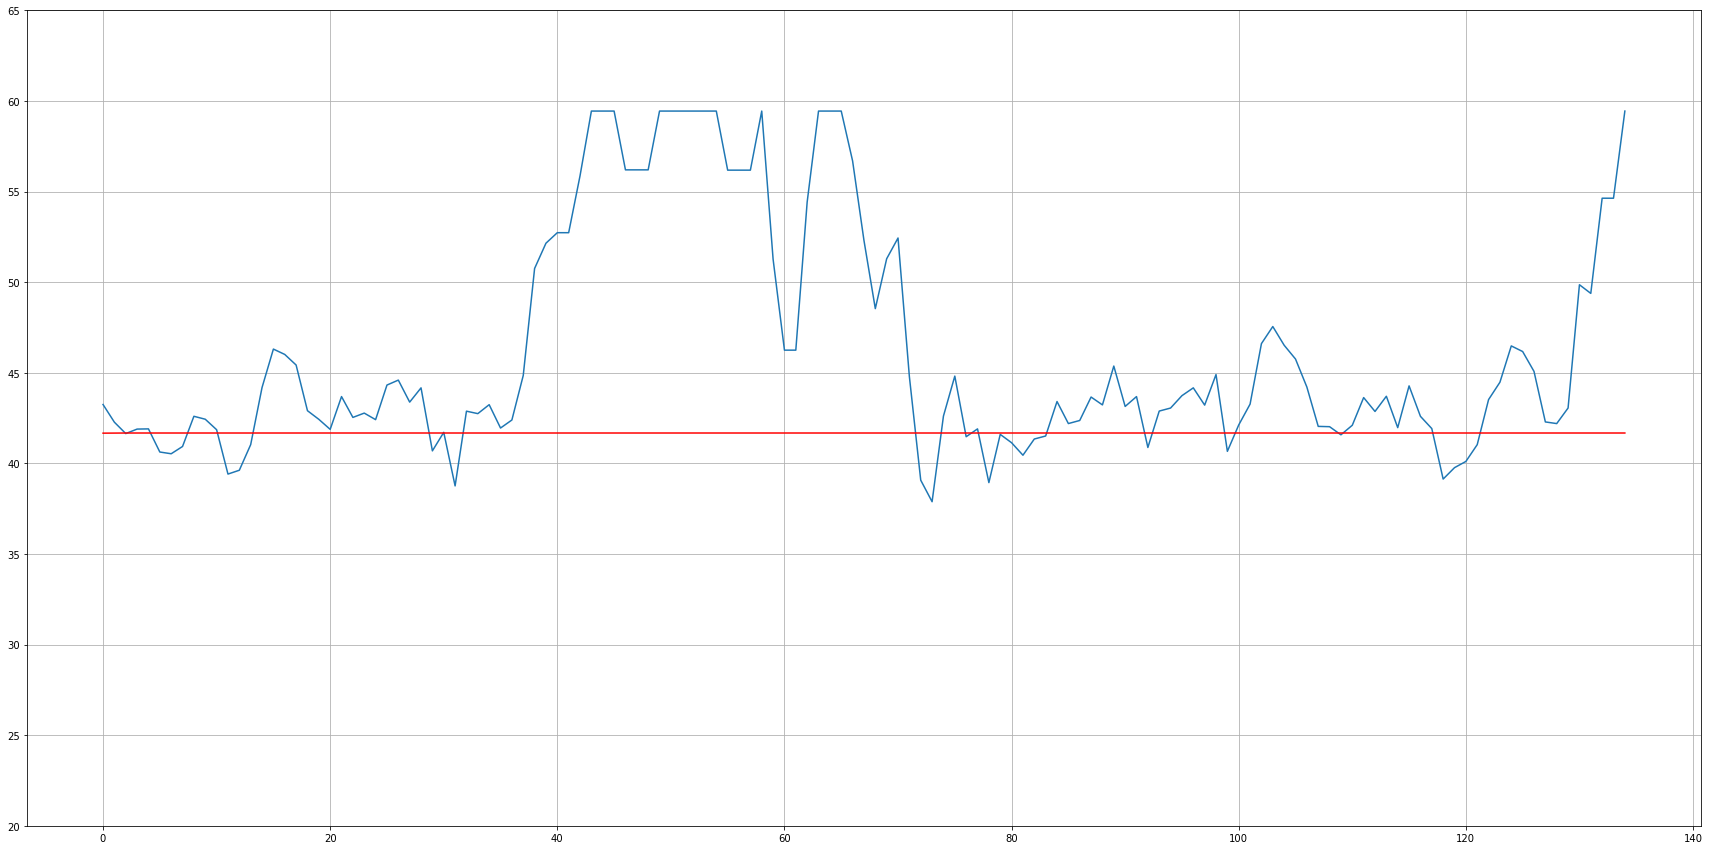

In [81]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(1, 1, 1) ,(0, 0, 0, periodicity/2), 0))#16T#remove optmization? 

parameters: (3, 0, 1)
seasonal parameters: (0, 0, 0, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  38.46489089608422
RMSE=  6.202007005484936
time taken:  0.3910043239593506


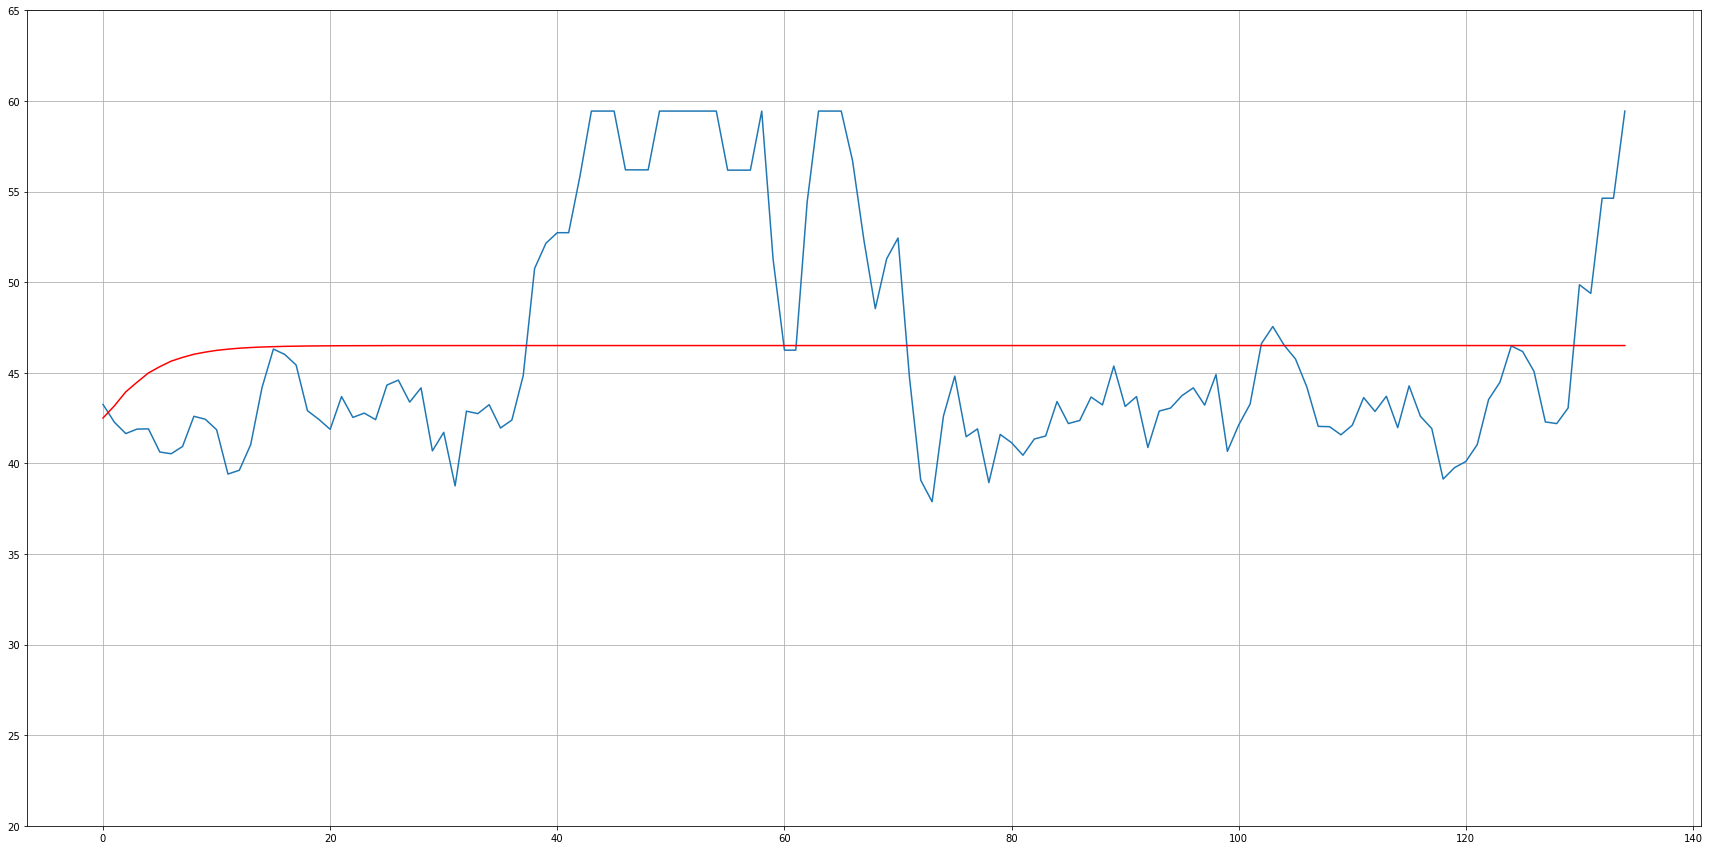

In [82]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(3, 0, 1) ,(0, 0, 0, periodicity/2), 0))#16T#remove optmization? 

parameters: (5, 1, 1)
seasonal parameters: (0, 0, 0, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  61.48469363438314
RMSE=  7.841217611722247
time taken:  0.28400135040283203


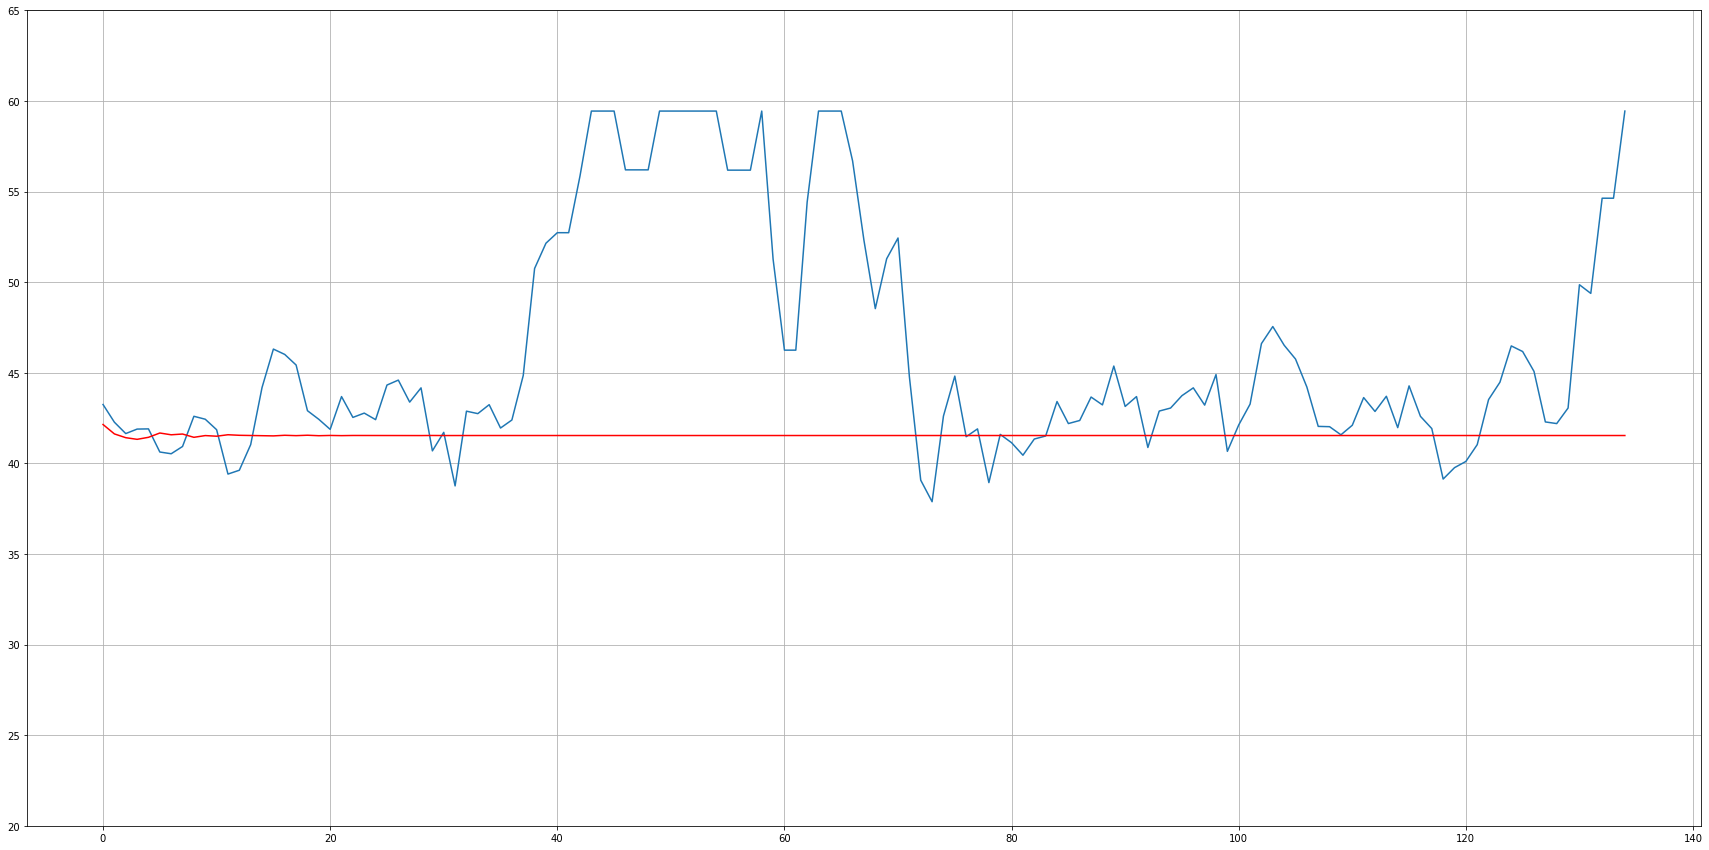

In [83]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(5, 1, 1) ,(0, 0, 0, periodicity/2), 0))#16T#remove optmization? 

parameters: (1, 1, 1)
seasonal parameters: (1, 1, 1, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  91.44091697567853
RMSE=  9.562474416994721
time taken:  11.262114763259888


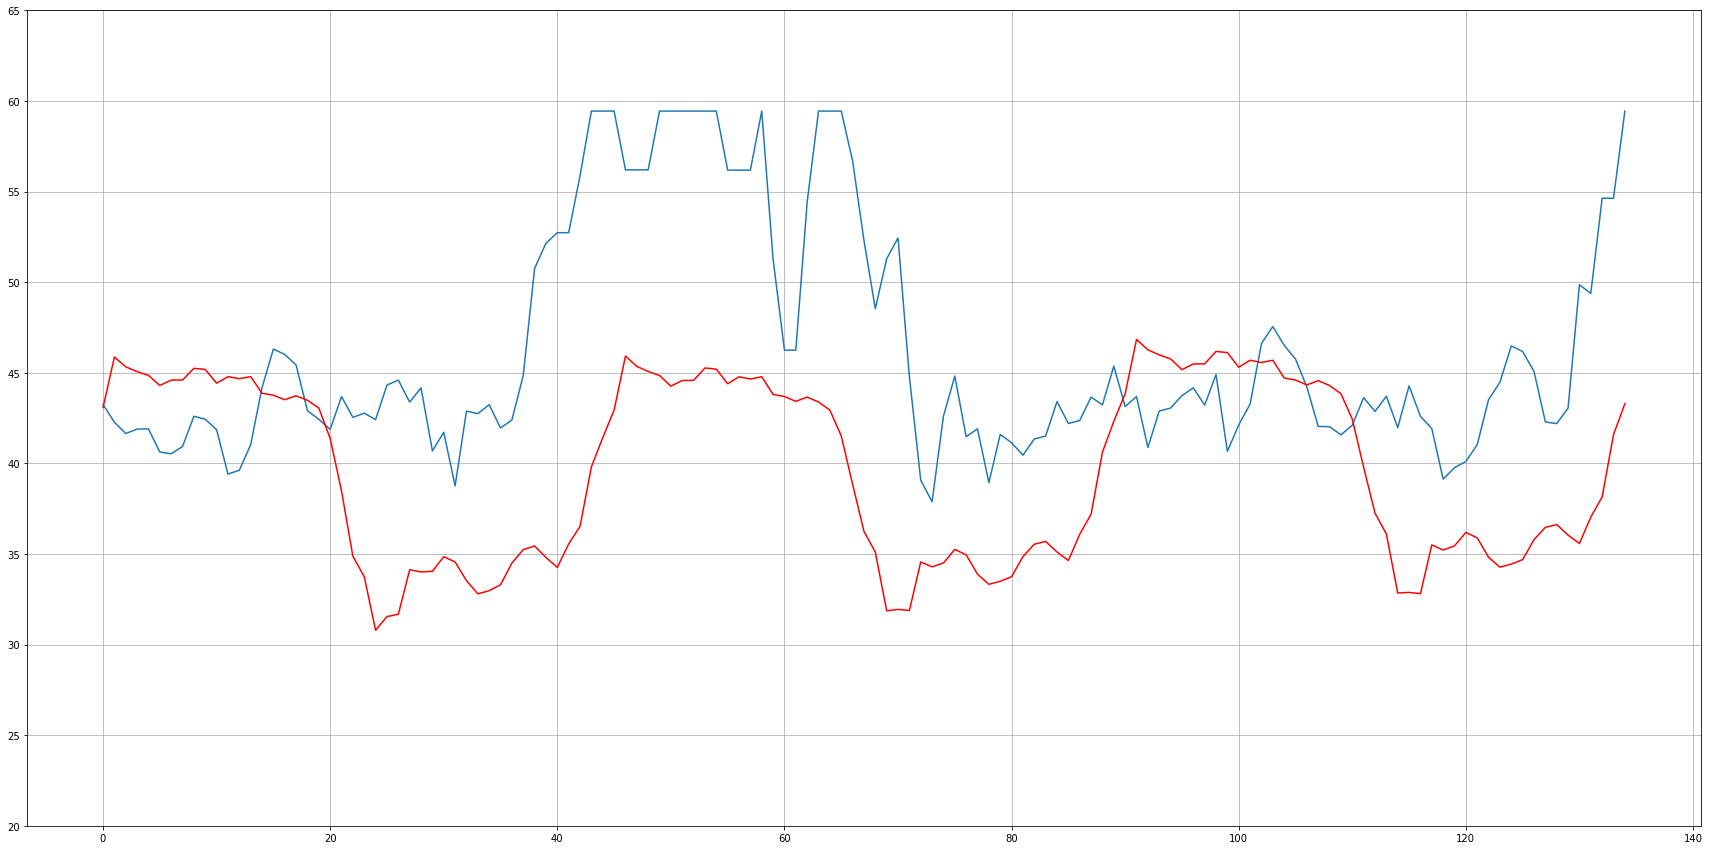

In [84]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(1, 1, 1) ,(1, 1, 1, periodicity/2), 0))#16T#remove optmization? 

In [88]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    critical_value = dftest[4]['5%']
    test_statistic = dftest[0]
    alpha = 1e-3
    pvalue = dftest[1]
    if pvalue < alpha and test_statistic < critical_value:  # null hypothesis: x is non stationary
        print("X is stationary")
        return True
    else:
        print("X is not stationary")
        return False

In [90]:
ts_diff = pd.Series(new_data)
d = 0
while test_stationarity(ts_diff) is False:
    ts_diff = ts_diff.diff().dropna()
    d = d + 1
print(d)

X is stationary
0


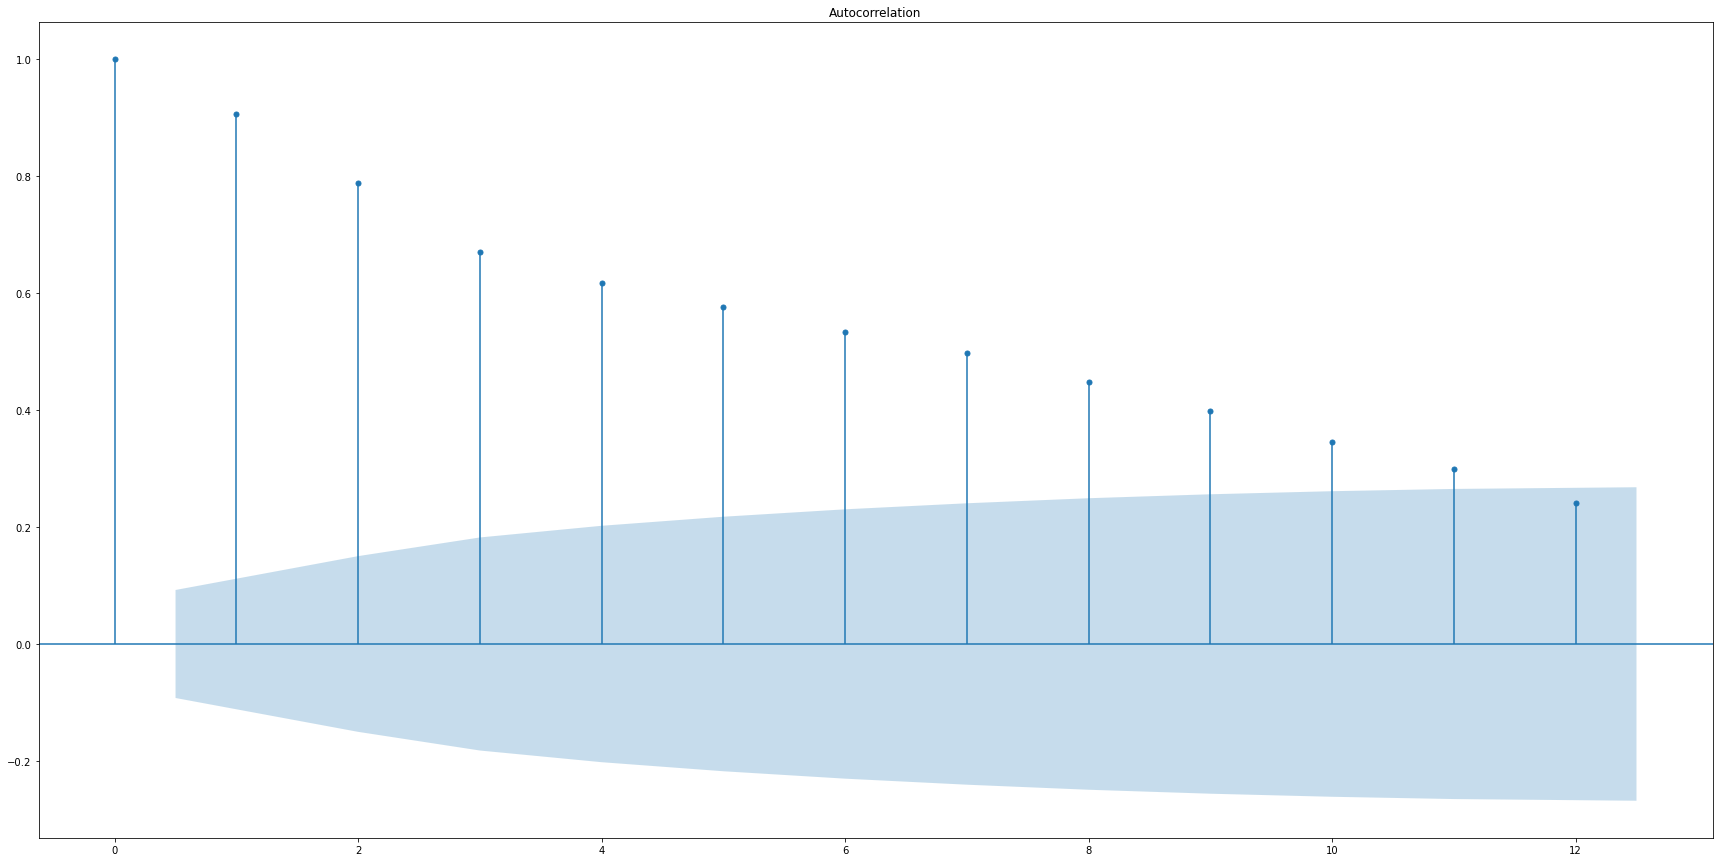

In [86]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(new_data, lags =12)

plt.show()

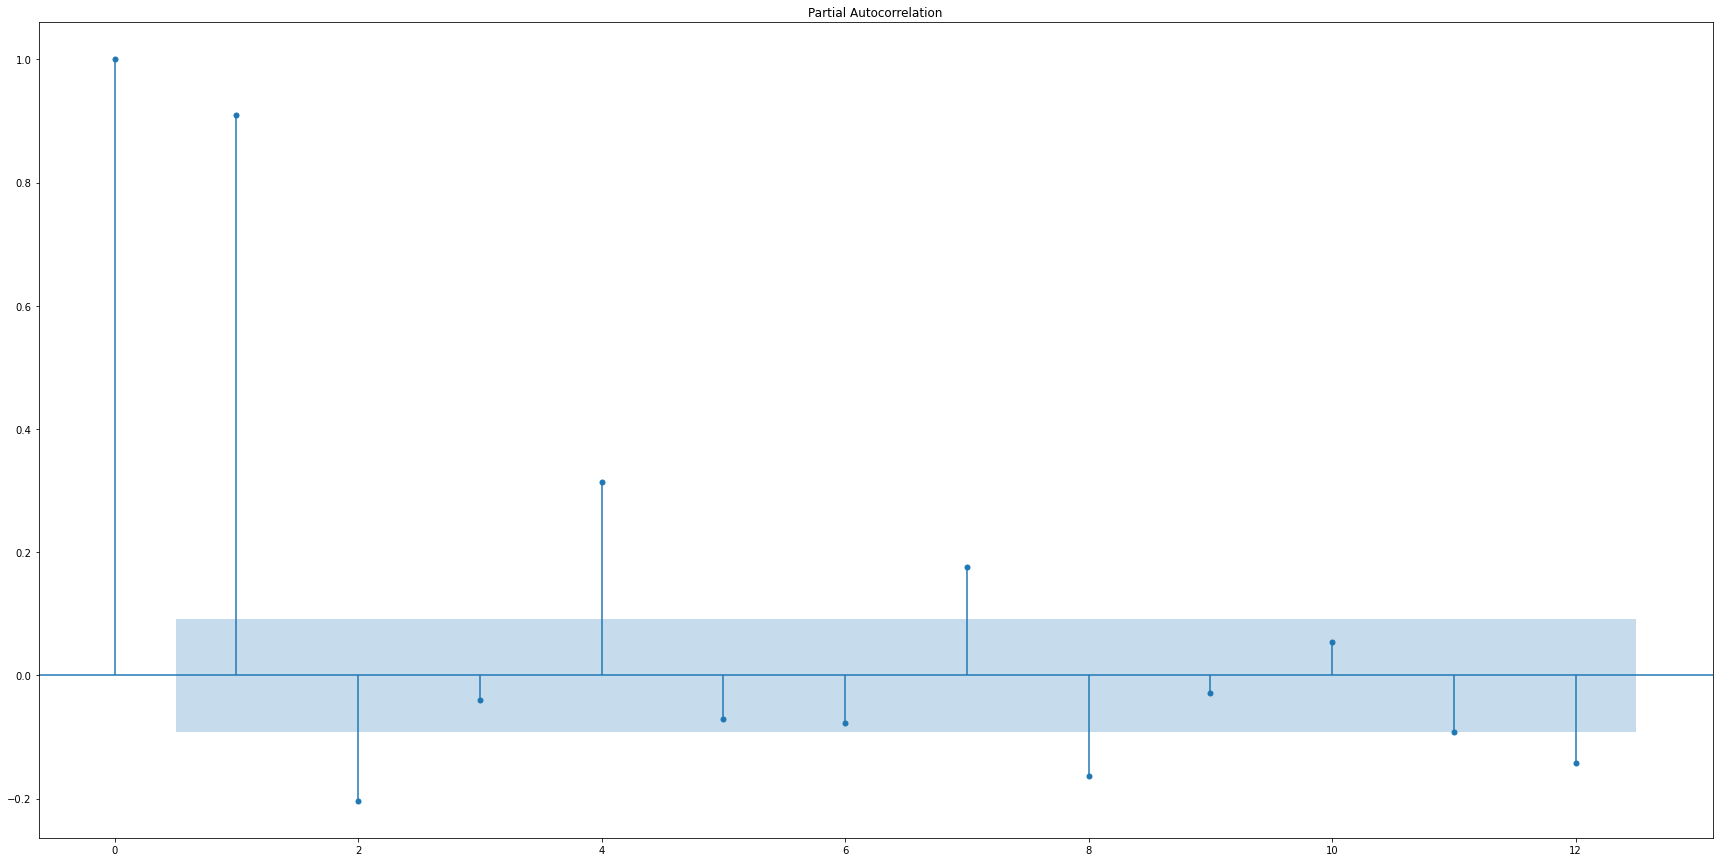

In [92]:
plot_pacf(new_data, lags =12)

plt.show()

parameters: (0, 1, 1)
seasonal parameters: (1, 1, 1, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  91.65127055871667
RMSE=  9.573467008284755
time taken:  8.527058362960815


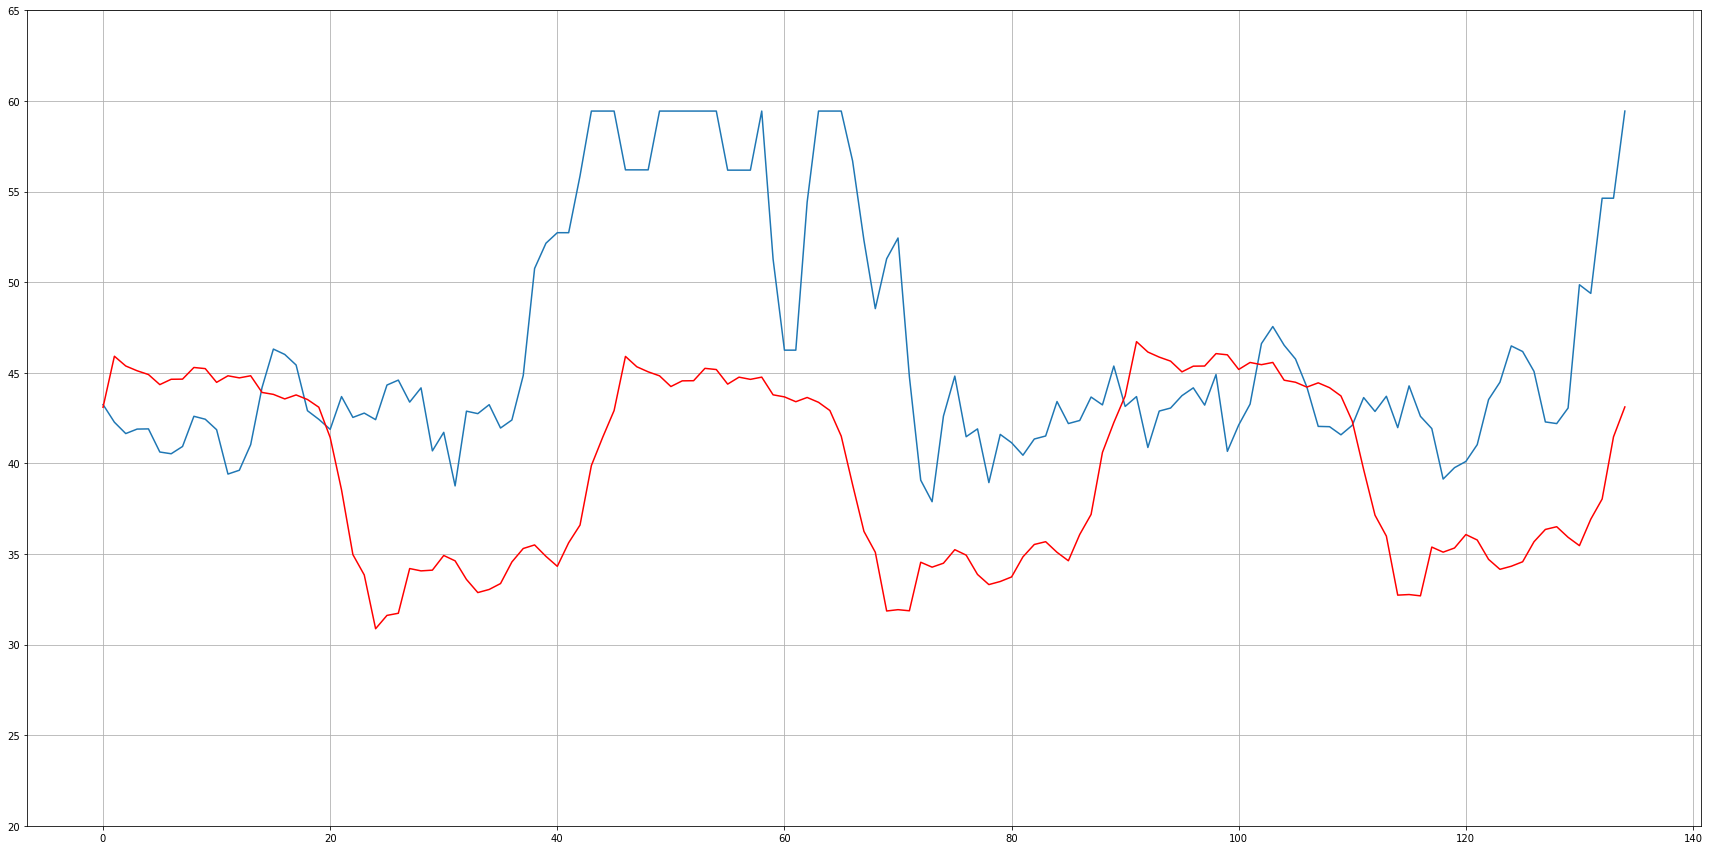

In [93]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(0, 1, 1) ,(1, 1, 1, periodicity/2), 0))#16T#remove optmization? 

parameters: (1, 1, 11)
seasonal parameters: (1, 1, 1, 45.0)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  135
predictions:  135
mean squared error=  45.839839330282295
RMSE=  6.7705124865317465
time taken:  49.689732789993286


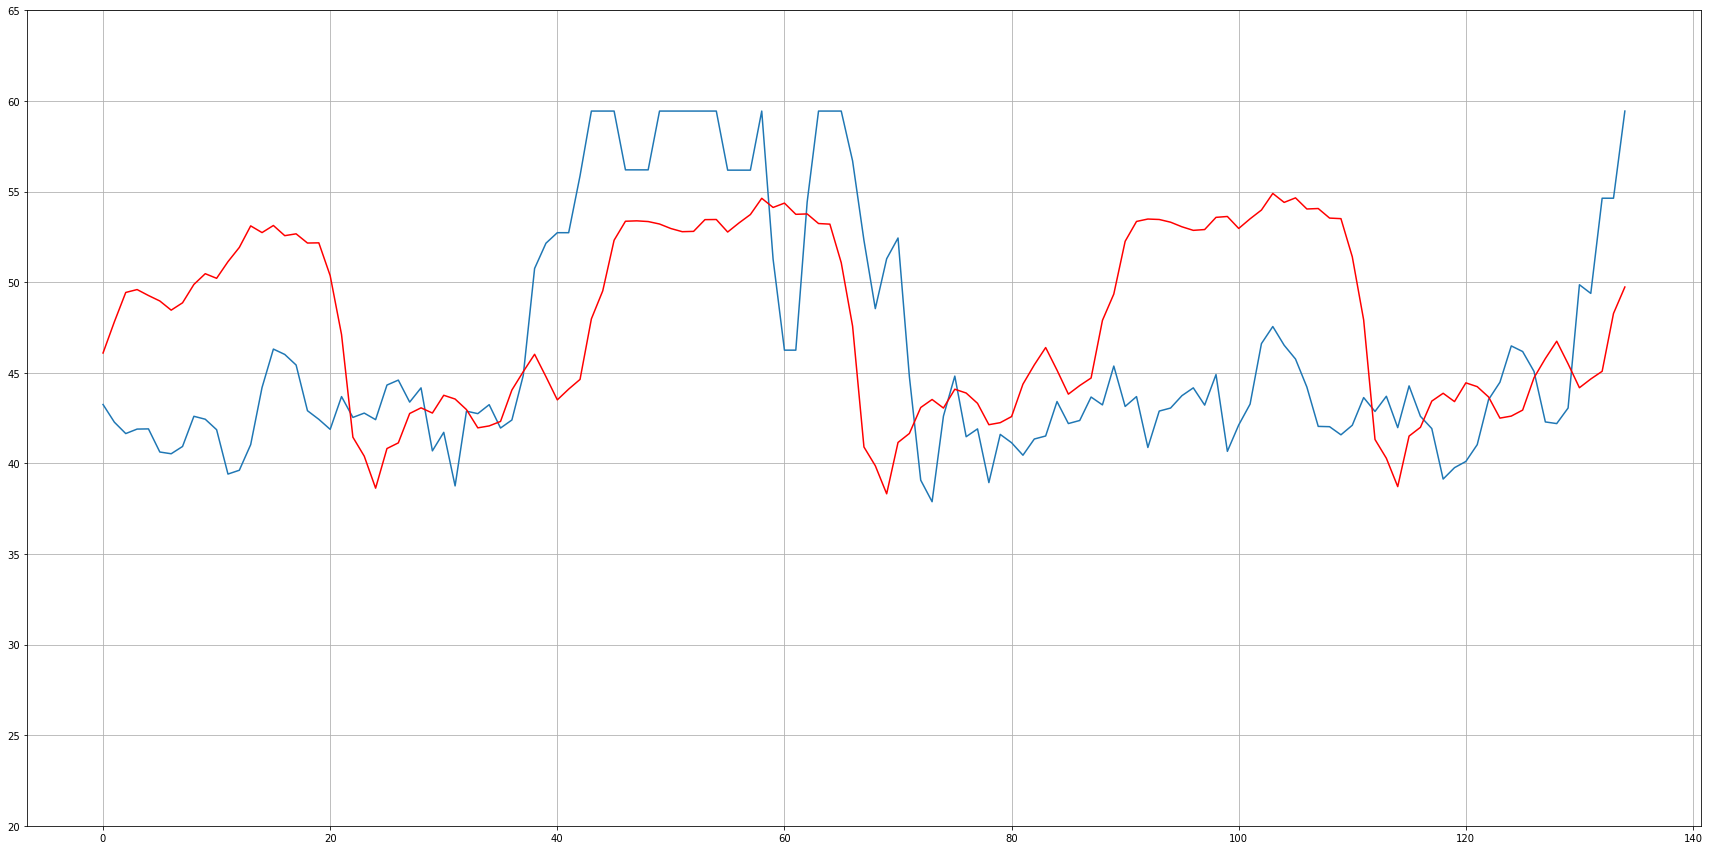

In [94]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(1, 1, 11) ,(1, 1, 1, periodicity/2), 0))#16T#remove optmization? 

parameters: (11, 0, 1)
seasonal parameters: (1, 1, 1, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  42.19704503436038
RMSE=  6.495925263914324
time taken:  45.68129825592041


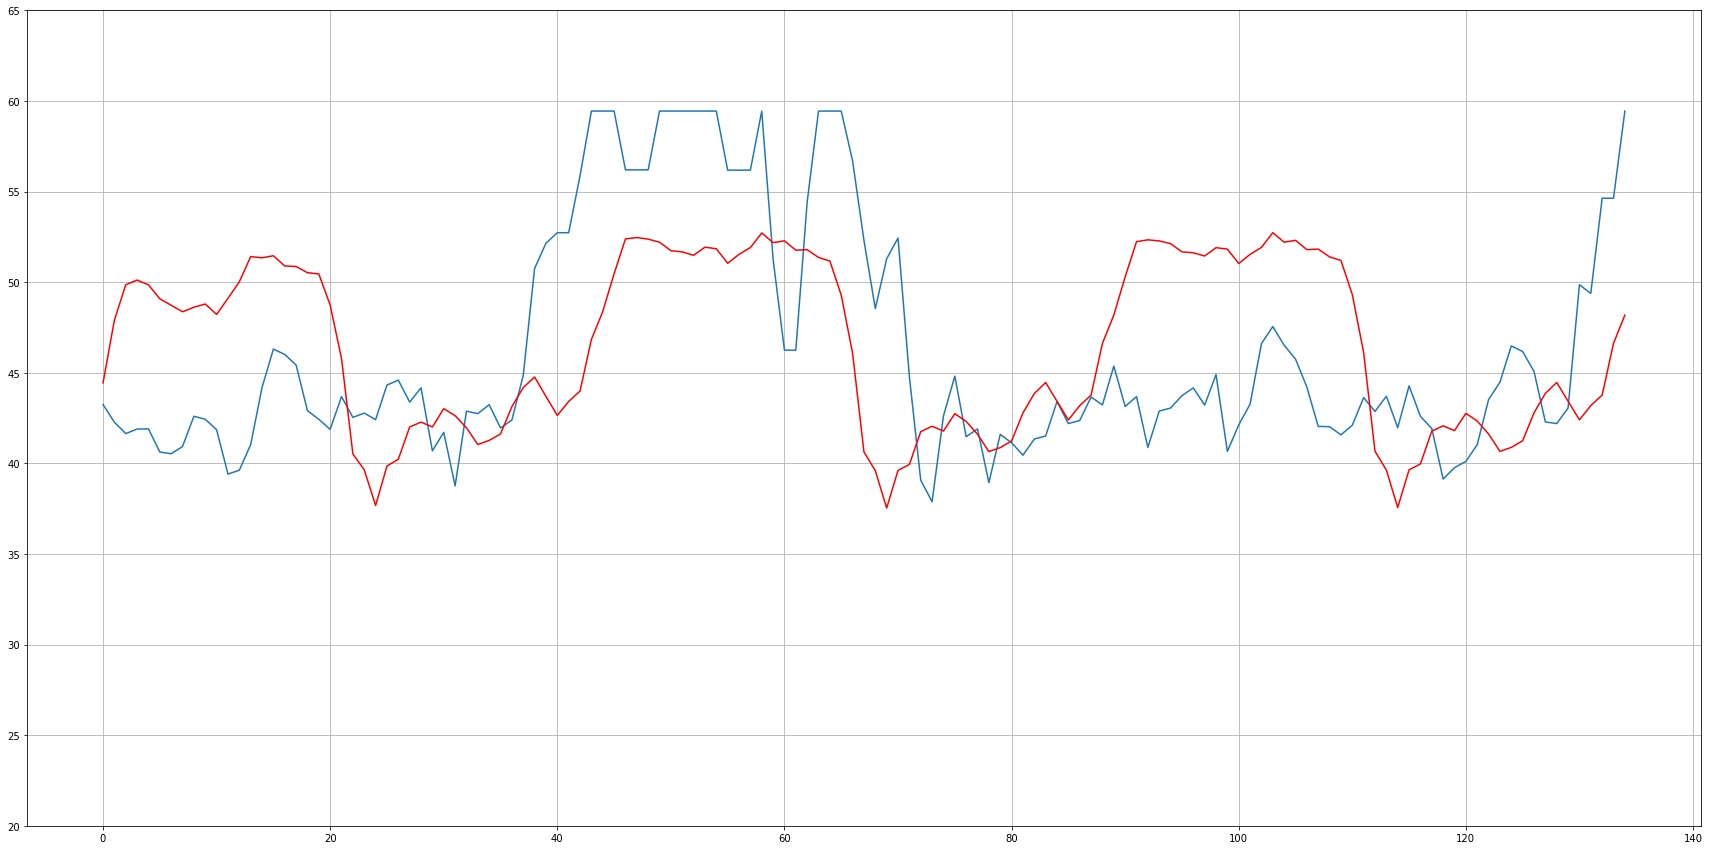

In [95]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(11, 0, 1) ,(1, 1, 1, periodicity/2), 0))#16T#remove optmization? 

parameters: (11, 0, 1)
seasonal parameters: (1, 1, 1, 45.0)
start training
start predicting
test:  135
predictions:  135
mean squared error=  42.19704503436038
RMSE=  6.495925263914324
time taken:  51.12837529182434


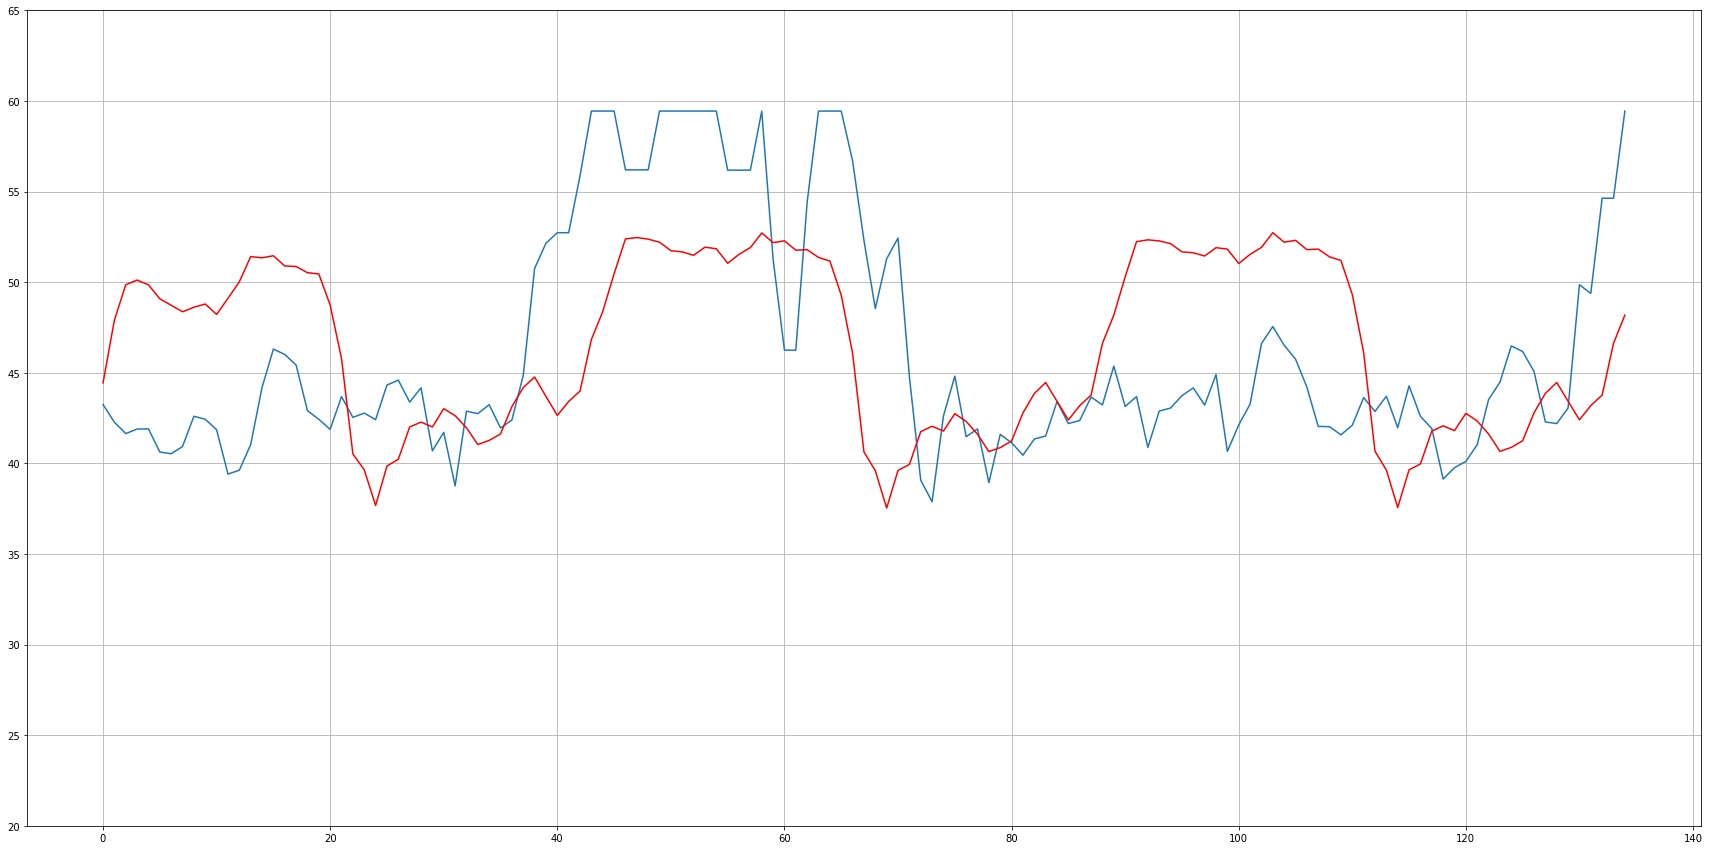

In [104]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(11, 0, 1) ,(1, 1, 1, periodicity/2), 0))#16T#remove optmization? 

parameters: (11, 0, 1)
seasonal parameters: (1, 1, 1, 90)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  135
predictions:  135
mean squared error=  16.511940254769424
RMSE=  4.063488680280705
time taken:  246.75261759757996


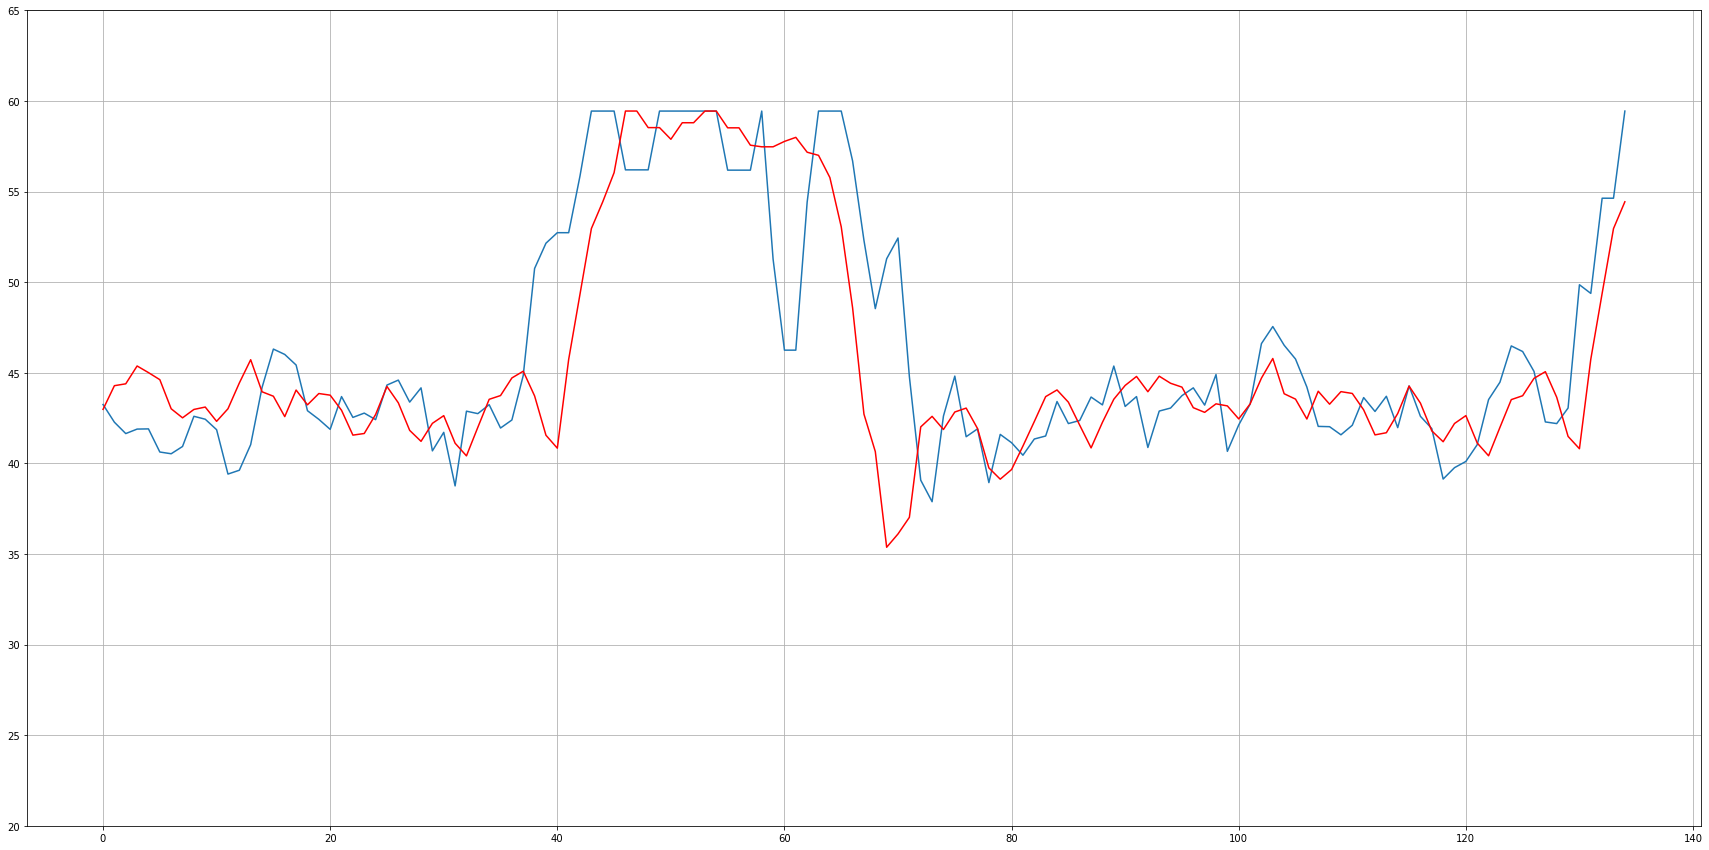

In [105]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(11, 0, 1) ,(1, 1, 1, periodicity), 0))#16T#remove optmization? 

In [ ]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(11, 0, 1) ,(11, 0, 1, periodicity), 0))#16T#remove optmization? 

parameters: (11, 0, 1)
seasonal parameters: (11, 0, 1, 90)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


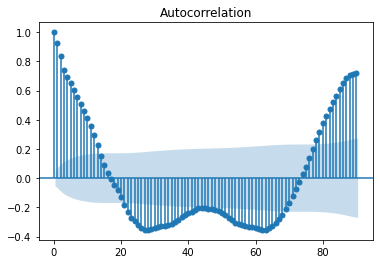

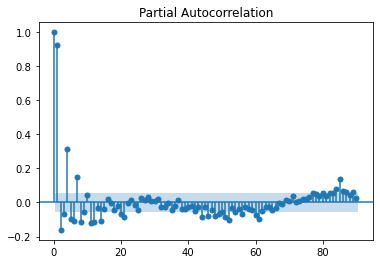

In [20]:
plot_acf(smoothed_df[0], lags =90)

plt.show()


plot_pacf(smoothed_df[0], lags =90)

plt.show()

<Figure size 2160x1080 with 0 Axes>

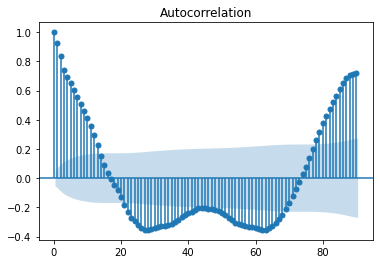

<Figure size 2160x1080 with 0 Axes>

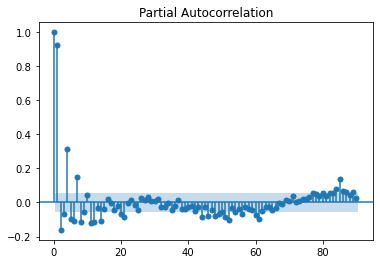

In [28]:
plot_acf_pacf(smoothed_df[0],90)

<Figure size 2160x1080 with 0 Axes>

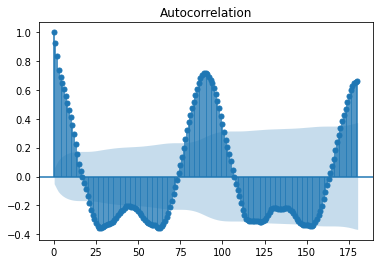

In [34]:
plot_acf_pacf(smoothed_df[0],180)

<Figure size 2160x1080 with 0 Axes>

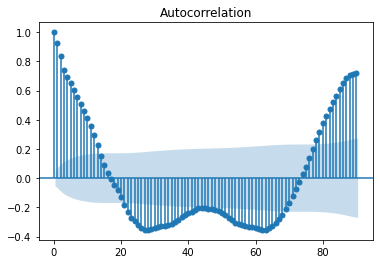

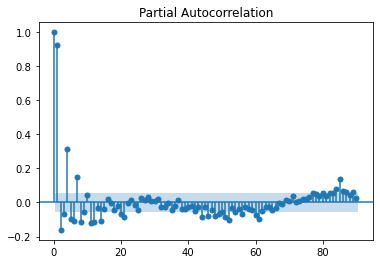

In [36]:
plot_acf_pacf(smoothed_df[0],90)

<Figure size 2160x1080 with 0 Axes>

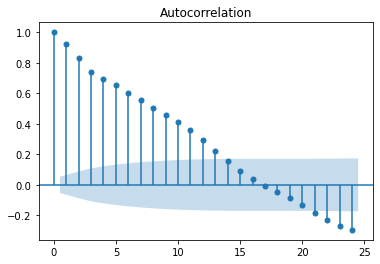

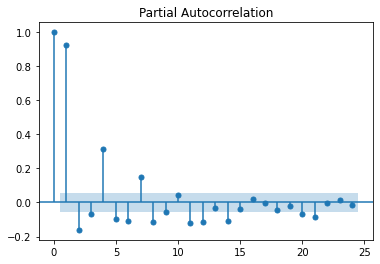

In [37]:
plot_acf_pacf(smoothed_df[0],24)

<Figure size 2160x1080 with 0 Axes>

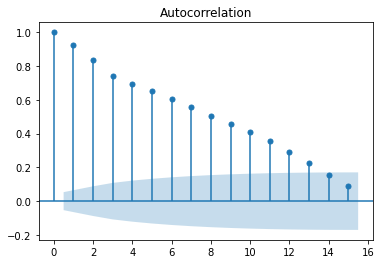

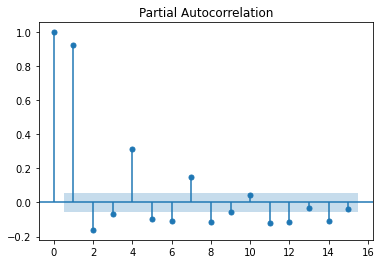

In [38]:
plot_acf_pacf(smoothed_df[0],15)

started = 2023-04-30 02:22:15.722616
parameters: (11, 0, 1)
seasonal parameters: (5, 0, 0, 90)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  135
predictions:  135
mean squared error=  36.2938063618388
RMSE=  6.024434111336832
time taken:  4077.981719017029


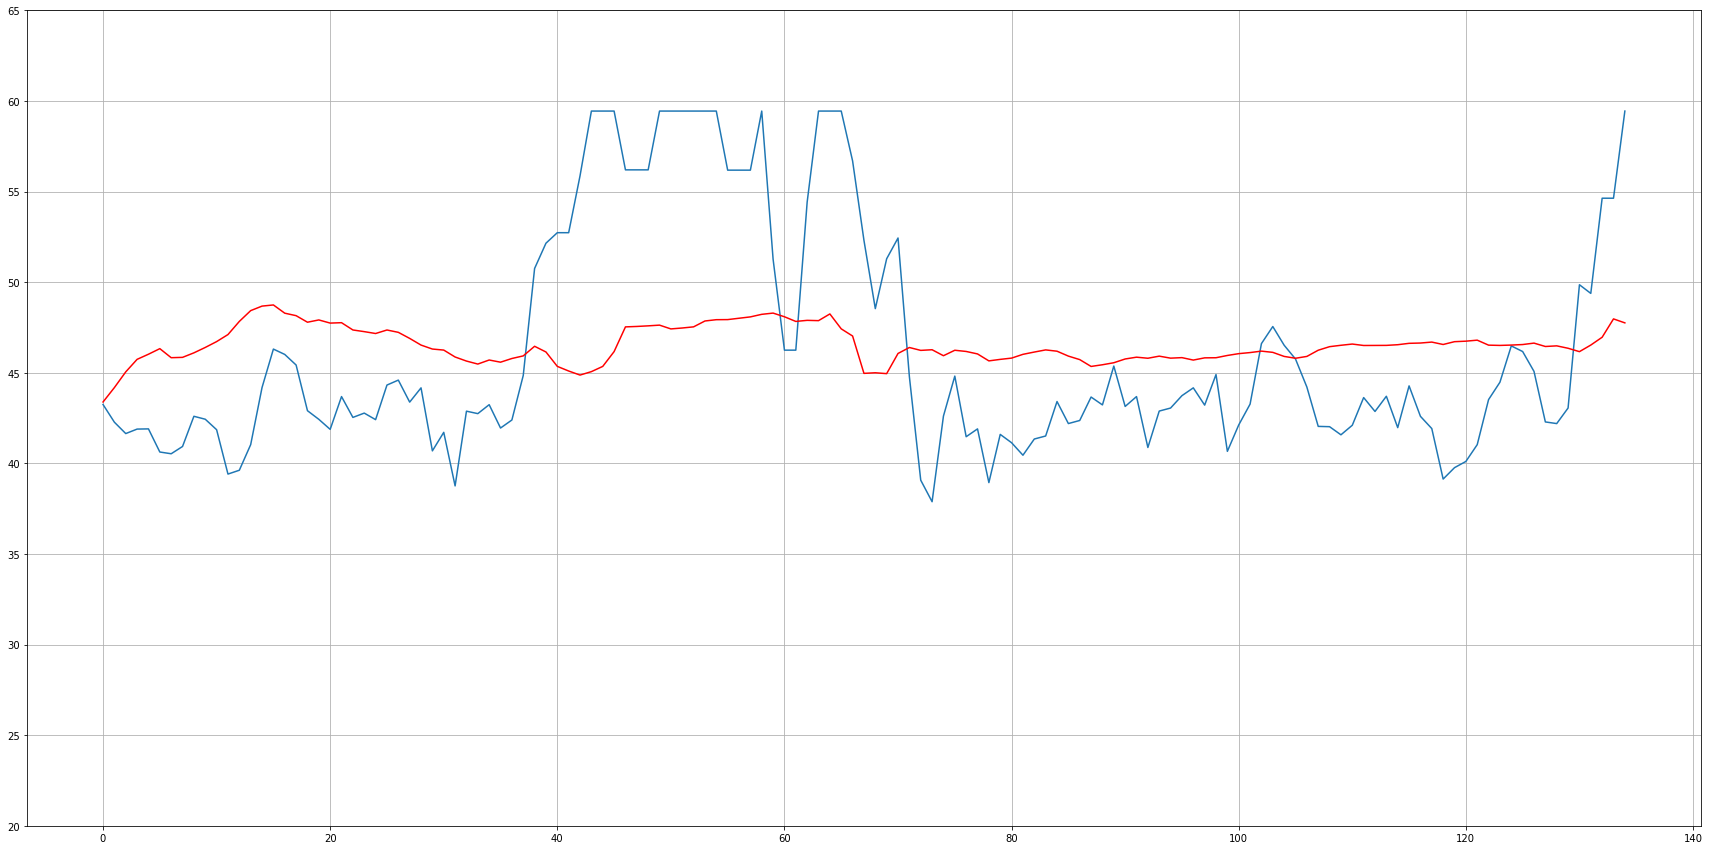

In [42]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(11, 0, 1) ,(5, 0, 0, periodicity), 0))#16T#remove optmization? 

started = 2023-04-30 03:34:20.111880
parameters: (11, 0, 4)
seasonal parameters: (1, 0, 1, 90)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  135
predictions:  135
mean squared error=  30.455348608623037
RMSE=  5.518636480927426
time taken:  65.27618145942688


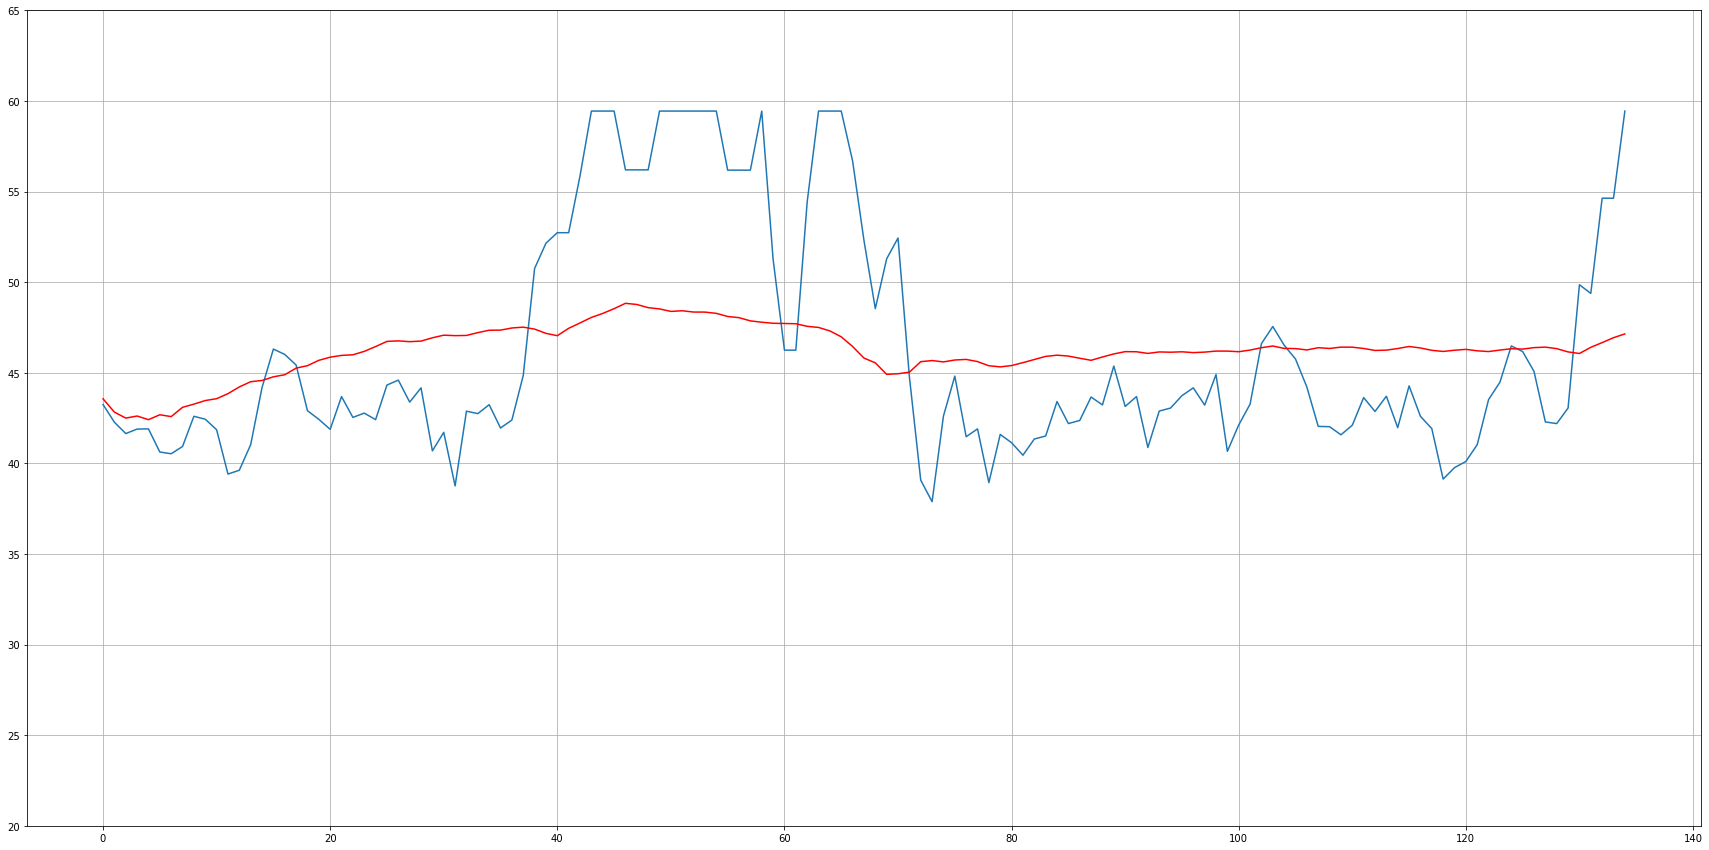

In [44]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(11, 0, 4) ,(1, 0, 1, periodicity), 0))#16T

started = 2023-04-30 03:36:19.254958
parameters: (11, 0, 1)
seasonal parameters: (1, 0, 1, 90)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  135
predictions:  135
mean squared error=  37.05365754258388
RMSE=  6.087171555212148
time taken:  51.59432768821716


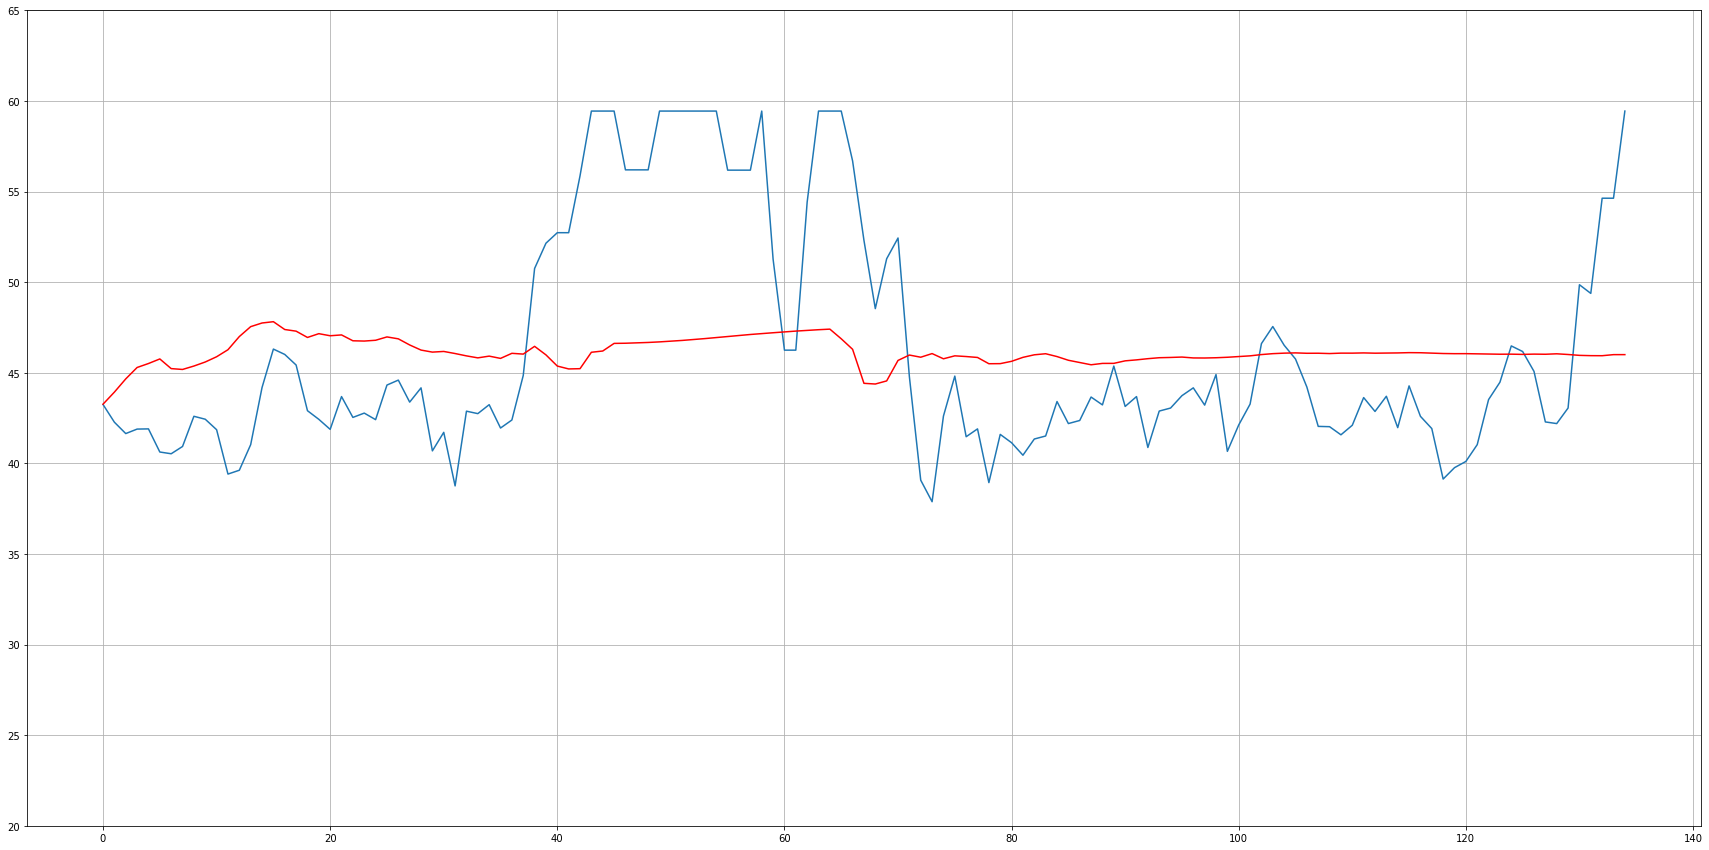

In [45]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(11, 0, 1) ,(1, 0, 1, periodicity), 0))#16T

started = 2023-04-30 03:37:21.565040
parameters: (11, 0, 4)
seasonal parameters: (1, 1, 1, 90)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  135
predictions:  135
mean squared error=  16.54508761635524
RMSE=  4.06756531801952
time taken:  248.30923914909363


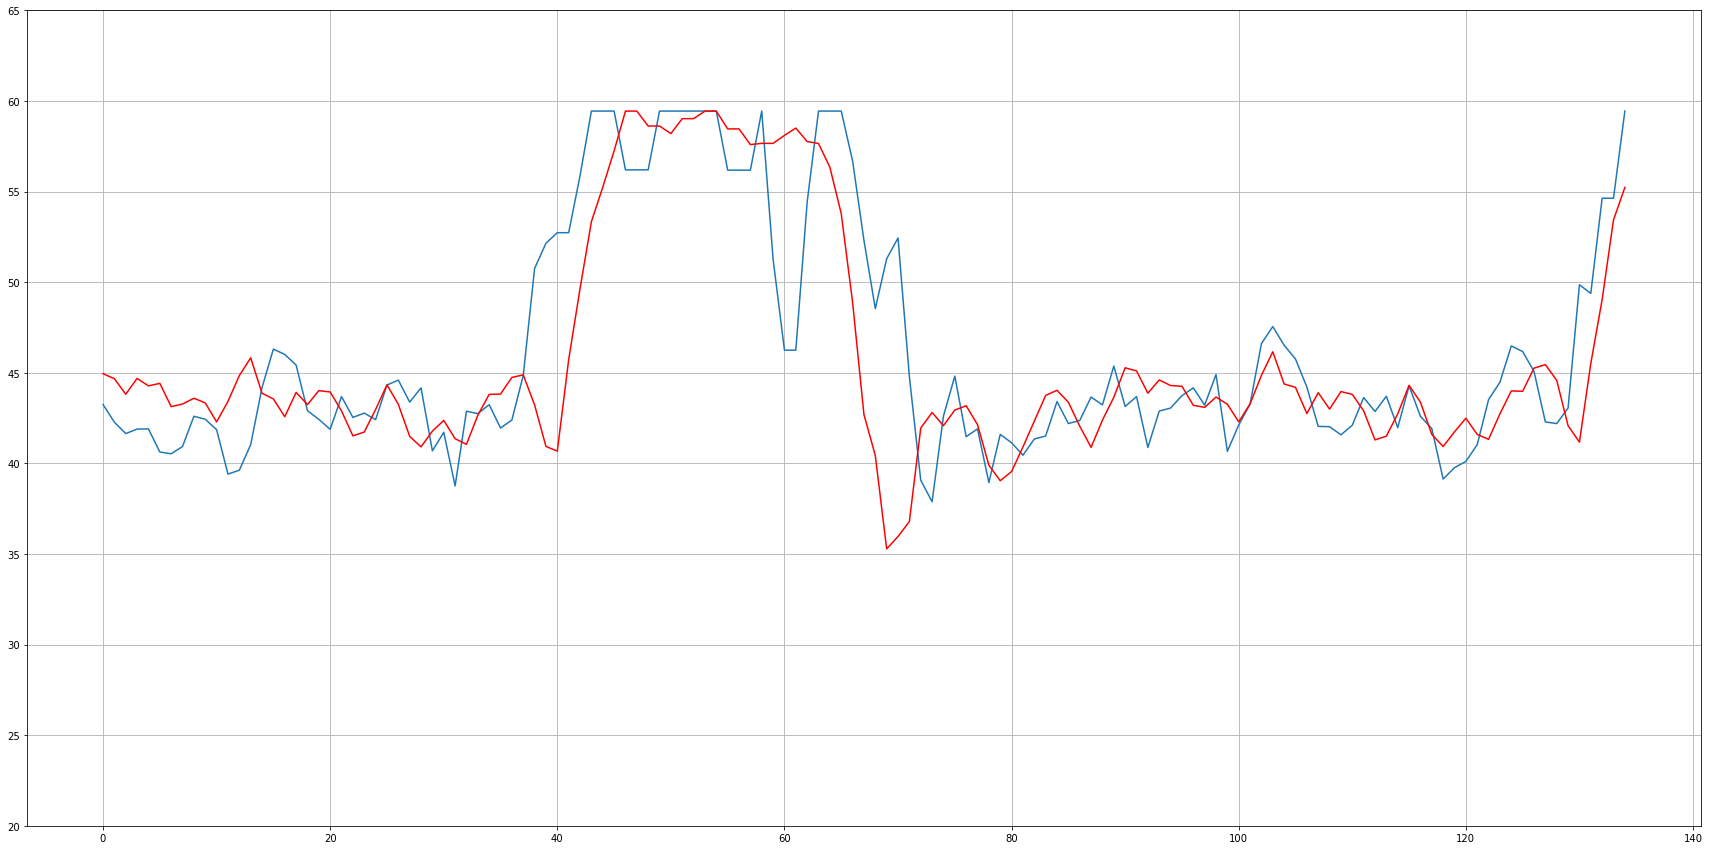

In [46]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(11, 0, 4) ,(1, 1, 1, periodicity), 0))#16T

started = 2023-04-30 03:41:30.116999
parameters: (11, 0, 4)
seasonal parameters: (1, 1, 0, 90)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  135
predictions:  135
mean squared error=  18.0926414136212
RMSE=  4.253544570545982
time taken:  247.45264172554016


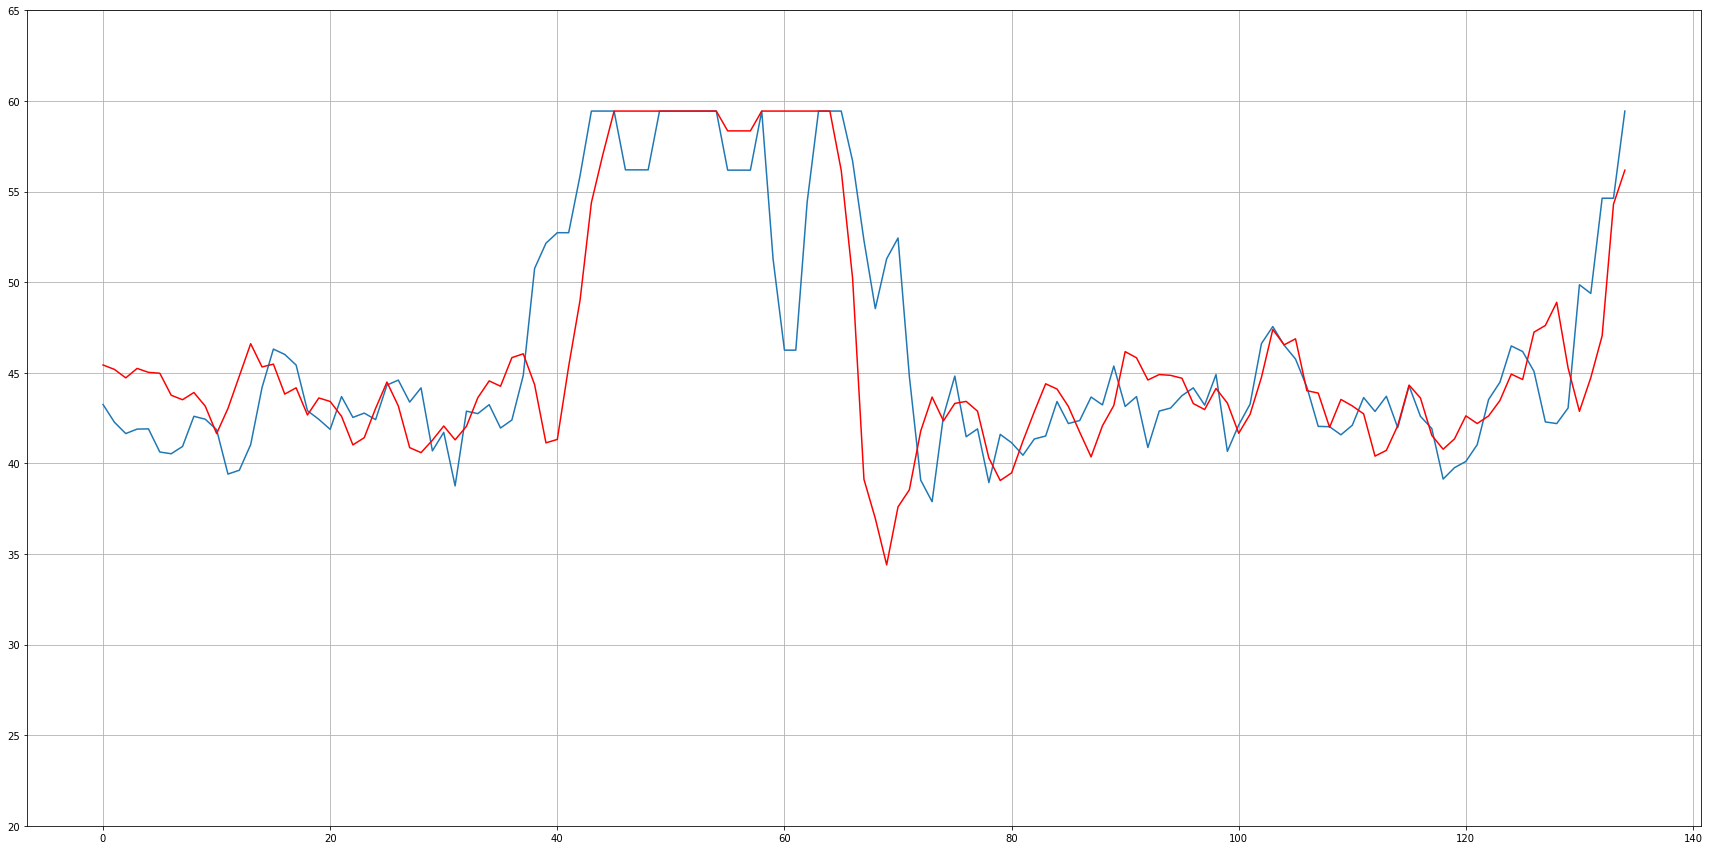

In [47]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(11, 0, 4) ,(1, 1, 0, periodicity), 0))#16T

started = 2023-04-30 03:45:37.855614
parameters: (11, 0, 1)
seasonal parameters: (1, 0, 1, 90)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  135
predictions:  135
mean squared error=  37.05365754258388
RMSE=  6.087171555212148
time taken:  56.74288368225098


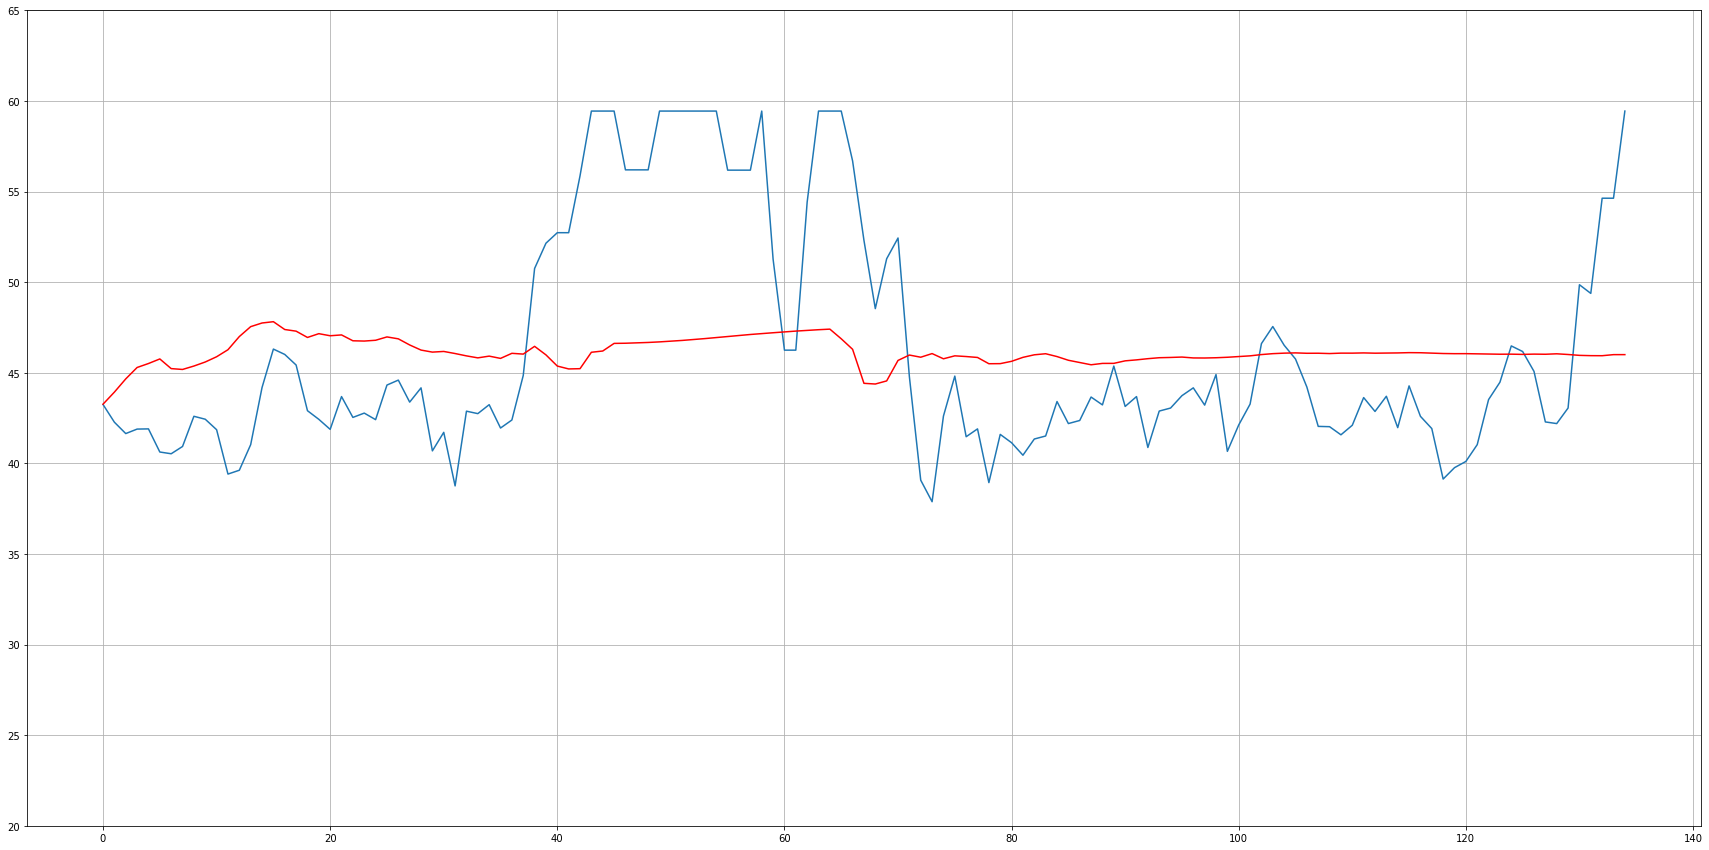

In [48]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(11, 0, 1) ,(1, 0, 1, periodicity), 0))#16T

started = 2023-04-30 03:46:34.889500
parameters: (11, 0, 1)
seasonal parameters: (1, 1, 0, 90)
start training
start predicting
test:  135
predictions:  135
mean squared error=  18.002049463590986
RMSE=  4.242882211845031
time taken:  131.7193636894226


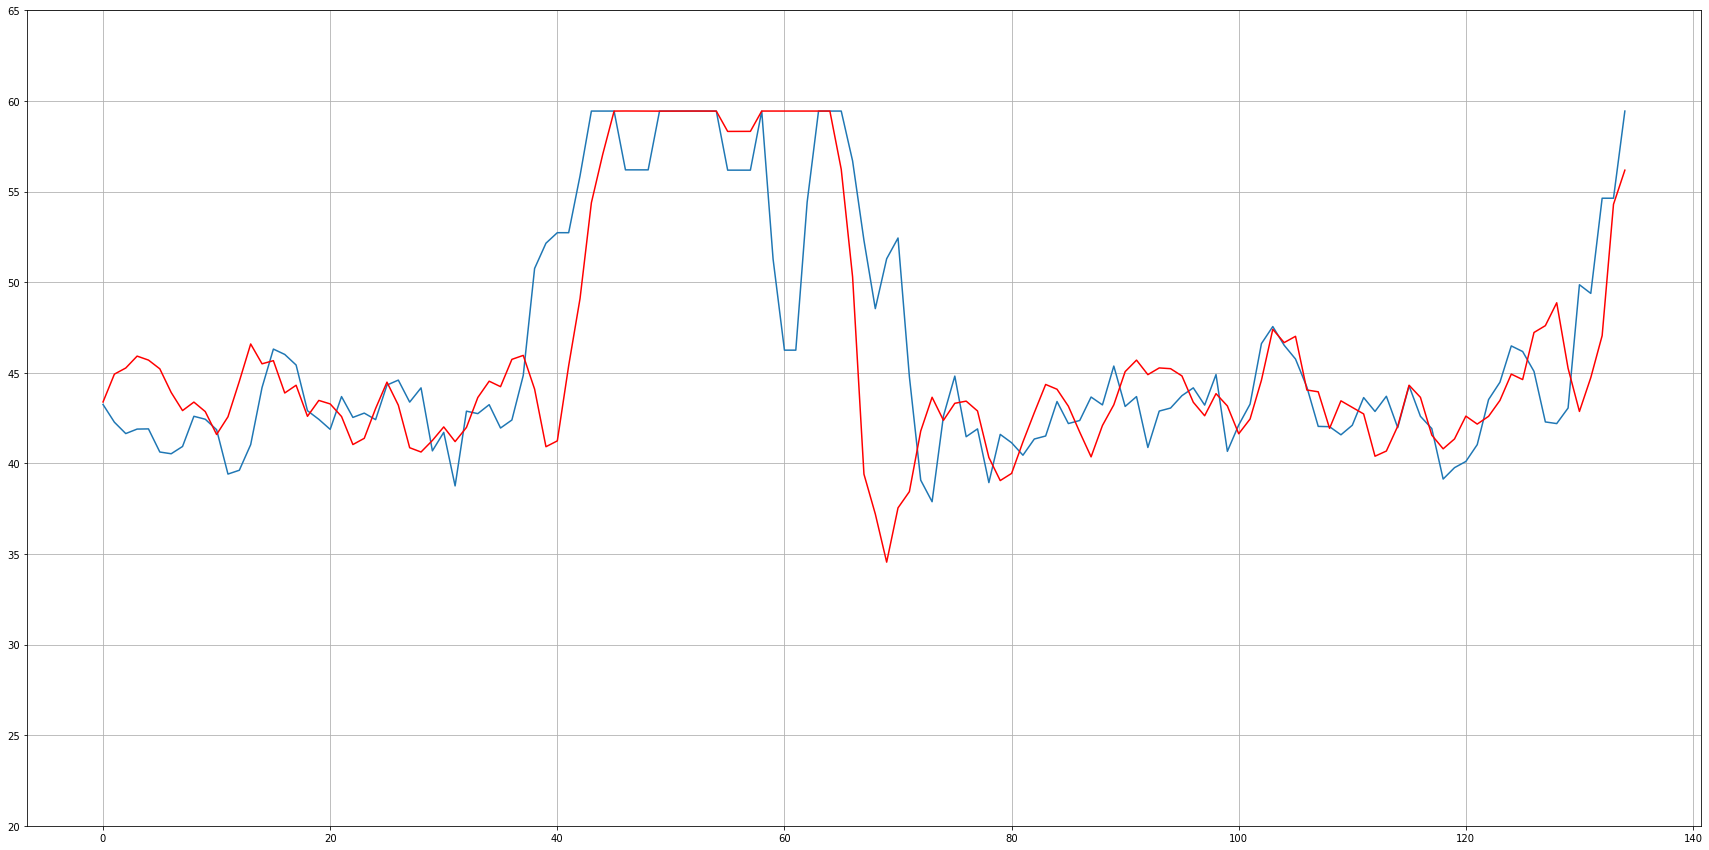

In [49]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(11, 0, 1) ,(1, 1, 0, periodicity), 0))#16T

started = 2023-04-30 03:50:58.375408
parameters: (11, 0, 1)
seasonal parameters: (1, 0, 0, 90)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  135
predictions:  135
mean squared error=  37.672997769201
RMSE=  6.1378333122691595
time taken:  0:01:03.479442


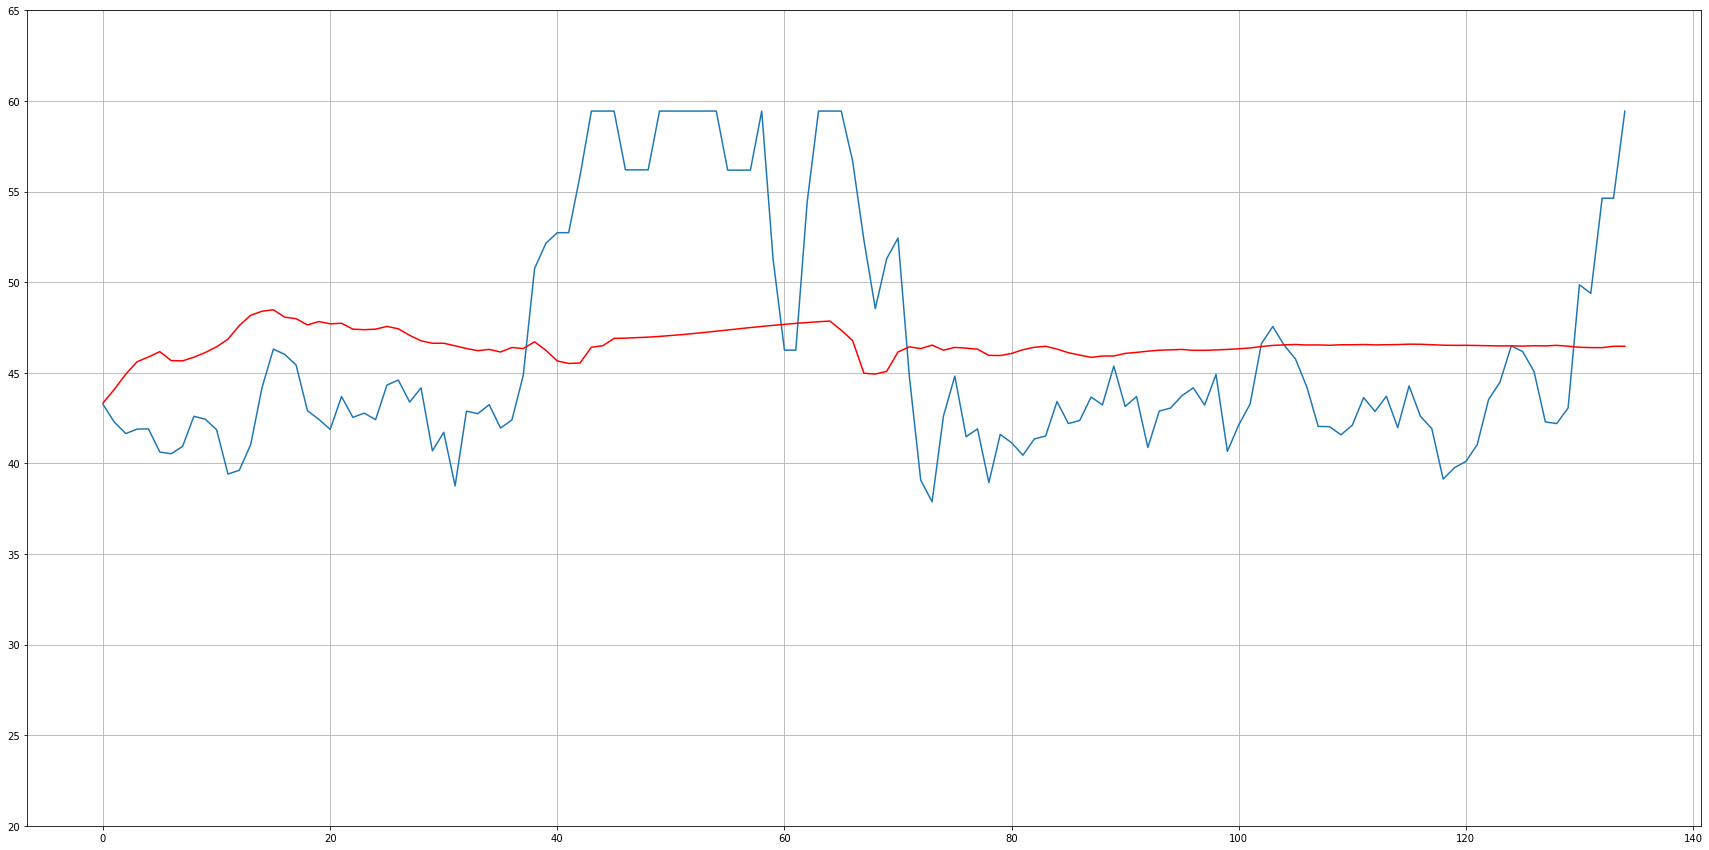

In [57]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(11, 0, 1) ,(1, 0, 0, periodicity), 0))#16T

started = 2023-04-30 03:53:47.640881
parameters: (11, 0, 4)
seasonal parameters: (1, 1, 1, 90)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  135
predictions:  135
mean squared error=  16.54508761635524
RMSE=  4.06756531801952
time taken:  0:05:26.573274


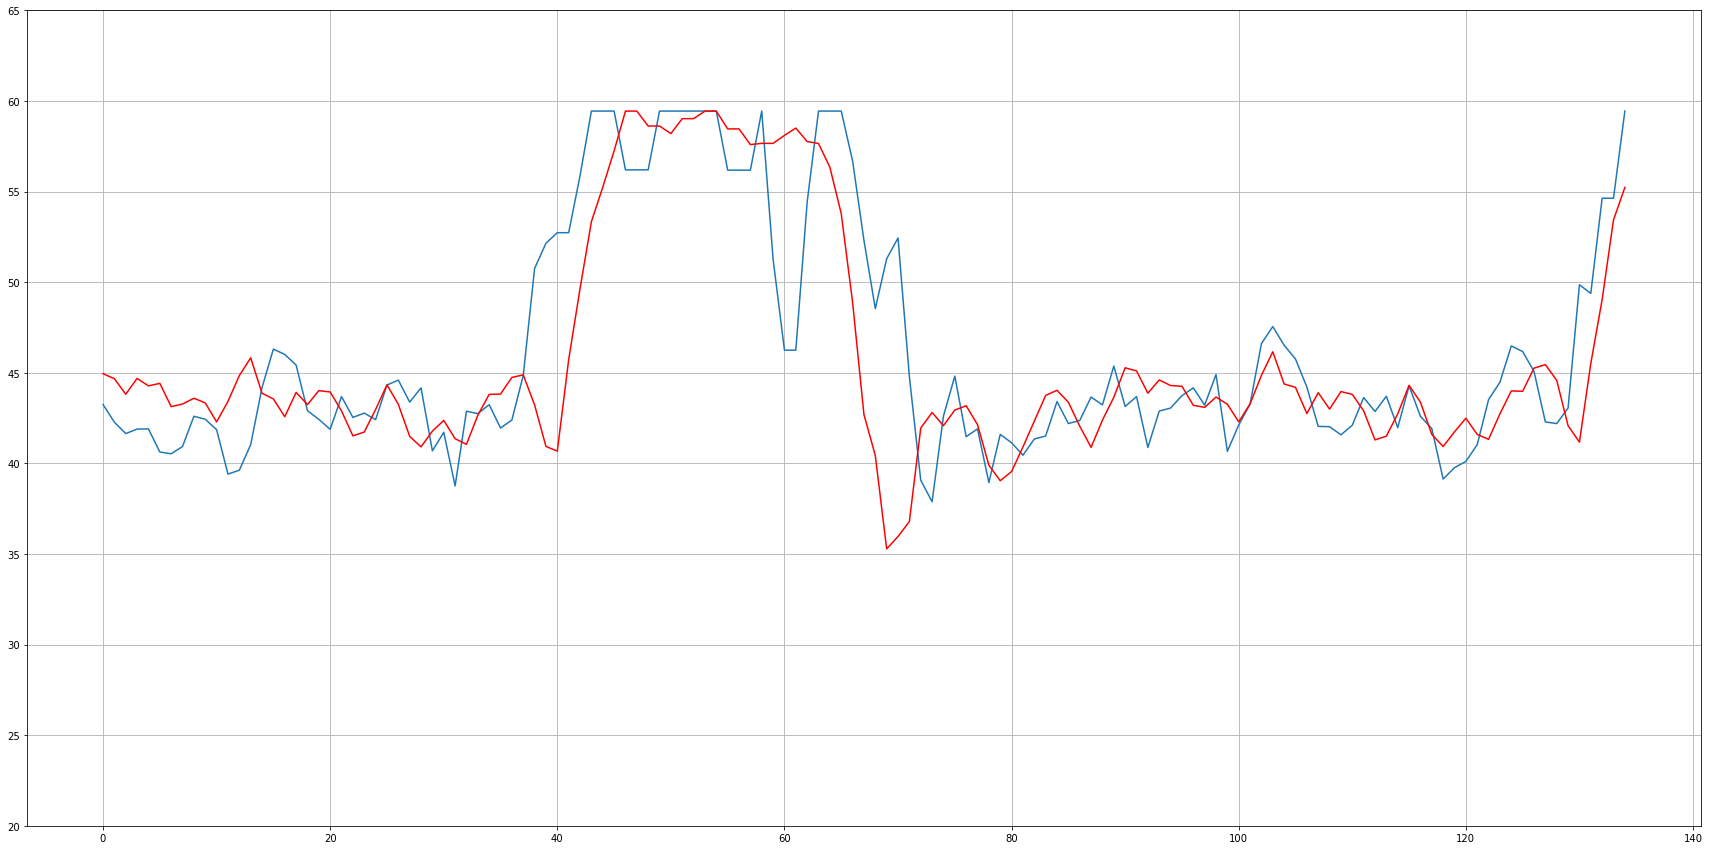

In [58]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(11, 0, 4) ,(1, 1, 1, periodicity), 0))#16T

started = 2023-04-30 03:59:45.397176
parameters: (11, 0, 1)
seasonal parameters: (1, 1, 2, 90)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


start predicting
test:  135
predictions:  135
mean squared error=  16.511033131793656
RMSE=  4.063377060007311
time taken:  0:08:59.016096


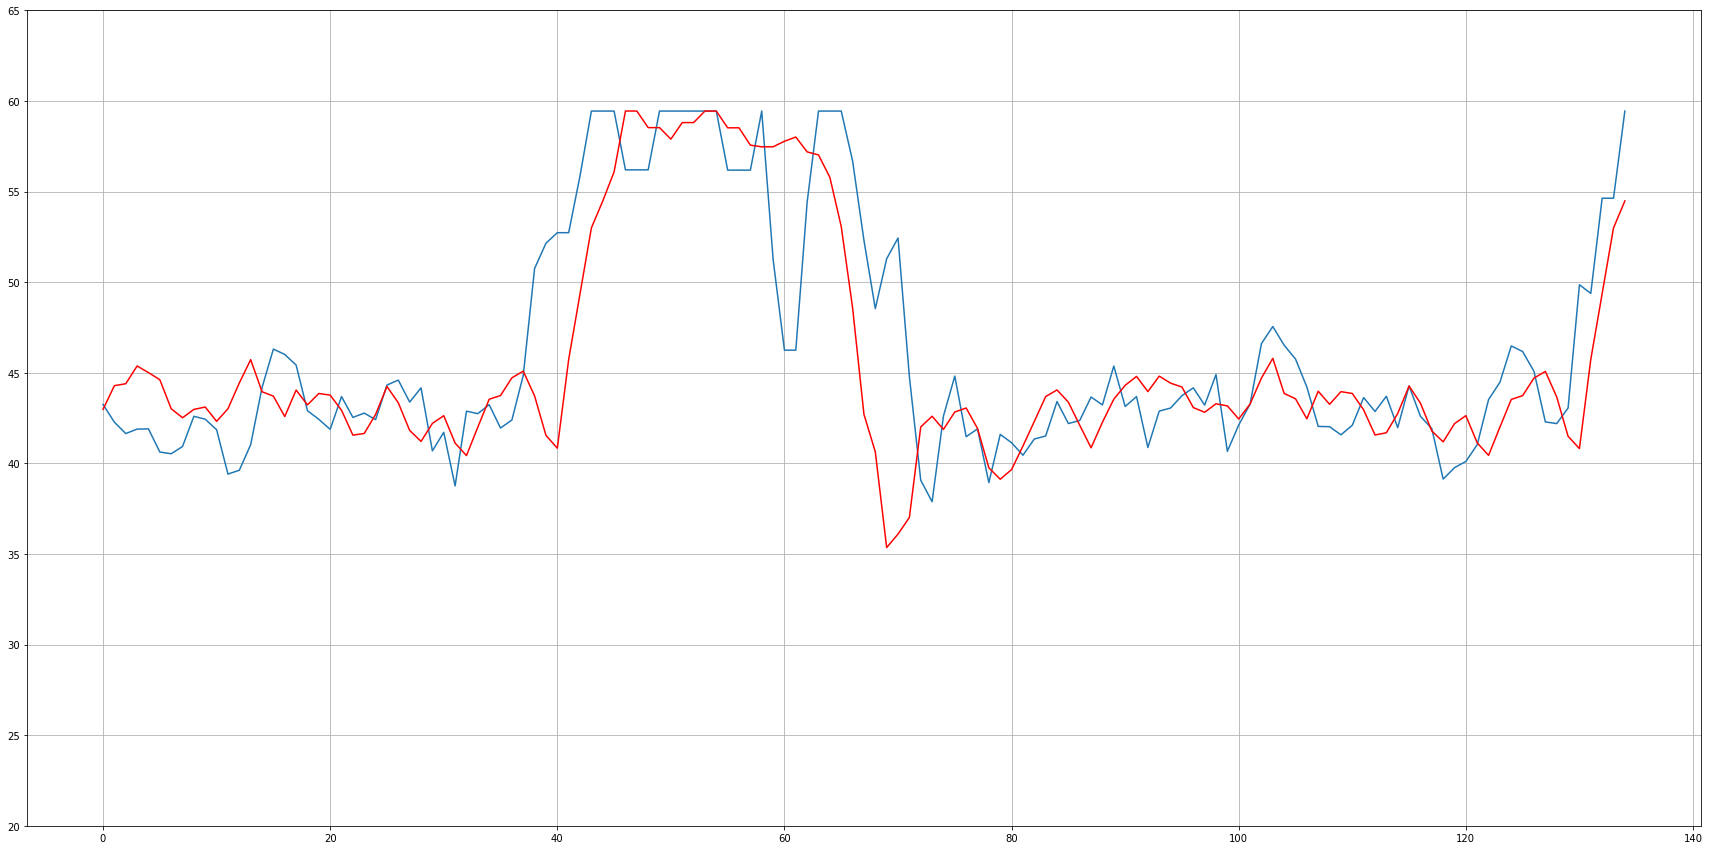

In [59]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(11, 0, 1) ,(1, 1, 2, periodicity), 0))#16T

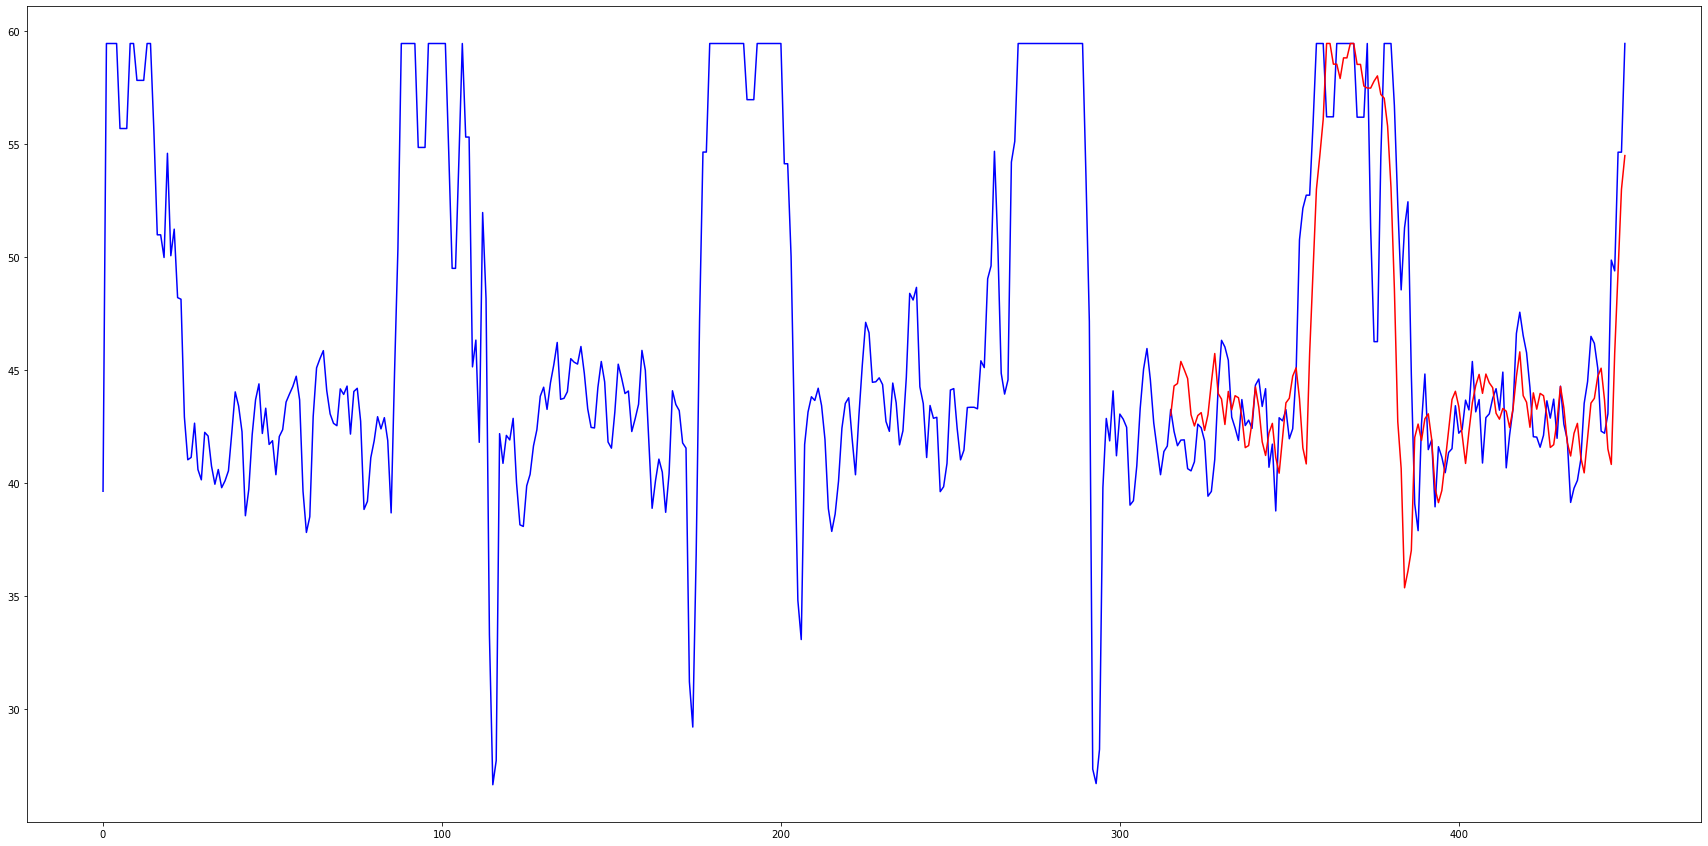

In [85]:
plot_data_predictions(new_data,PTR[-1][0])

started = 2023-04-30 16:37:28.275629
parameters: (11, 0, 1)
seasonal parameters: (1, 1, 1, 90)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


start predicting
test:  81
predictions:  81
mean squared error=  30.9233875924806
RMSE=  5.560880109522287
time taken:  0:01:38.317132


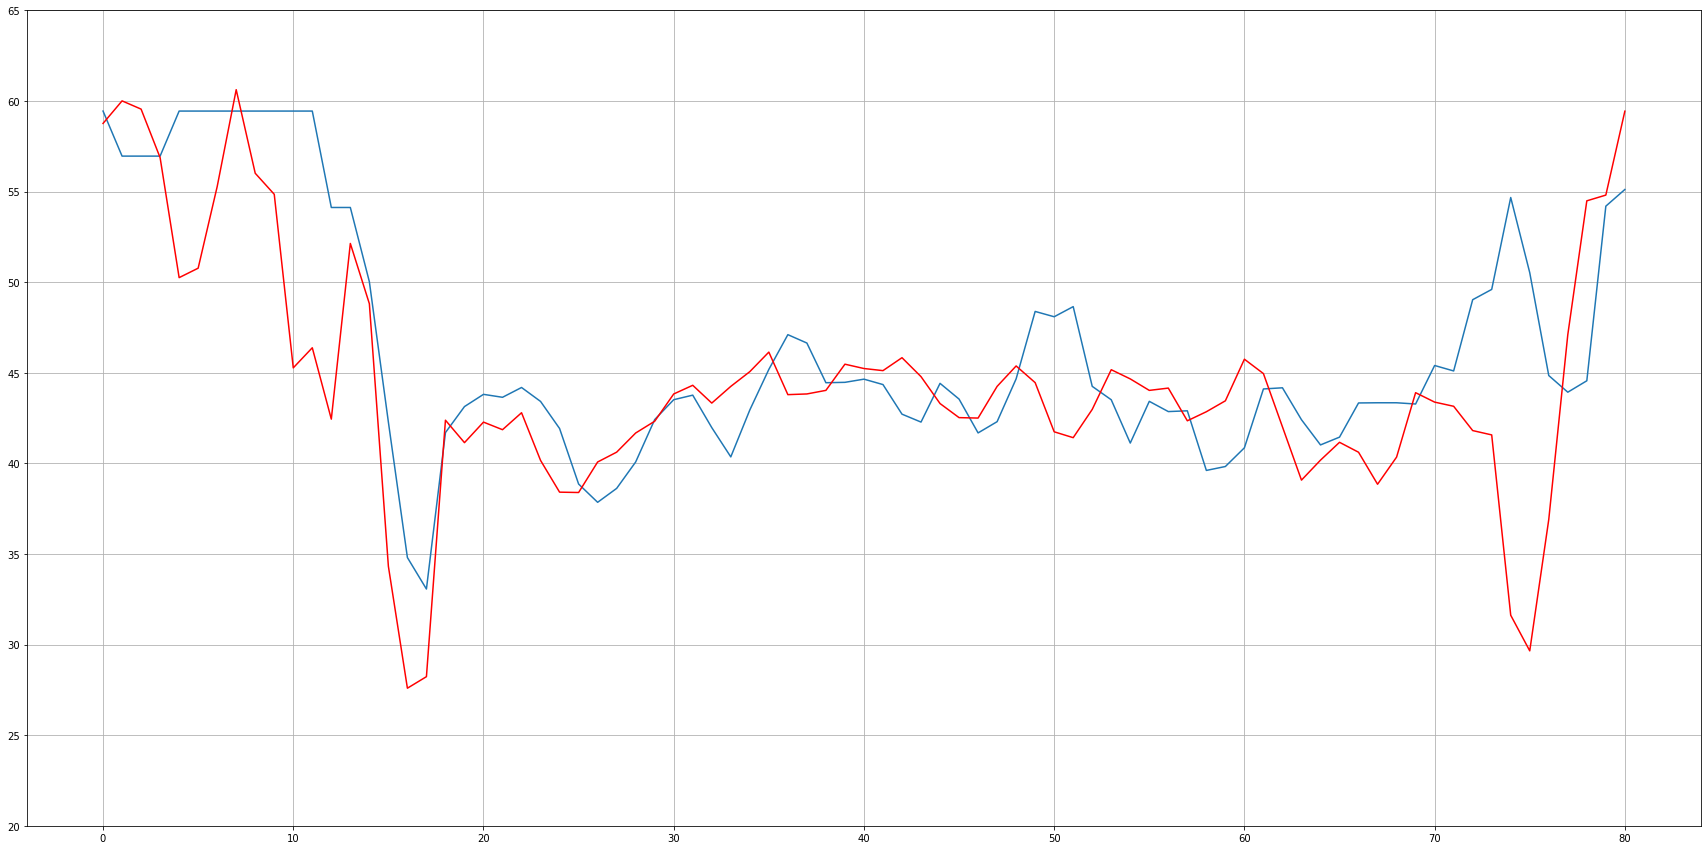

In [22]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(11, 0, 1) ,(1, 1, 1, periodicity), 0))#16T

started = 2023-04-30 16:39:06.936023
parameters: (11, 0, 1)
seasonal parameters: (1, 1, 1, 90)
start training
start predicting
test:  406
predictions:  406
mean squared error=  14.431158404203693
RMSE=  3.7988364539953143
time taken:  0:07:51.839141


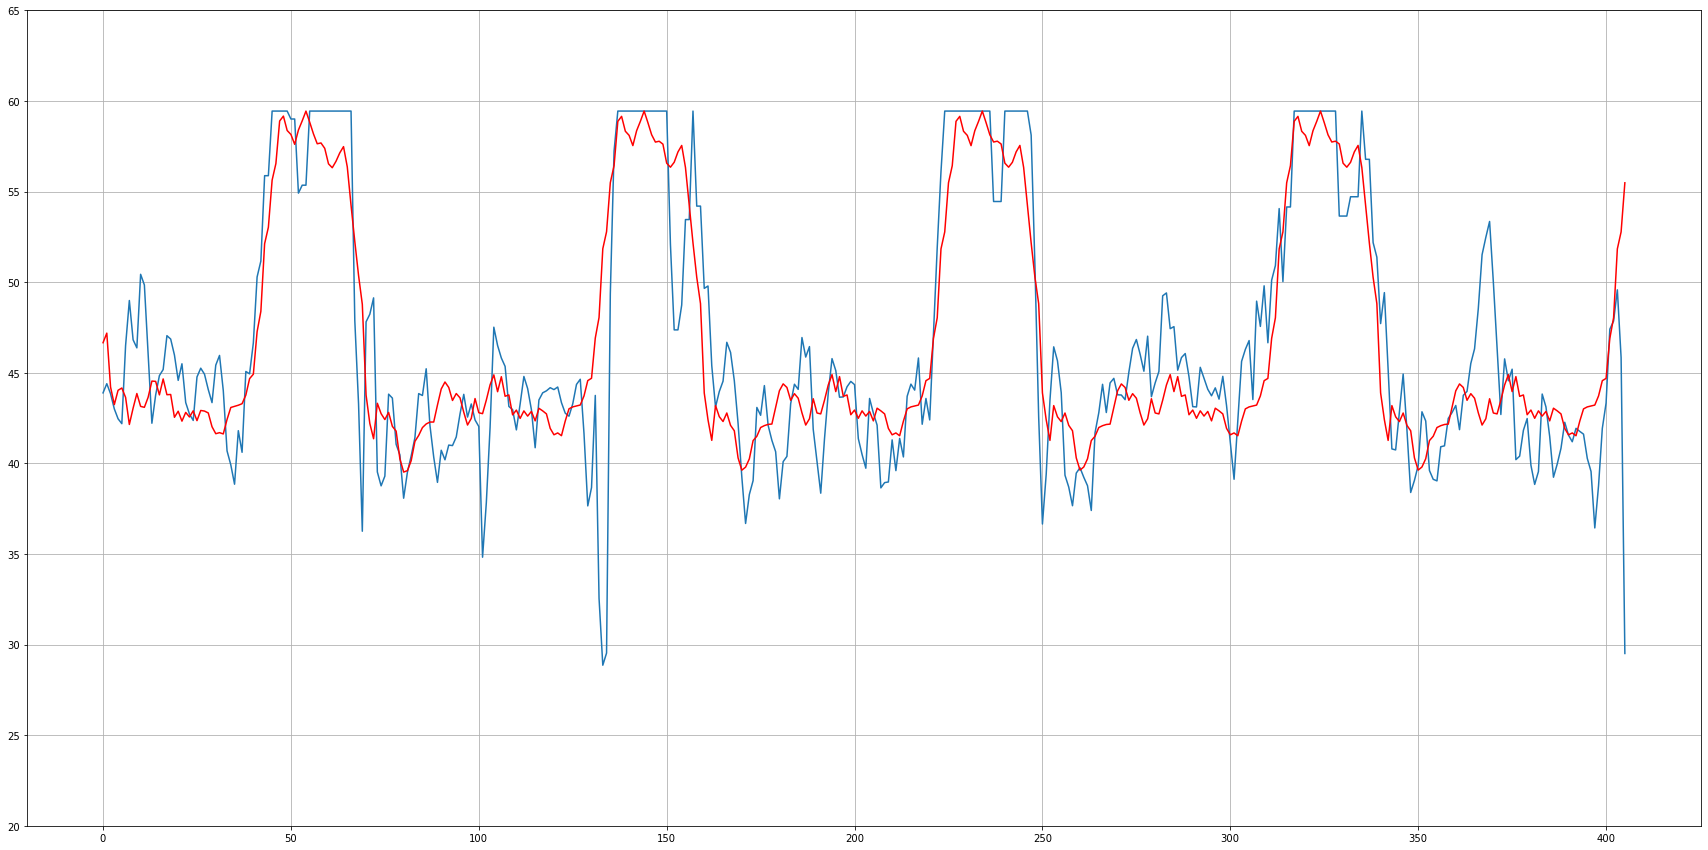

In [23]:
PTR.append(graph_predictions_sarima_append_dontfit(smoothed_df[0],0.7,3,(11, 0, 1) ,(1, 1, 1, periodicity), 0))#16T#remove optmization? 

started = 2023-04-30 16:46:59.134455
parameters: (11, 0, 1)
seasonal parameters: (1, 1, 1, 90)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  135
predictions:  135
mean squared error=  16.511940254769424
RMSE=  4.063488680280705
time taken:  0:03:57.983427


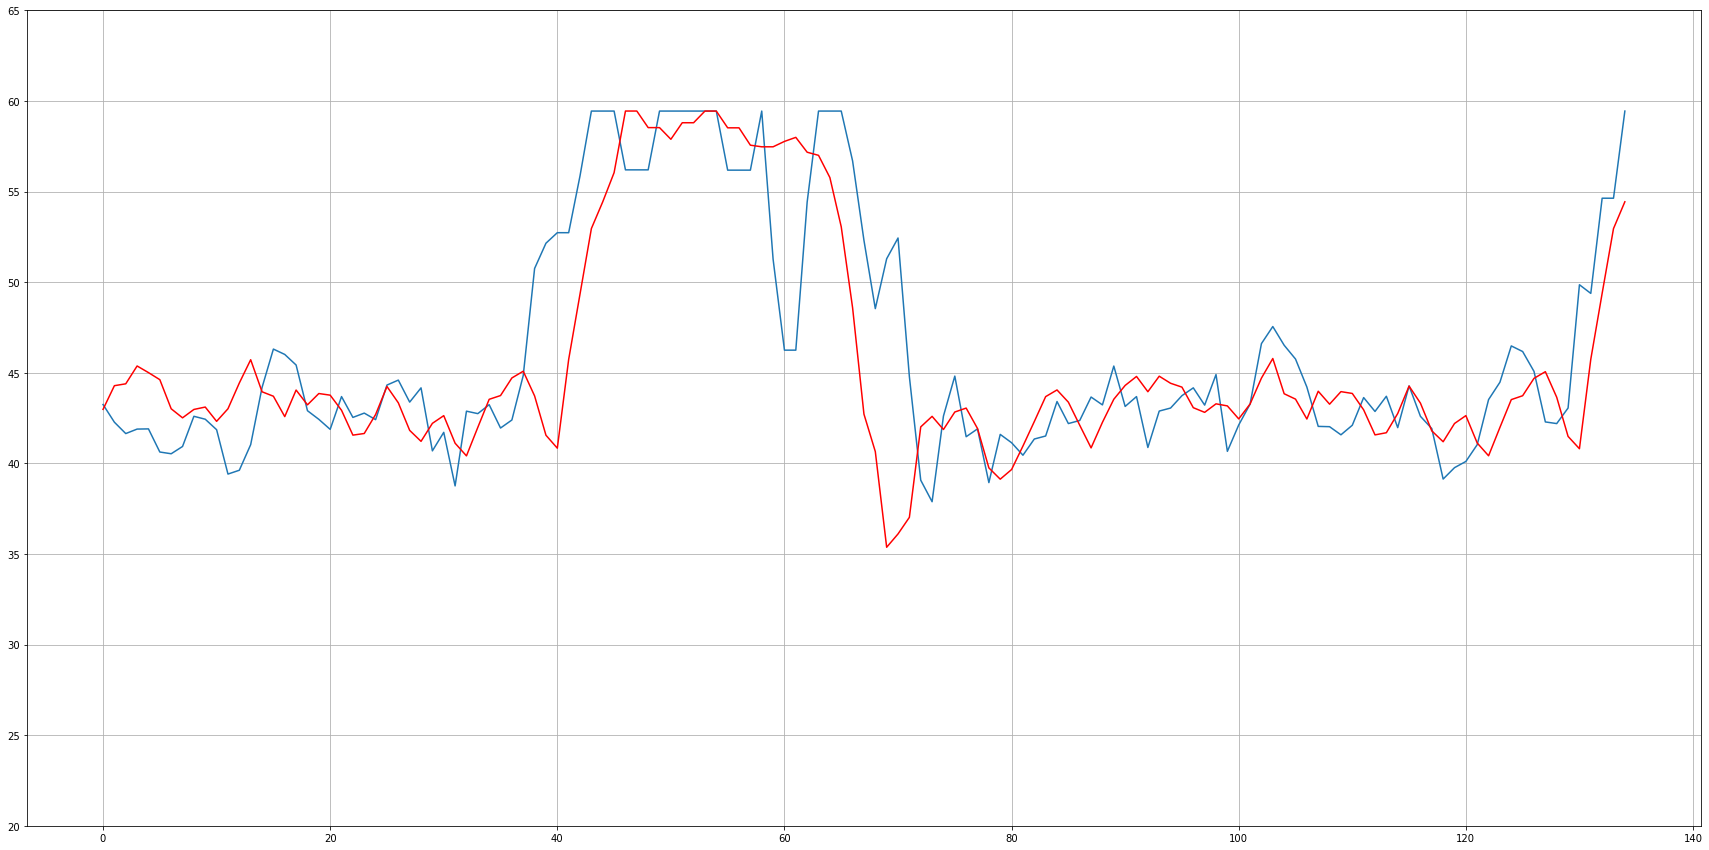

In [25]:
PTR.append(graph_predictions_sarima_append_dontfit(new_data,0.7,3,(11, 0, 1) ,(1, 1, 1, periodicity), 0))#16T

started = 2023-04-30 16:54:03.045446
parameters: (11, 0, 1)
seasonal parameters: (1, 1, 1, 90)
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  406
predictions:  406
mean squared error=  12.178465235187216
RMSE=  3.4897657851476533
time taken:  0:11:09.832925


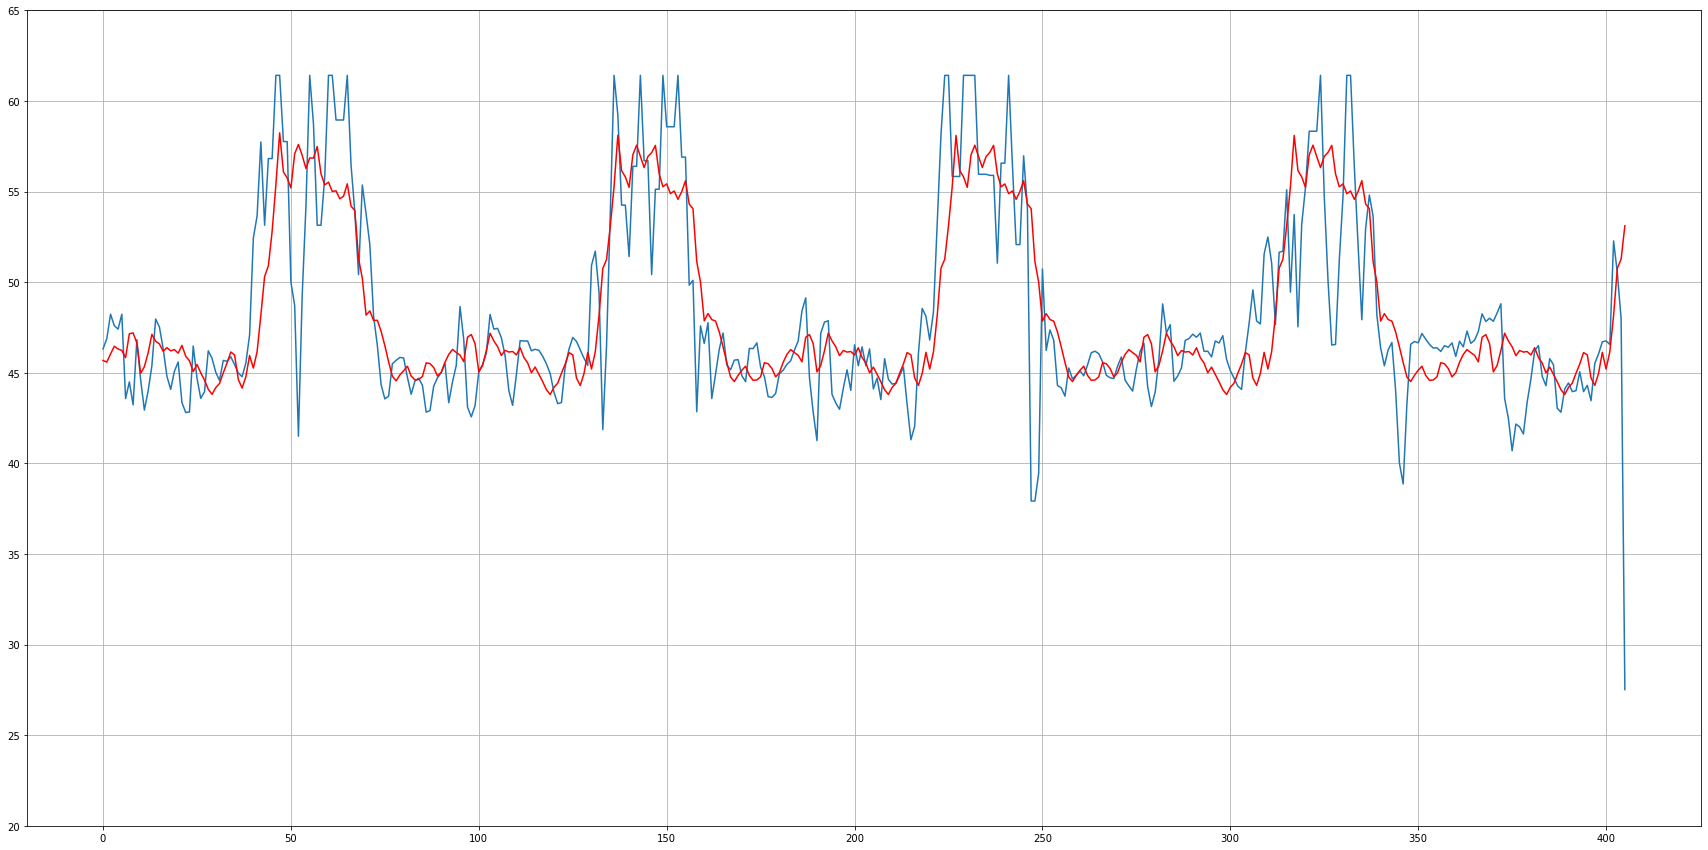

In [26]:
PTR.append(graph_predictions_sarima_append_dontfit(smoothed_df[1100],0.7,3,(11, 0, 1) ,(1, 1, 1, periodicity), 0))#16T#remove optmization? 

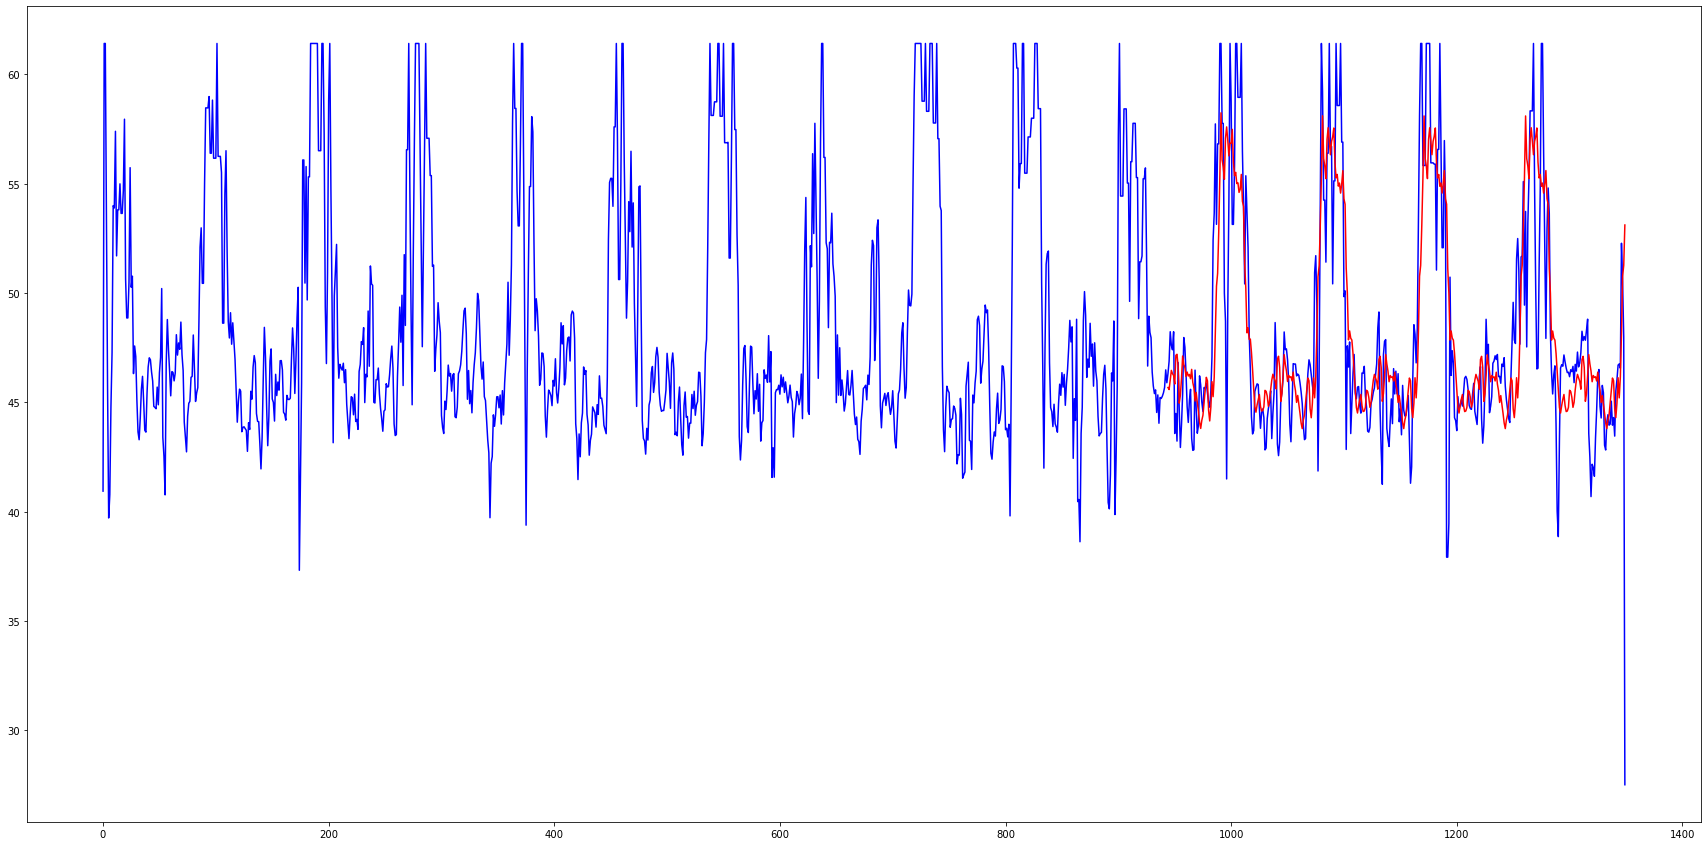

In [29]:
plot_data_predictions(smoothed_df[1100],PTR[-1][0])

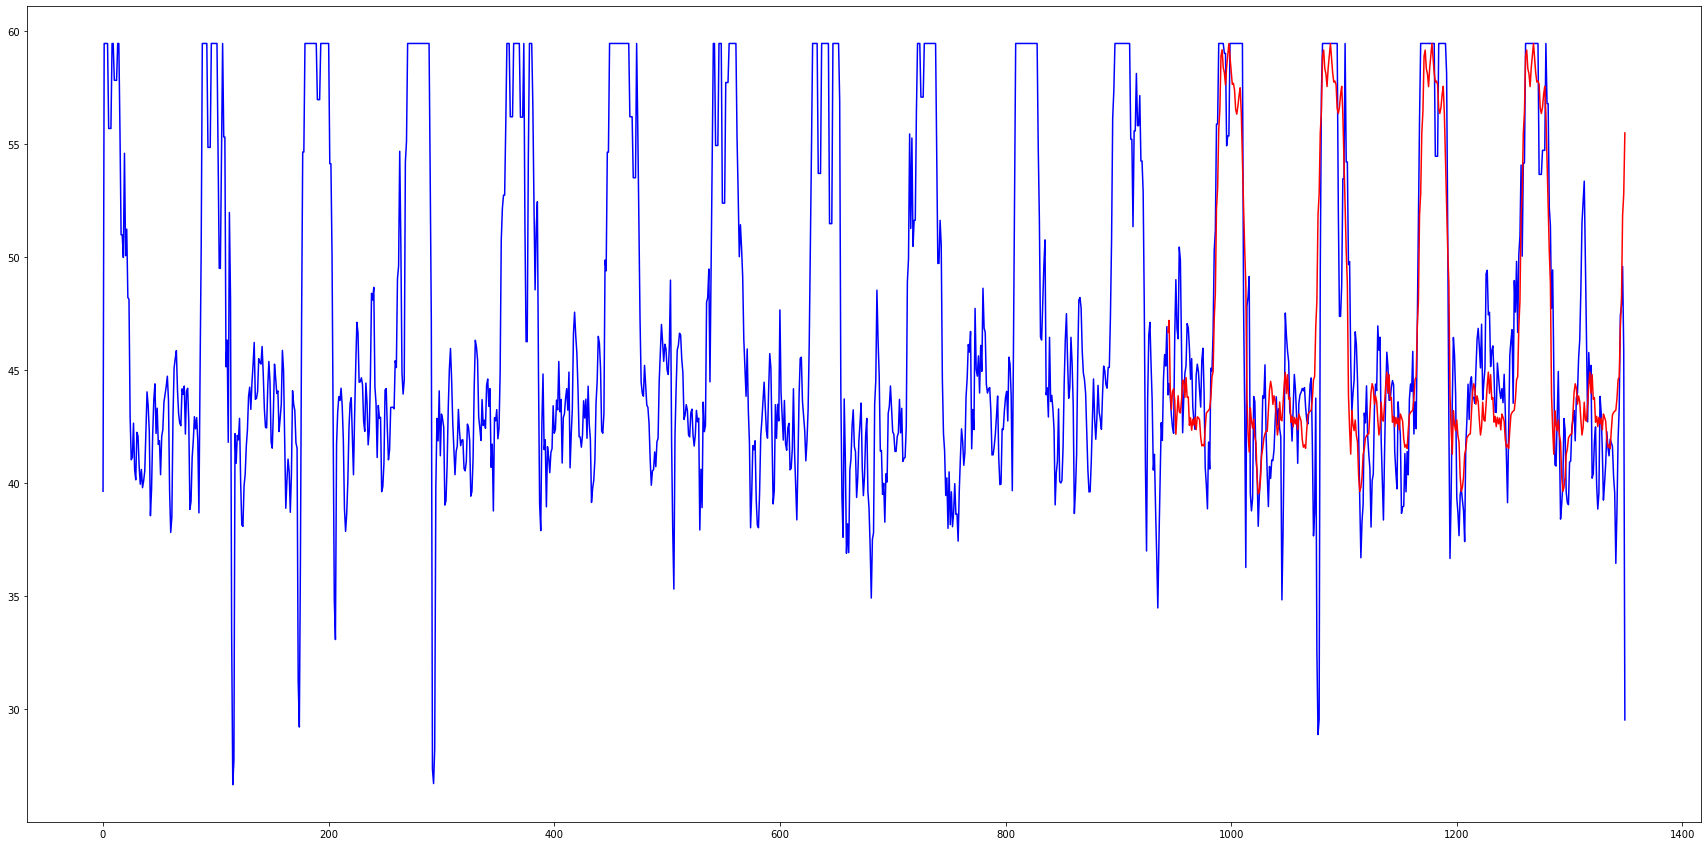

In [31]:
plot_data_predictions(smoothed_df[0],PTR[-3][0])

[0.0, 0.26666666666666666, 0.5333333333333333, 0.8, 1.0666666666666667, 1.3333333333333333, 1.6, 1.8666666666666667, 2.1333333333333333, 2.4, 2.6666666666666665, 2.933333333333333, 3.2, 3.466666666666667, 3.7333333333333334, 4.0, 4.266666666666667, 4.533333333333333, 4.8, 5.066666666666666, 5.333333333333333, 5.6, 5.866666666666666, 6.133333333333334, 6.4, 6.666666666666667, 6.933333333333334, 7.2, 7.466666666666667, 7.733333333333333, 8.0, 8.266666666666667, 8.533333333333333, 8.8, 9.066666666666666, 9.333333333333334, 9.6, 9.866666666666667, 10.133333333333333, 10.4, 10.666666666666666, 10.933333333333334, 11.2, 11.466666666666667, 11.733333333333333, 12.0, 12.266666666666667, 12.533333333333333, 12.8, 13.066666666666666, 13.333333333333334, 13.6, 13.866666666666667, 14.133333333333333, 14.4, 14.666666666666666, 14.933333333333334, 15.2, 15.466666666666667, 15.733333333333333, 16.0, 16.266666666666666, 16.533333333333335, 16.8, 17.066666666666666, 17.333333333333332, 17.6, 17.8666666

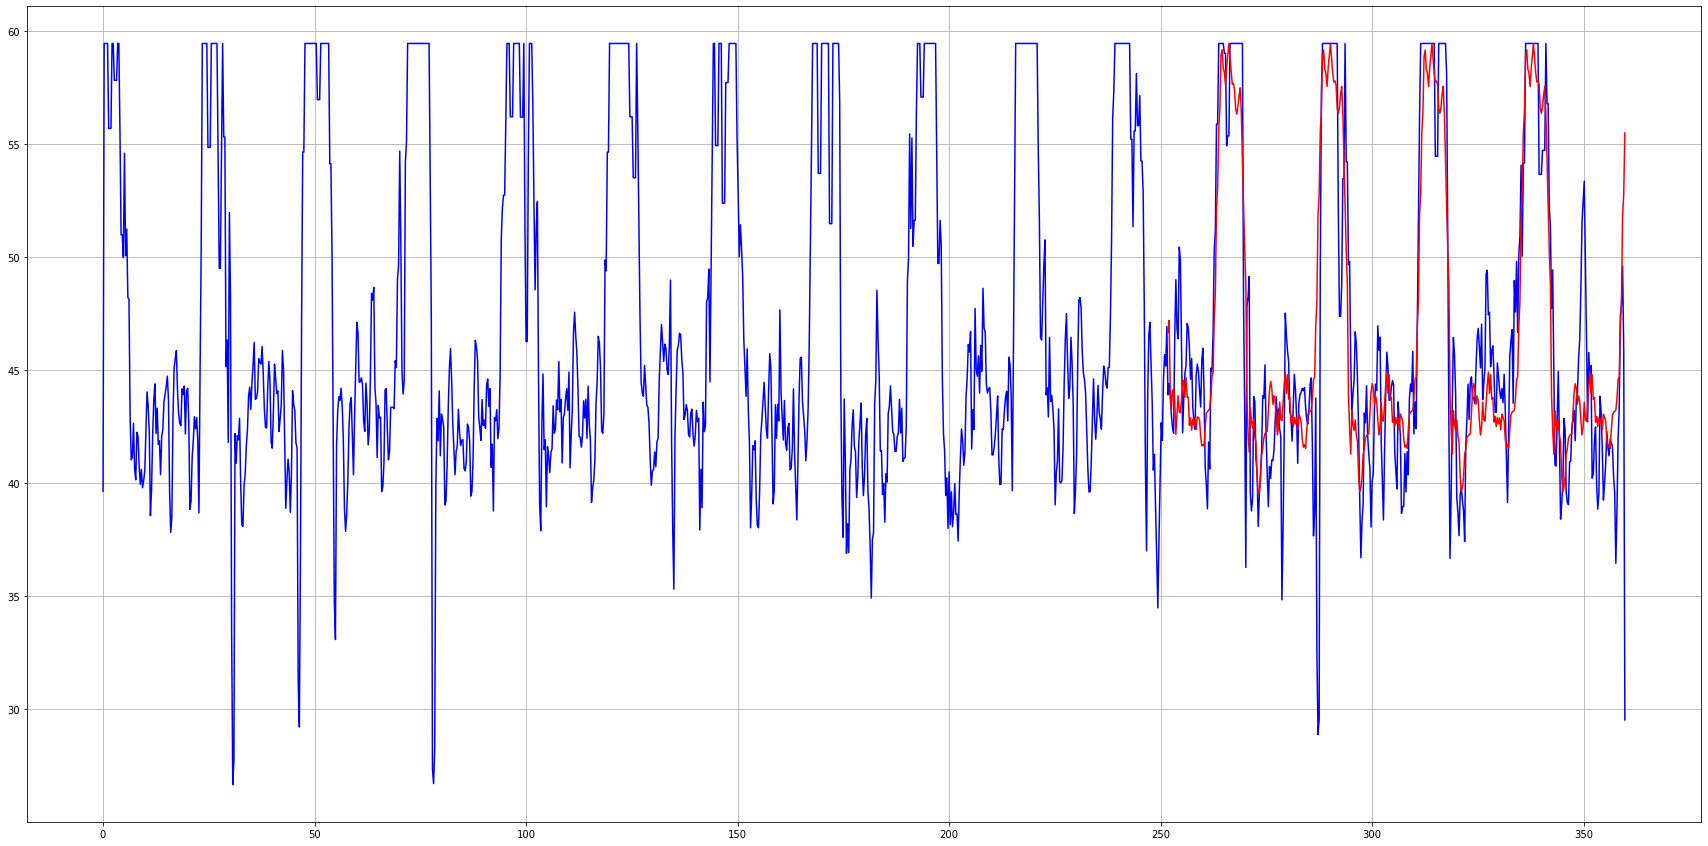

In [48]:
plot_data_predictions(smoothed_df[0],PTR[-3][0])